# Chapter 18 - Exercises

In [1]:
library(tidyverse)
library(bayesrules)
library(bayesplot)
library(rstan)
library(rstanarm)
library(broom.mixed)
library(tidybayes)
library(forcats)
library(pROC)
options(mc.cores = parallel::detectCores())

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
This is bayesplot version 1.10.0

- Online documentation and vignettes at mc-stan.org/bayesplot

- bayesplot theme set to bayesplot::theme_default()

   * Does _not_ affect other ggplot2 plots

   * See ?bayesplot_theme_set for details on theme setting

Loading required package: StanHeaders

rstan (Version 2.21.8, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recomp

## Exercise 18.1

### a)

In [2]:
coffee_data <- coffee_ratings %>% 
    select(species, flavor) %>%
    mutate( species=(species=="Robusta") )
sample_n( coffee_data, 10 )

species flavor
1  FALSE   7.58  
2  FALSE   7.08  
3  FALSE   7.75  
4  FALSE   7.58  
5  FALSE   6.83  
6  FALSE   7.83  
7  FALSE   7.67  
8  FALSE   7.42  
9  FALSE   7.50  
10 FALSE   8.08

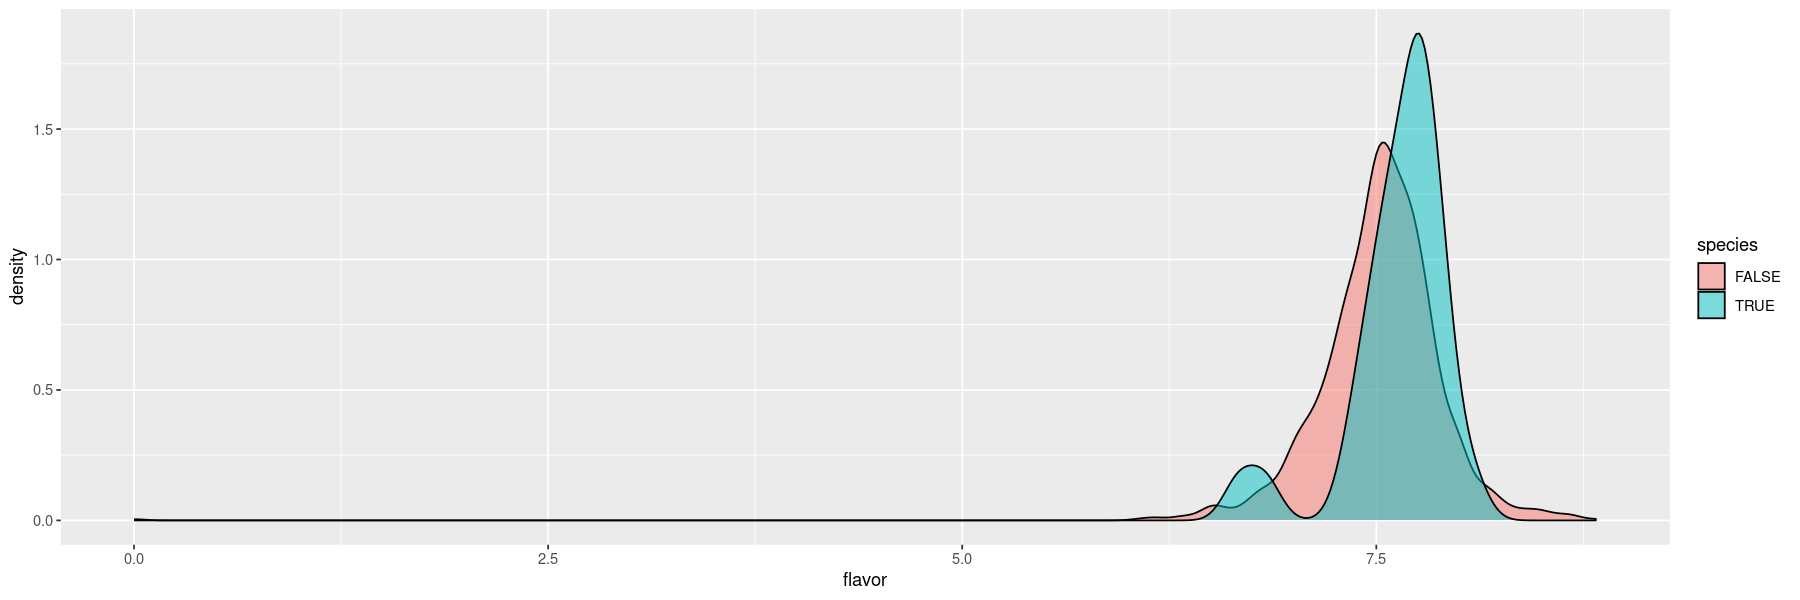

In [3]:
options(repr.plot.width=15, repr.plot.height=5)
ggplot( coffee_data, aes(x=flavor, fill=species) ) + geom_density( alpha=0.5 )

Fit a **logistic regression model** with

$$Y_i | \beta_0, \beta_1 \sim \text{Bern}(\pi_i),\quad \text{with } \log\left(\frac{\pi_i}{1-\pi_i}\right) = \beta_0 + \beta_1 X_i,$$

$$\beta_{0,c} \sim N(m_0, s_0^2),$$

$$\beta_{1} \sim N(m_1, s_1^2)$$

### b)

`geom_smooth()` using formula = 'y ~ x'


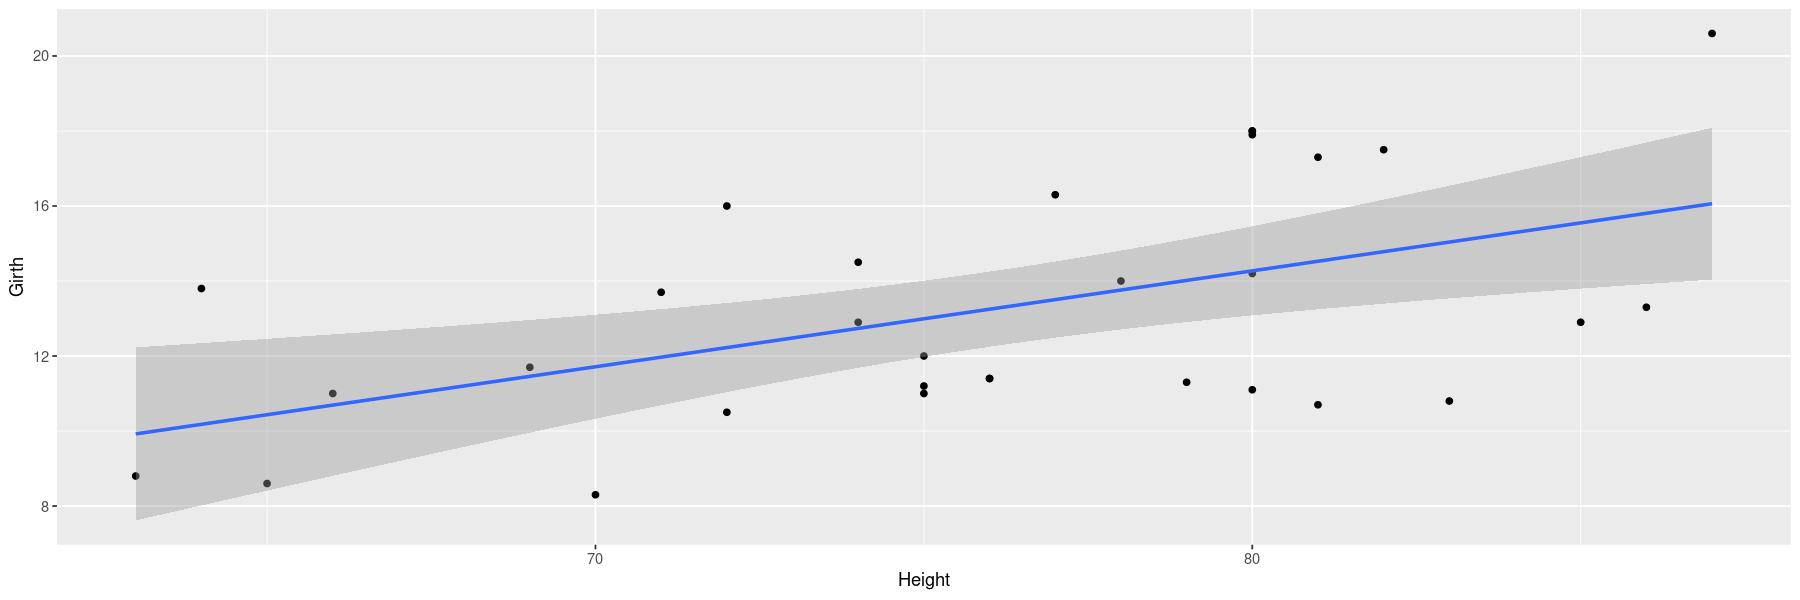

In [4]:
ggplot( trees, aes(x=Height, y=Girth) ) + geom_point() + geom_smooth( method="lm" )

Fit a **linear regression model** with

$$Y_i | \beta_0, \beta_1, \sigma \sim N(\mu_i, \sigma^2),\quad \text{with } \mu_i = \beta_0 + \beta_1 X_i,$$

$$\beta_{0,c} \sim N(m_0, s_0^2),$$

$$\beta_{1} \sim N(m_1, s_1^2)$$

$$\sigma \sim \text{Exp}(l)$$

### c)

In [5]:
head( radon )

floor county log_radon  log_uranium
1 1     AITKIN 0.83290912 -0.6890476 
2 0     AITKIN 0.83290912 -0.6890476 
3 0     AITKIN 1.09861229 -0.6890476 
4 0     AITKIN 0.09531018 -0.6890476 
5 0     ANOKA  1.16315081 -0.8473129 
6 0     ANOKA  0.95551145 -0.8473129

Uranium levels are given on the county level, Radon values on house level. Each county has thus a specific distribution for `log_radon` that may depend on `log_uranium`. If the county is known, the Uranium level is irrelevant, as we know the distribution of the radon level, however if the county is not known, the Uranium level might help as to determine the Radon level. This is a bit of a special situation, but it could nevertheless be encoded with a **hierarchical model with random intercepts**, the intercepts adapting to the contribution by the Uranium level to predict the mean `log_radon` concentration.

Distribution of log radon values per county:

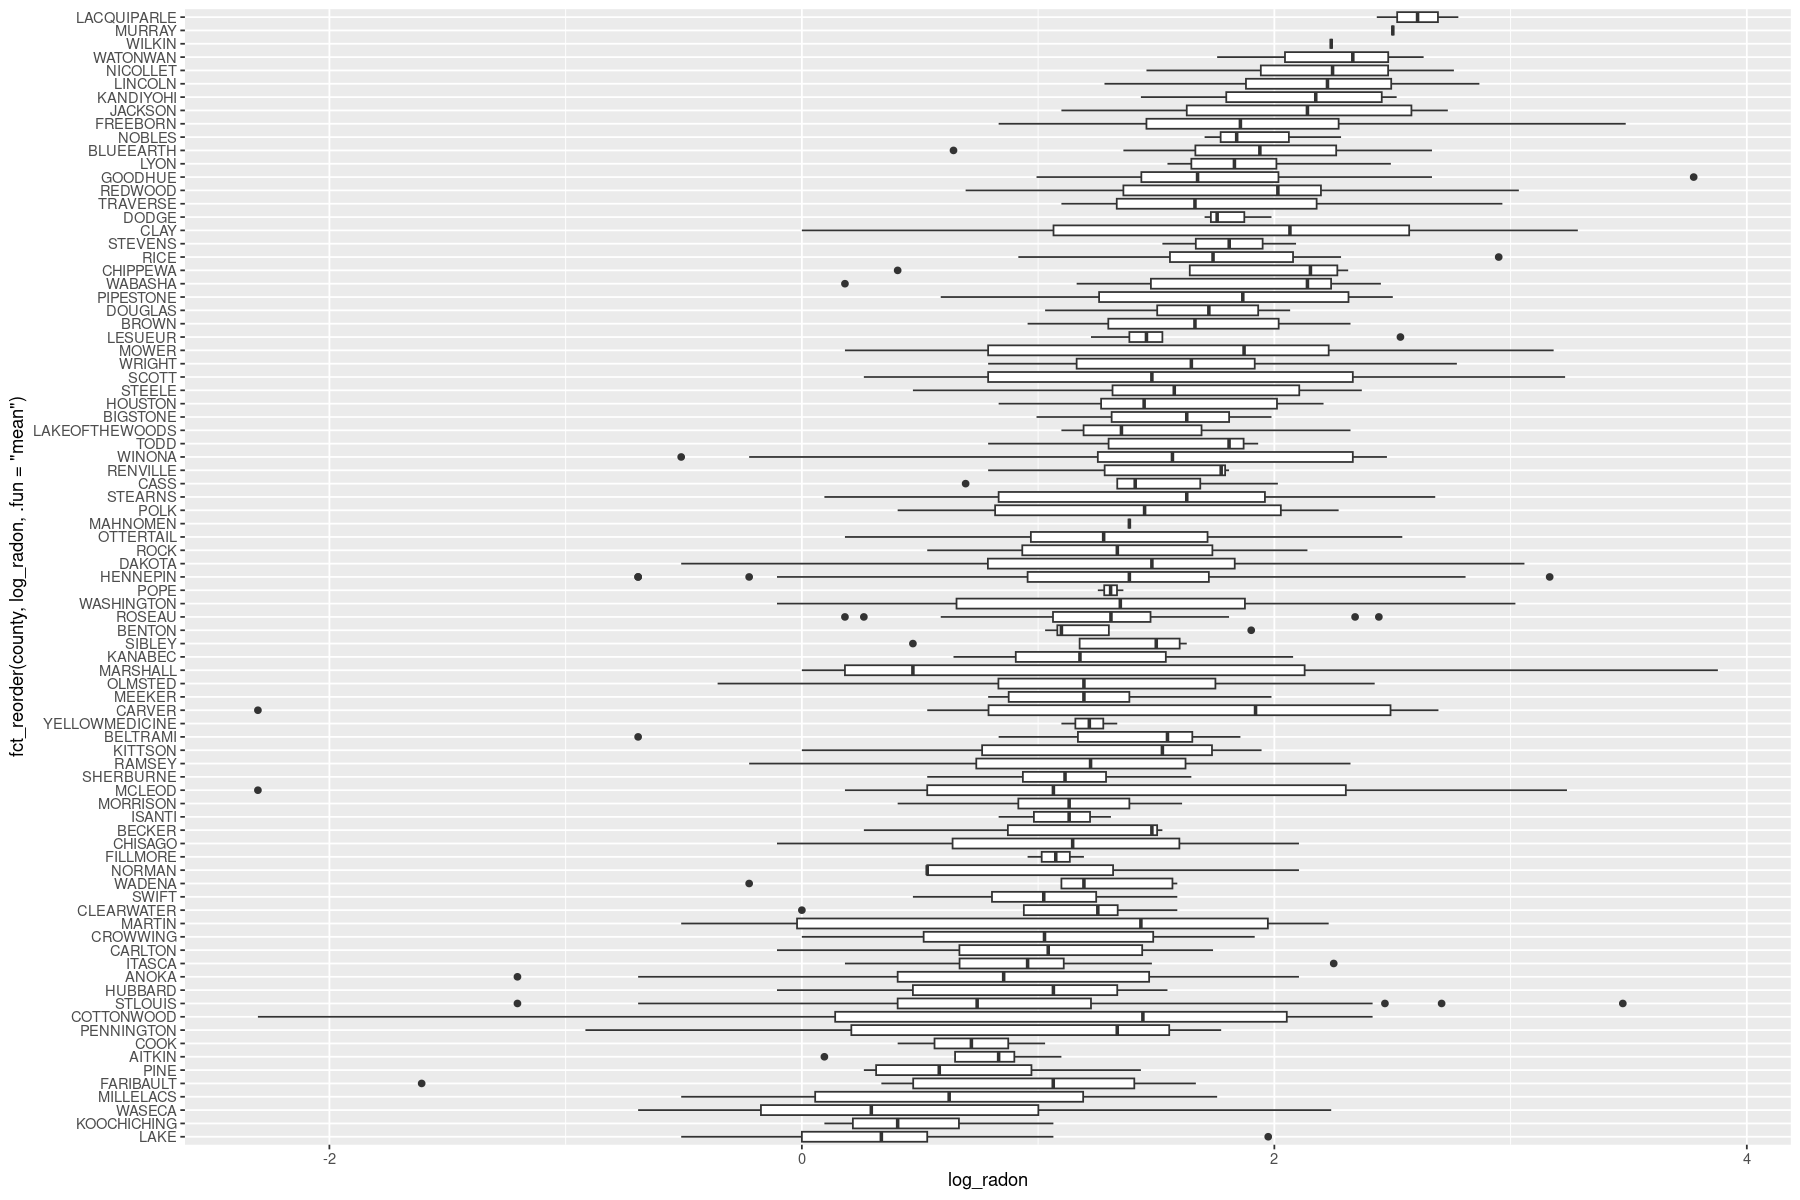

In [6]:
options(repr.plot.width=15, repr.plot.height=10)
ggplot( radon, aes(x=log_radon, y=fct_reorder(county, log_radon, .fun='mean') ) ) + geom_boxplot()

Relationship between log uranium concentration and mean log radon concentration per county:

`geom_smooth()` using formula = 'y ~ x'


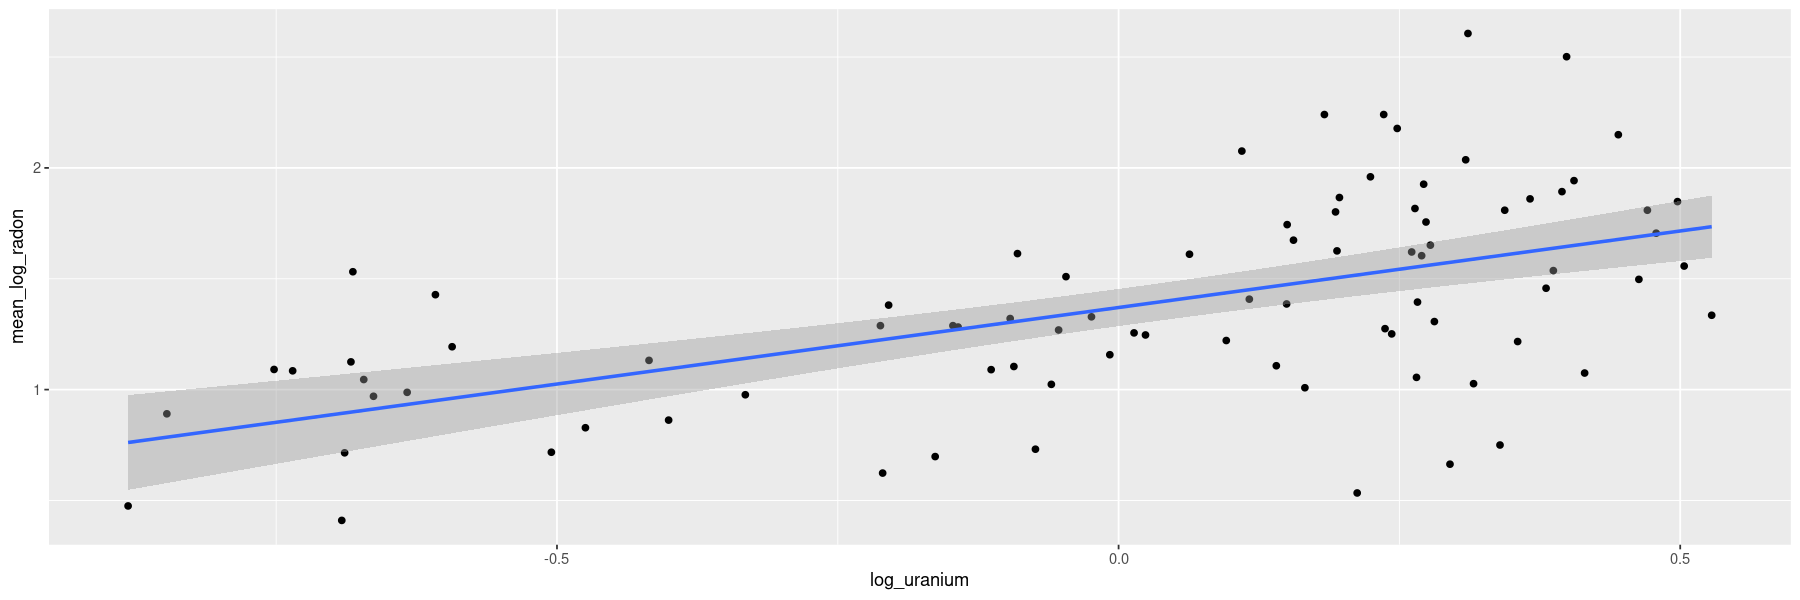

In [7]:
options(repr.plot.width=15, repr.plot.height=5)
radon %>% 
    group_by( county ) %>% 
    summarize( log_uranium=mean(log_uranium), mean_log_radon=mean(log_radon) ) %>% 
    ggplot( aes(x=log_uranium, y=mean_log_radon) ) +
    geom_point() +
    geom_smooth(method="lm")

There is a more or less linear relationship between county-wide Radon concentration mean and county-ide Uranium concentration.

Variant of a normal hierarchical model with random intercepts:

$$Y_{ij} | \beta_{0j}, \beta_1, \sigma_y \sim N(\mu_j, \sigma_y^2), \quad \text{with } \mu_{j} = {\beta_{0j} + \beta_1 X_{j}}$$ 

$$\beta_{0j}|\beta_0, \sigma_0 \sim N(\beta_0, \sigma_0^2)$$

$$\beta_{0c}\sim N(m_0, s_0^2)$$

$$\beta_{1}\sim N(m_1, s_1^2)$$

$$\sigma_y \sim \text{Exp}(l_y)$$

$$\sigma_0 \sim \text{Exp}(l_0)$$

Here $Y_{ij}$ are the individual log radon values $i$ for county $j$ and $X_{j}$ the individual log uranium values for county $j$. Notice the special form of the model with $X_j$ and $\mu_j$ being only county-dependent. In the next chapter of the book you will learn that $X_j$ is a group-level predictor.

### d)

In [8]:
head( roaches )

y   roach1 treatment senior exposure2
1 153 308.00 1         0      0.800000 
2 127 331.25 1         0      0.600000 
3   7   1.67 1         0      1.000000 
4   7   3.00 1         0      1.000000 
5   0   2.00 1         0      1.142857 
6   0   0.00 1         0      1.000000

In [9]:
dim( roaches )

[1] 262   5

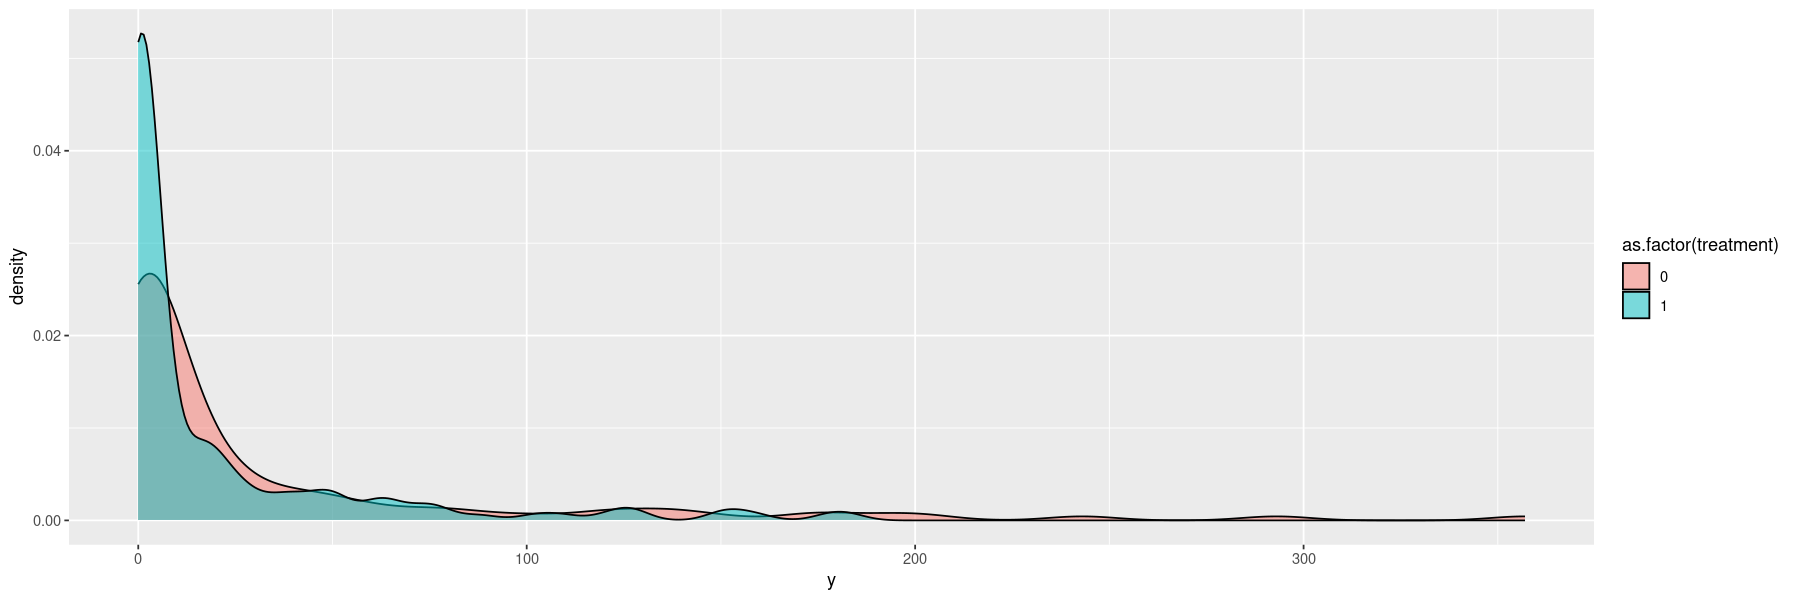

In [10]:
ggplot( roaches, aes(x=y, fill=as.factor(treatment) ) ) + geom_density( alpha = 0.5 )

Fit a **linear regression model** with

$$Y_i | \beta_0, \beta_1, \sigma \sim N(\mu_i, \sigma^2),\quad \text{with } \mu_i = \beta_0 + \beta_1 X_i,$$

$$\beta_{0,c} \sim N(m_0, s_0^2),$$

$$\beta_{1} \sim N(m_1, s_1^2)$$

$$\sigma \sim \text{Exp}(l)$$

where $X_i$ is 1 if the appartment has received pest control treatment and 0 otherwise.

## Exercise 18.2

In [11]:
head( book_banning )

title                                                             book_id
1 House of the Spirits, The                                         927    
2 It's Not the Stork!:  A Book About Girls, Boys, Babies and Bodies 1024   
3 King Stork                                                        1087   
4 How They Met and Other Stories                                    936    
5 Ghost in the Shell                                                764    
6 King Stork                                                        1087   
  author           date       year removed explicit antifamily occult language
1 Allende, Isabel  2005-04-01 2005 0       1        0          1      1       
2 Harris, Robie    2008-02-06 2008 1       0        0          0      0       
3 Pyle, Howard     2008-10-02 2008 0       0        0          0      0       
4 Levithan, David  2008-10-05 2008 0       0        0          0      0       
5 Masamune, Shirow 2008-10-02 2008 0       0        0          0      0       
6 Pyle, Howard     2003-09-13 2003 0       0        0          0      0       
  lgbtq violent state political_value_index median_income hs_grad_rate
1 1     1       AK    -13.4                 15707.5       8.738042    
2 0     0       AK    -13.4                 15707.5       8.738042    
3 0     1       AK    -13.4                 15707.5       8.738042    
4 0     0       AK    -13.4                 15707.5       8.738042    
5 0     0       AK    -13.4                 15707.5       8.738042    
6 0     1       AK    -13.4                 15707.5       8.738042    
  college_grad_rate
1 0.6762701        
2 0.6762701        
3 0.6762701        
4 0.6762701        
5 0.6762701        
6 0.6762701

In [12]:
dim( book_banning )

[1] 931  17

I prefer numeric values for the reasons:

In [13]:
book_banning <- book_banning %>% 
    mutate_at( vars(removed:violent), \(x) {as.numeric(x)-1} )

### a)

In the US, each state has very different political views and corresponding laws. In conservative states, anti-family books might be banned more easily and in democratic states, discriminating books might be banned more easily. Examine this with a plot:

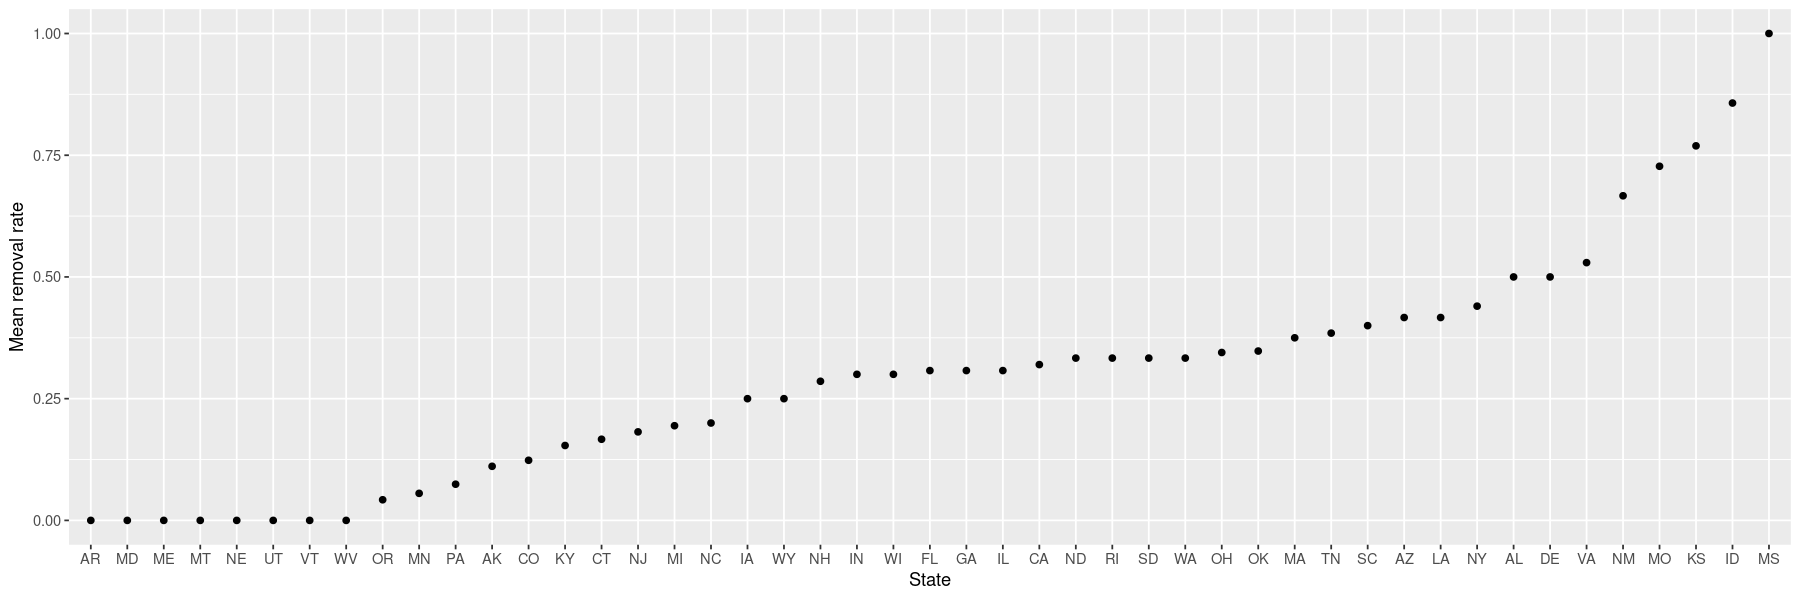

In [14]:
book_banning %>% 
    group_by( state ) %>% 
    summarize( removal_rate = mean( removed ) ) %>% 
    ggplot( aes(x=fct_reorder(state, removal_rate), y=removal_rate) ) + 
    geom_point() +
    xlab("State") +
    ylab("Mean removal rate")

The average removal rates differ significantly! What about the proportion of reasons?

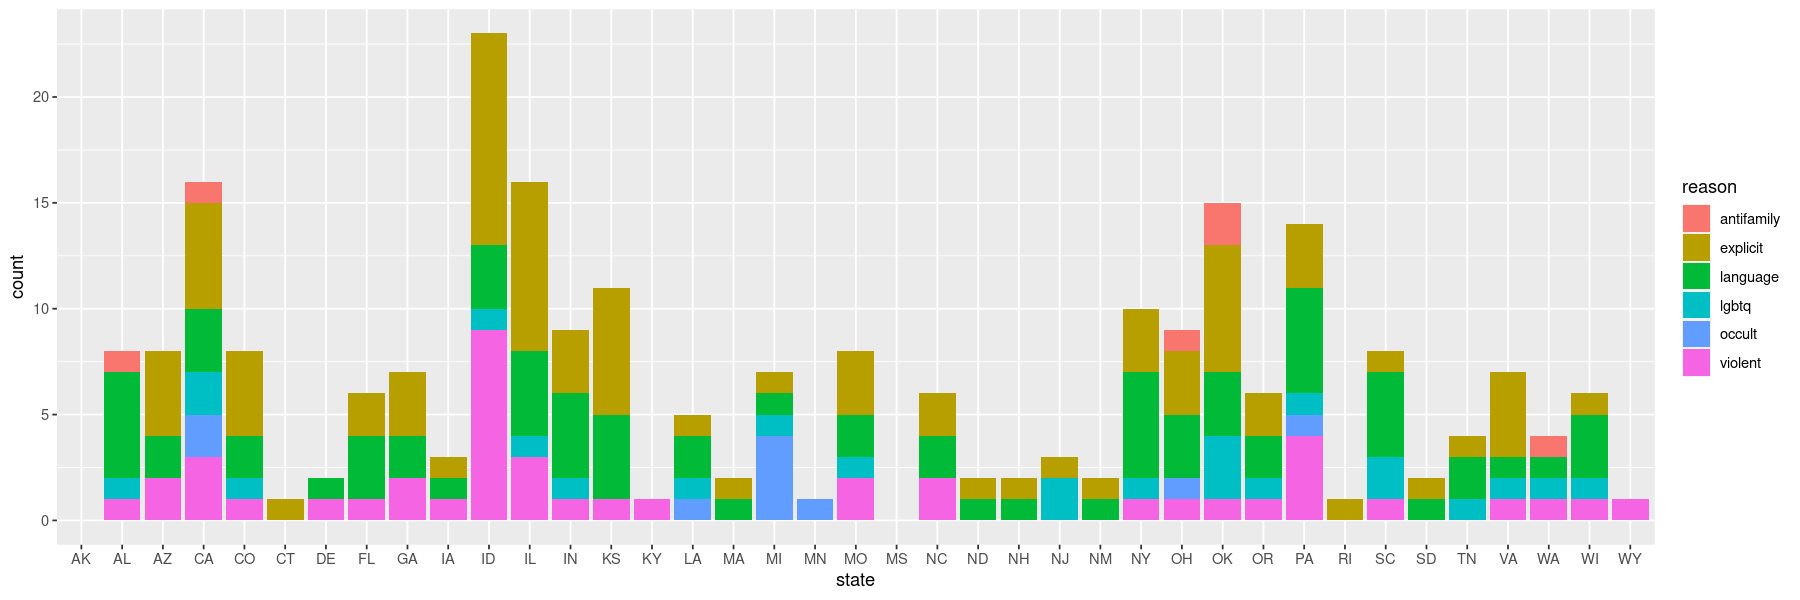

In [15]:
book_banning  %>% 
    select( removed:state ) %>% 
    filter( removed==1 ) %>%
    select( -removed ) %>% 
    group_by( state ) %>% 
    summarize_all( sum ) %>% 
    pivot_longer( explicit:violent, names_to="reason", values_to="count" ) %>% 
    ggplot( aes(x=state, y=count, fill=reason) ) +
    geom_bar( stat="identity" )

### b)

$$Y_{ij} | \beta_{0j}, \beta_1, \beta_2, \beta_3 \sim \text{Bern}(\pi_{ij}), \quad \text{with } \log\left(\frac{\pi_{ij}}{1-\pi_{ij}}\right) = {\beta_{0j} + \beta_1 X_{ij1} + \beta_2 X_{ij2}} + \beta_3 X_{ij3}$$ 

$$\beta_{0j}|\beta_0, \sigma_0 \sim N(\beta_0, \sigma_0^2)$$

$$\beta_{0c}\sim N(m_0, s_0^2)$$

$$\beta_{1}\sim N(m_1, s_1^2)$$

$$\beta_{2}\sim N(m_2, s_2^2)$$

$$\beta_{3}\sim N(m_3, s_3^2)$$

$$\sigma_0 \sim \text{Exp}(l_0)$$

Here $Y_{ij}$ indicates whether a book is rejected or not and $X_{ij1}$, $X_{ij2}$ and $X_{ij3}$ are dummy variables that encode whether the book was classified as `violent`, `antifamily` or `language`.

### c)

In [16]:
book_banning %>% 
    count( state ) %>% 
    arrange( desc(n) )

state n  
1  PA    148
2  OR    118
3  CO     81
4  CA     50
5  IL     39
6  MI     36
7  VA     34
8  OH     29
9  FL     26
10 NY     25
11 OK     23
12 IN     20
13 NC     20
14 MN     18
15 IA     16
16 SC     15
17 ID     14
18 GA     13
19 KS     13
20 KY     13
21 TN     13
22 VT     13
23 AZ     12
24 LA     12
25 MO     11
26 NJ     11
27 AL     10
28 WI     10
29 AK      9
30 WA      9
31 MA      8
32 MT      8
33 NH      7
34 CT      6
35 ND      6
36 AR      5
37 MD      5
38 WY      4
39 ME      3
40 NM      3
41 RI      3
42 SD      3
43 WV      3
44 DE      2
45 NE      2
46 MS      1
47 UT      1

Pennsylvania had most challenges (148) and Utah and Mississipi the least (1).

### d)

In [17]:
book_banning %>% 
    group_by( state ) %>% 
    summarize( removal_rate = mean( removed ), count = n() ) %>% 
    arrange( desc(removal_rate) )

state removal_rate count
1  MS    1.00000000     1  
2  ID    0.85714286    14  
3  KS    0.76923077    13  
4  MO    0.72727273    11  
5  NM    0.66666667     3  
6  VA    0.52941176    34  
7  AL    0.50000000    10  
8  DE    0.50000000     2  
9  NY    0.44000000    25  
10 AZ    0.41666667    12  
11 LA    0.41666667    12  
12 SC    0.40000000    15  
13 TN    0.38461538    13  
14 MA    0.37500000     8  
15 OK    0.34782609    23  
16 OH    0.34482759    29  
17 ND    0.33333333     6  
18 RI    0.33333333     3  
19 SD    0.33333333     3  
20 WA    0.33333333     9  
21 CA    0.32000000    50  
22 FL    0.30769231    26  
23 GA    0.30769231    13  
24 IL    0.30769231    39  
25 IN    0.30000000    20  
26 WI    0.30000000    10  
27 NH    0.28571429     7  
28 IA    0.25000000    16  
29 WY    0.25000000     4  
30 NC    0.20000000    20  
31 MI    0.19444444    36  
32 NJ    0.18181818    11  
33 CT    0.16666667     6  
34 KY    0.15384615    13  
35 CO    0.12345679    81  
36 AK    0.11111111     9  
37 PA    0.07432432   148  
38 MN    0.05555556    18  
39 OR    0.04237288   118  
40 AR    0.00000000     5  
41 MD    0.00000000     5  
42 ME    0.00000000     3  
43 MT    0.00000000     8  
44 NE    0.00000000     2  
45 UT    0.00000000     1  
46 VT    0.00000000    13  
47 WV    0.00000000     3

Mississipi has the highest removal rate with 100%, however only one book was challenged, Idaho has a removal rate of 86% with 14 challenged books, what is probably more significant. 7 states have a removal rate of 0%, Vermote the most significant with in total 13 challenged books that were not removed.

### e)

Three different plots (could probably be done in one)

`summarise()` has grouped output by 'removed'. You can override using the
`.groups` argument.


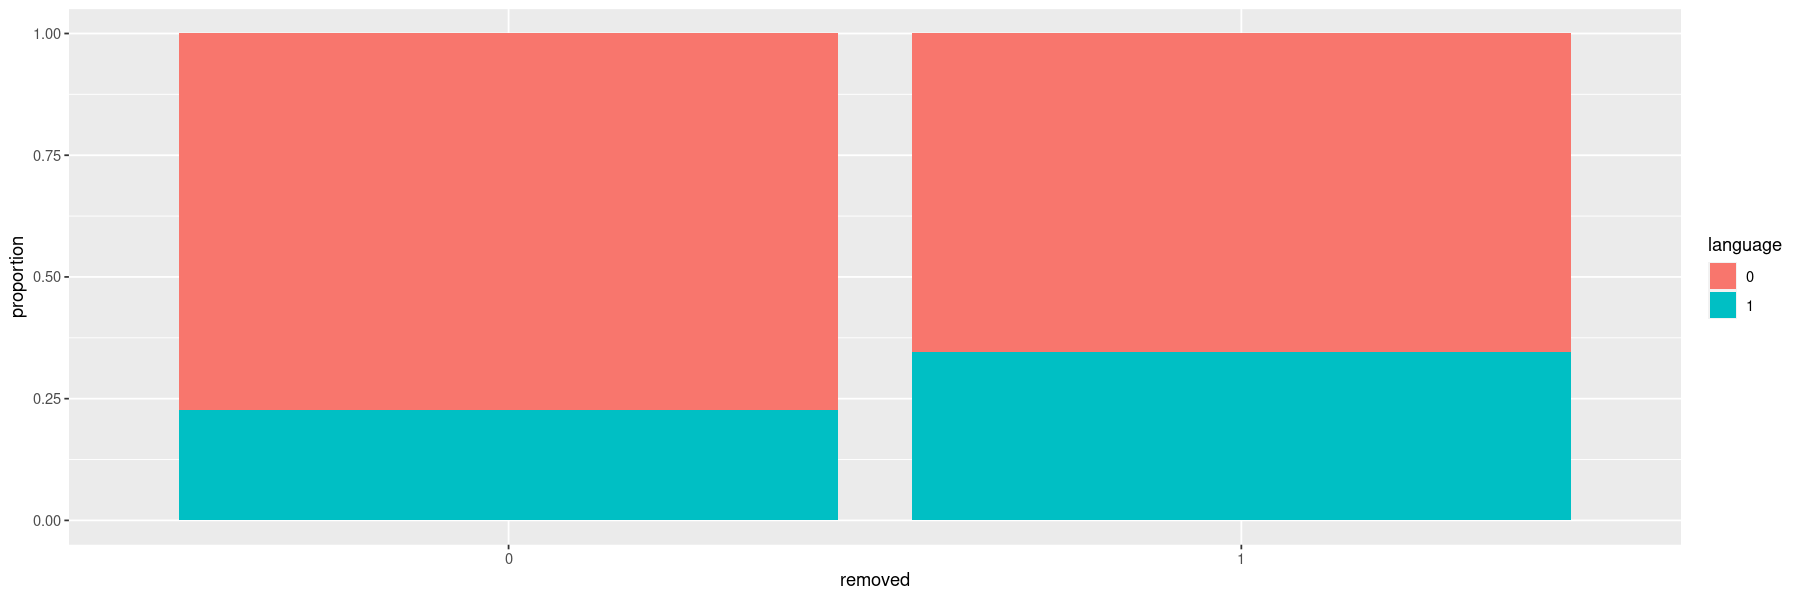

In [18]:
book_banning %>% 
    group_by( removed, language ) %>% 
    summarize( count=n() ) %>% 
    mutate( proportion=count/sum(count) )  %>% 
    mutate( removed=as.factor(removed), language=as.factor(language) )  %>% 
    ggplot( aes(x=removed, y=proportion, fill=language) ) +
    geom_bar( stat="identity" )

`summarise()` has grouped output by 'removed'. You can override using the
`.groups` argument.


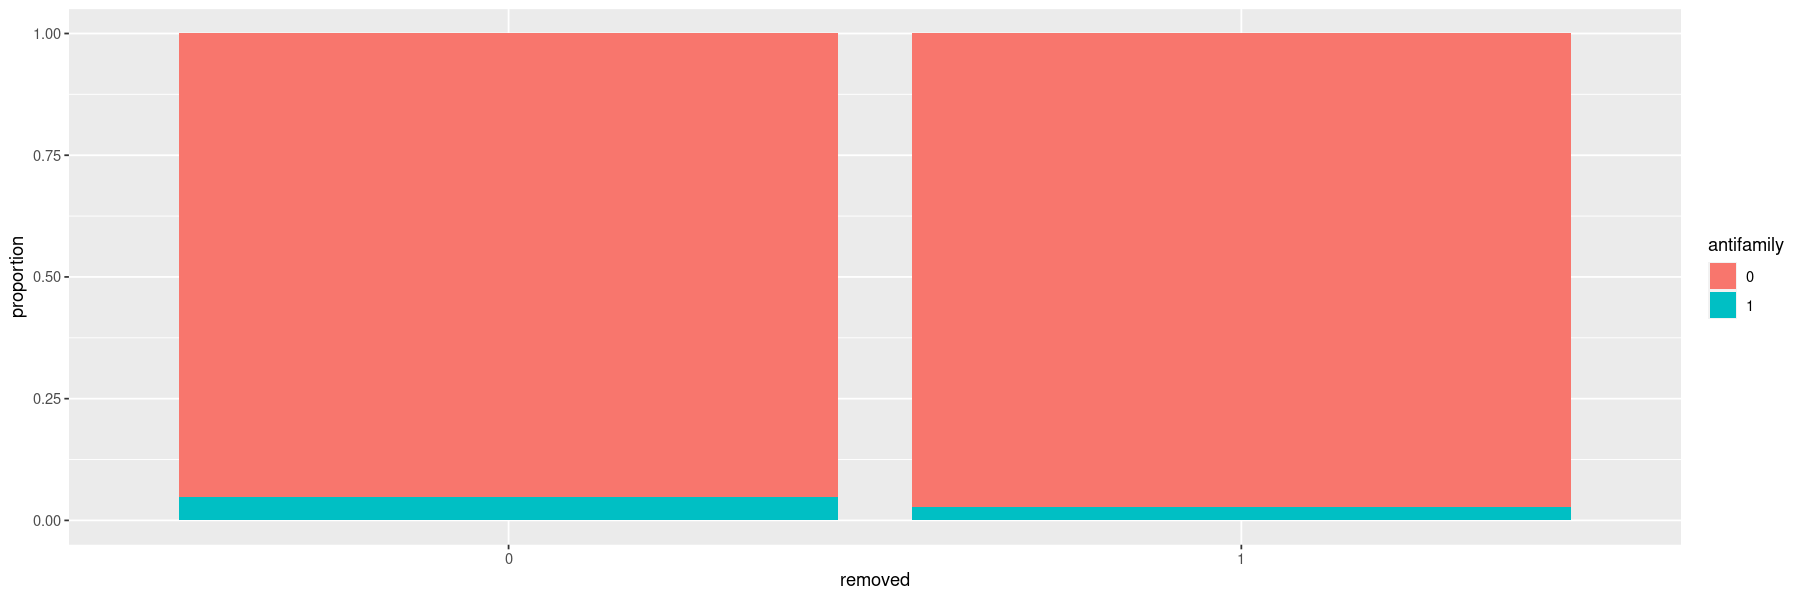

In [19]:
book_banning %>% 
    group_by( removed, antifamily ) %>% 
    summarize( count=n() ) %>% 
    mutate( proportion=count/sum(count) )  %>% 
    mutate( removed=as.factor(removed), antifamily=as.factor(antifamily) )  %>% 
    ggplot( aes(x=removed, y=proportion, fill=antifamily) ) +
    geom_bar( stat="identity" )

`summarise()` has grouped output by 'removed'. You can override using the
`.groups` argument.


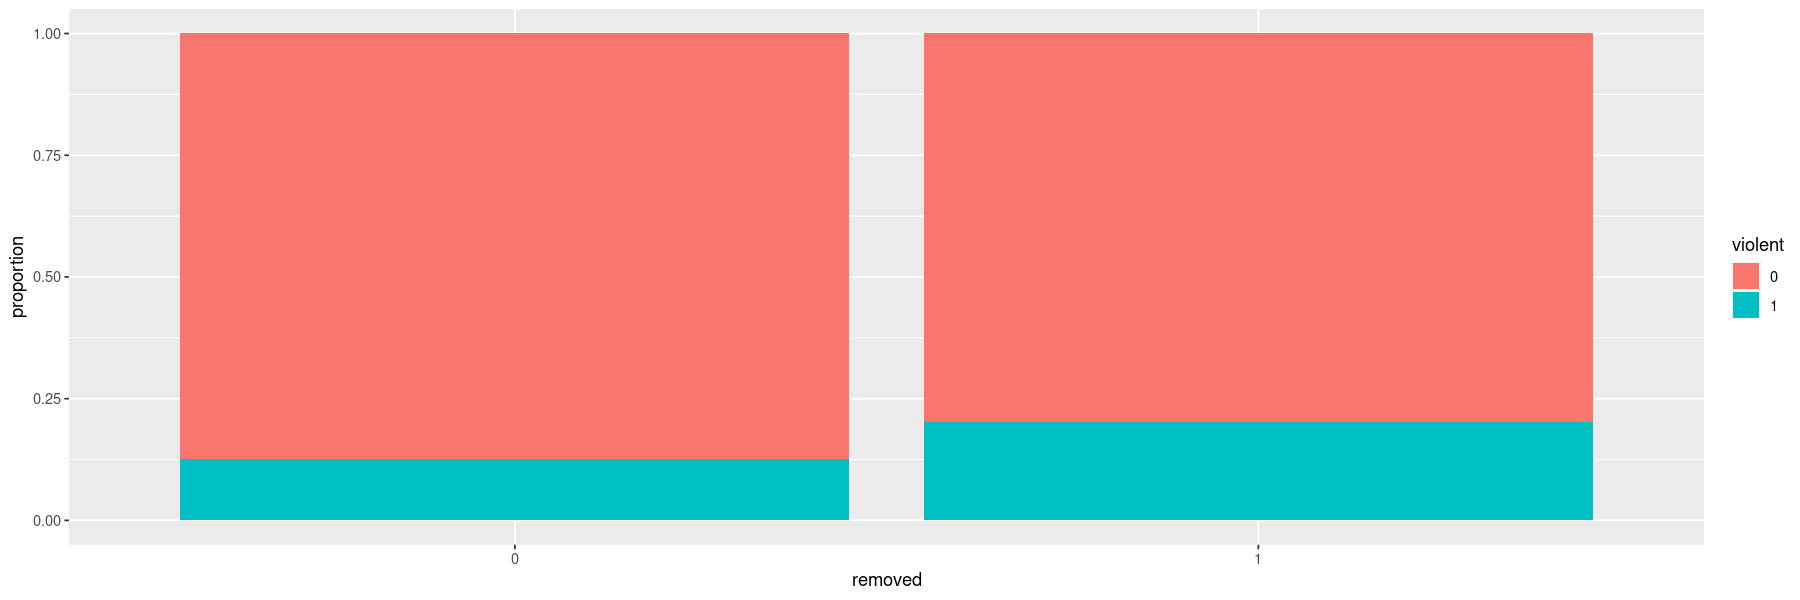

In [20]:
book_banning %>% 
    group_by( removed, violent ) %>% 
    summarize( count=n() ) %>% 
    mutate( proportion=count/sum(count) )  %>% 
    mutate( removed=as.factor(removed), violent=as.factor(violent) )  %>% 
    ggplot( aes(x=removed, y=proportion, fill=violent) ) +
    geom_bar( stat="identity" )

All predictors give only weak information, probably our model will not explain too much variance (grouping by state might however help).

## Exercise 18.3

### a)

In [21]:
book_model_1 <- stan_glmer(
  removed ~ language + antifamily + violent + (1 | state), 
  data = book_banning, family = binomial,
  prior_intercept = normal(0, 2.5, autoscale = TRUE),
  prior = normal(0, 2.5, autoscale = TRUE), 
  prior_covariance = decov(reg = 1, conc = 1, shape = 1, scale = 1),
  chains = 4, iter = 5000*2, seed = 84735
)

MCMC diagnostics:

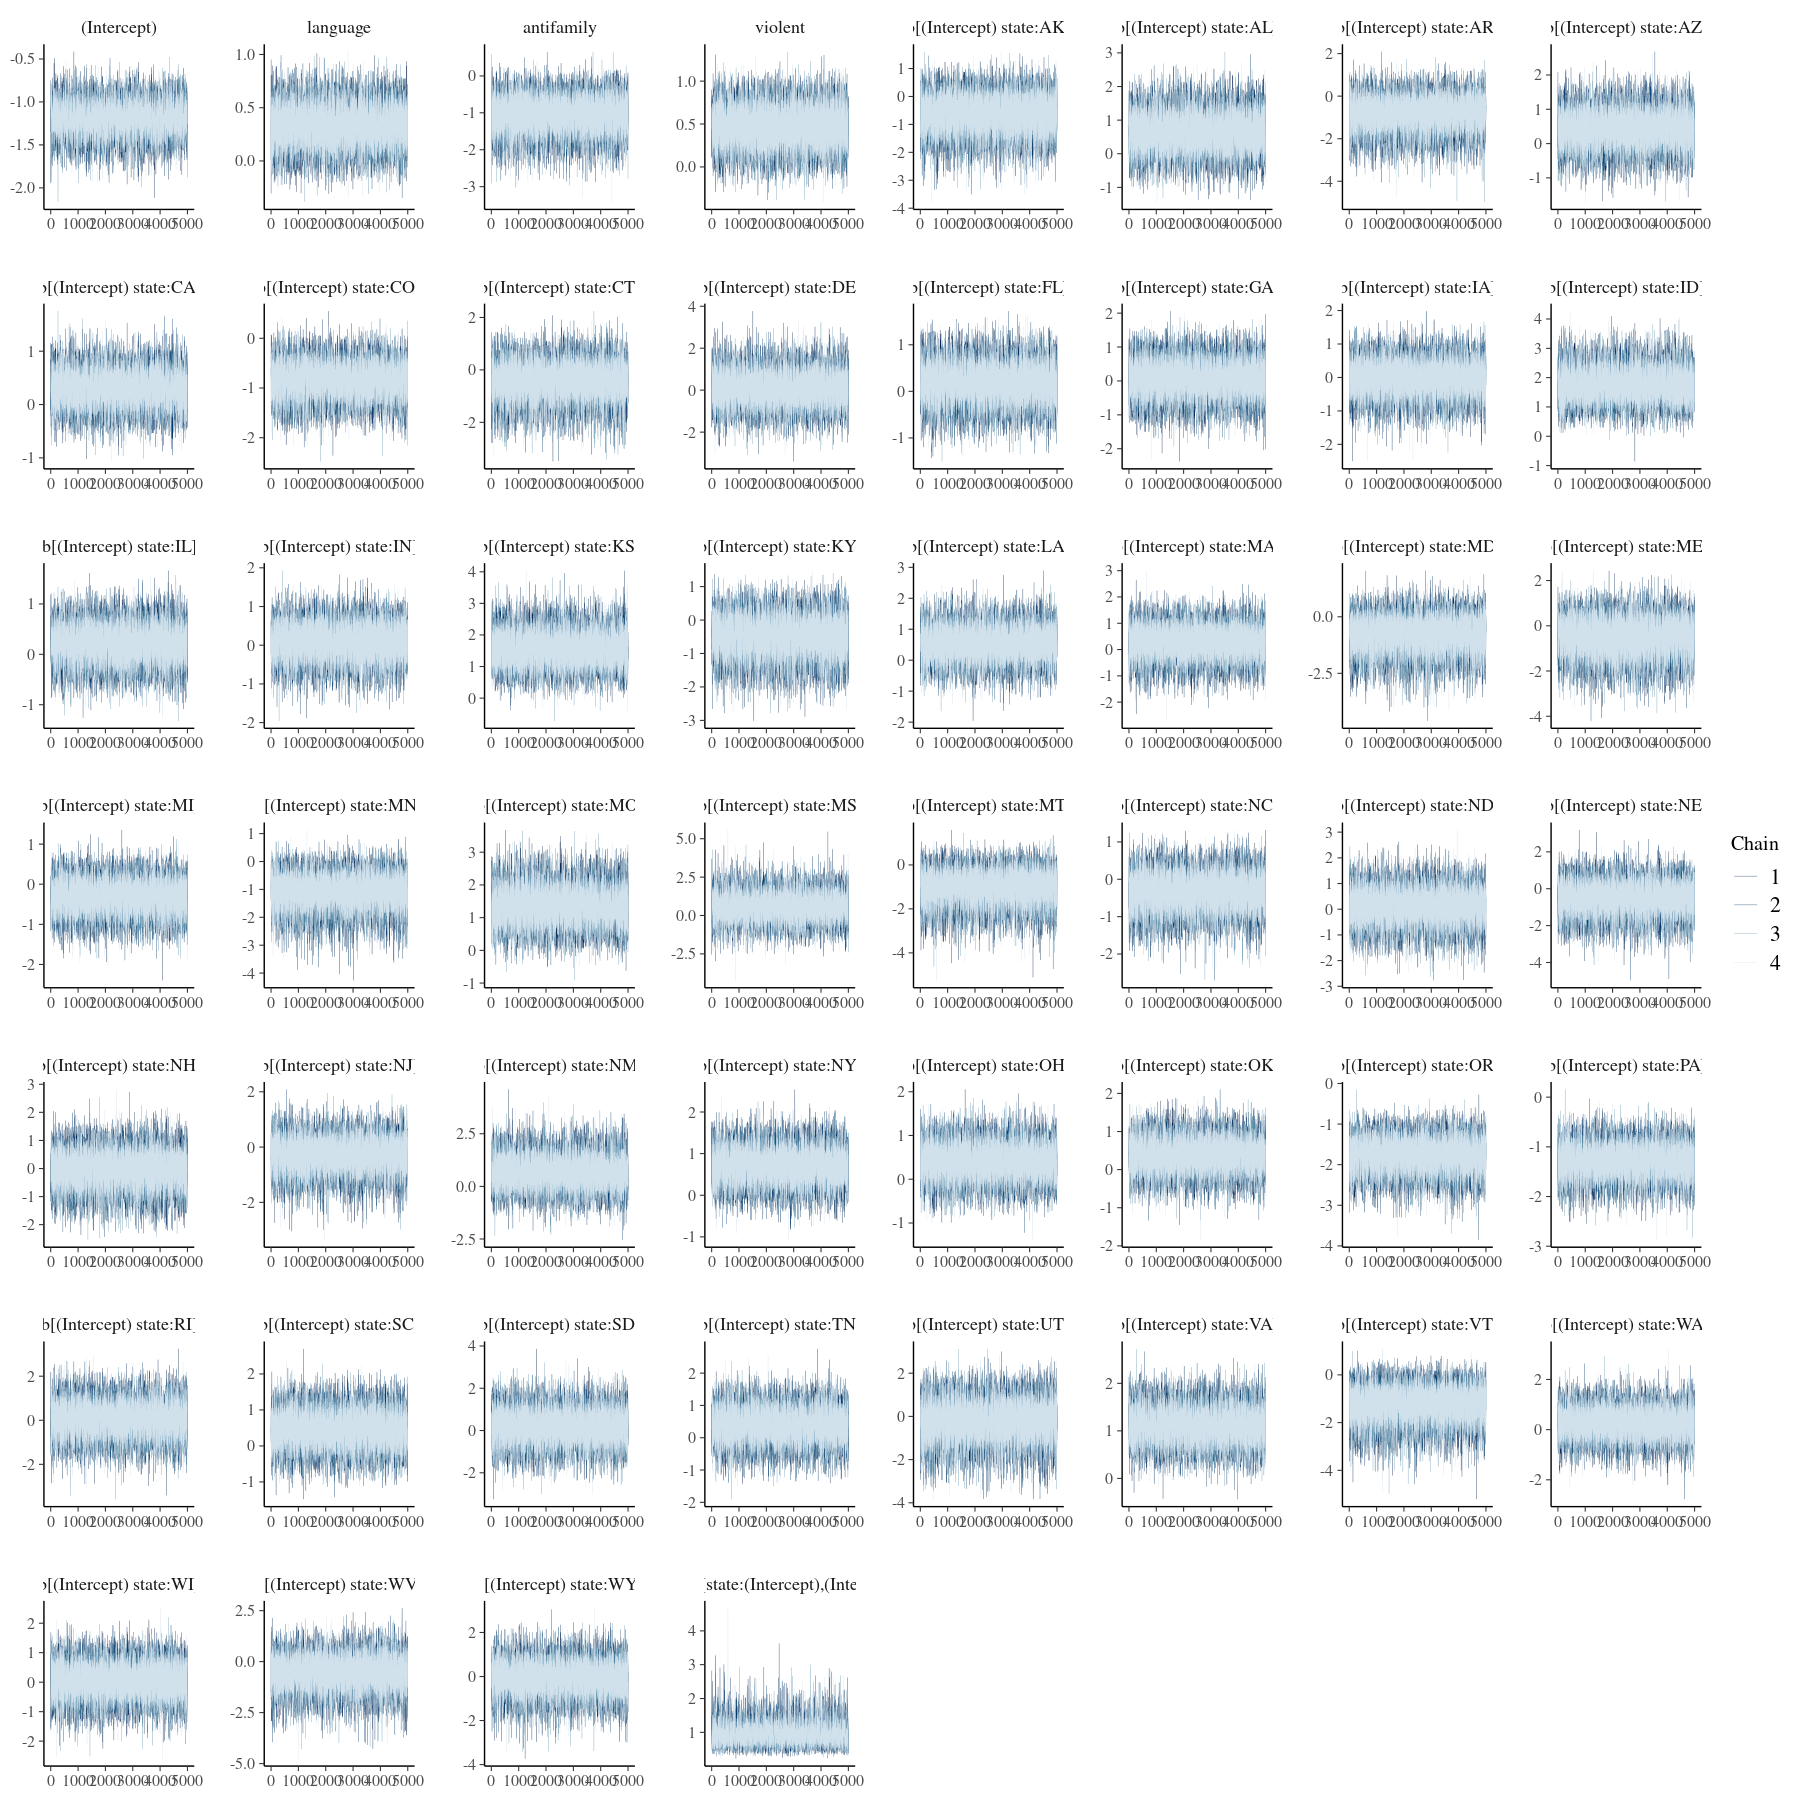

Warning message:
“The `facets` argument of `facet_grid()` is deprecated as of ggplot2 2.2.0.
ℹ Please use the `rows` argument instead.
ℹ The deprecated feature was likely used in the bayesplot package.
  Please report the issue at <https://github.com/stan-dev/bayesplot/issues/>.”


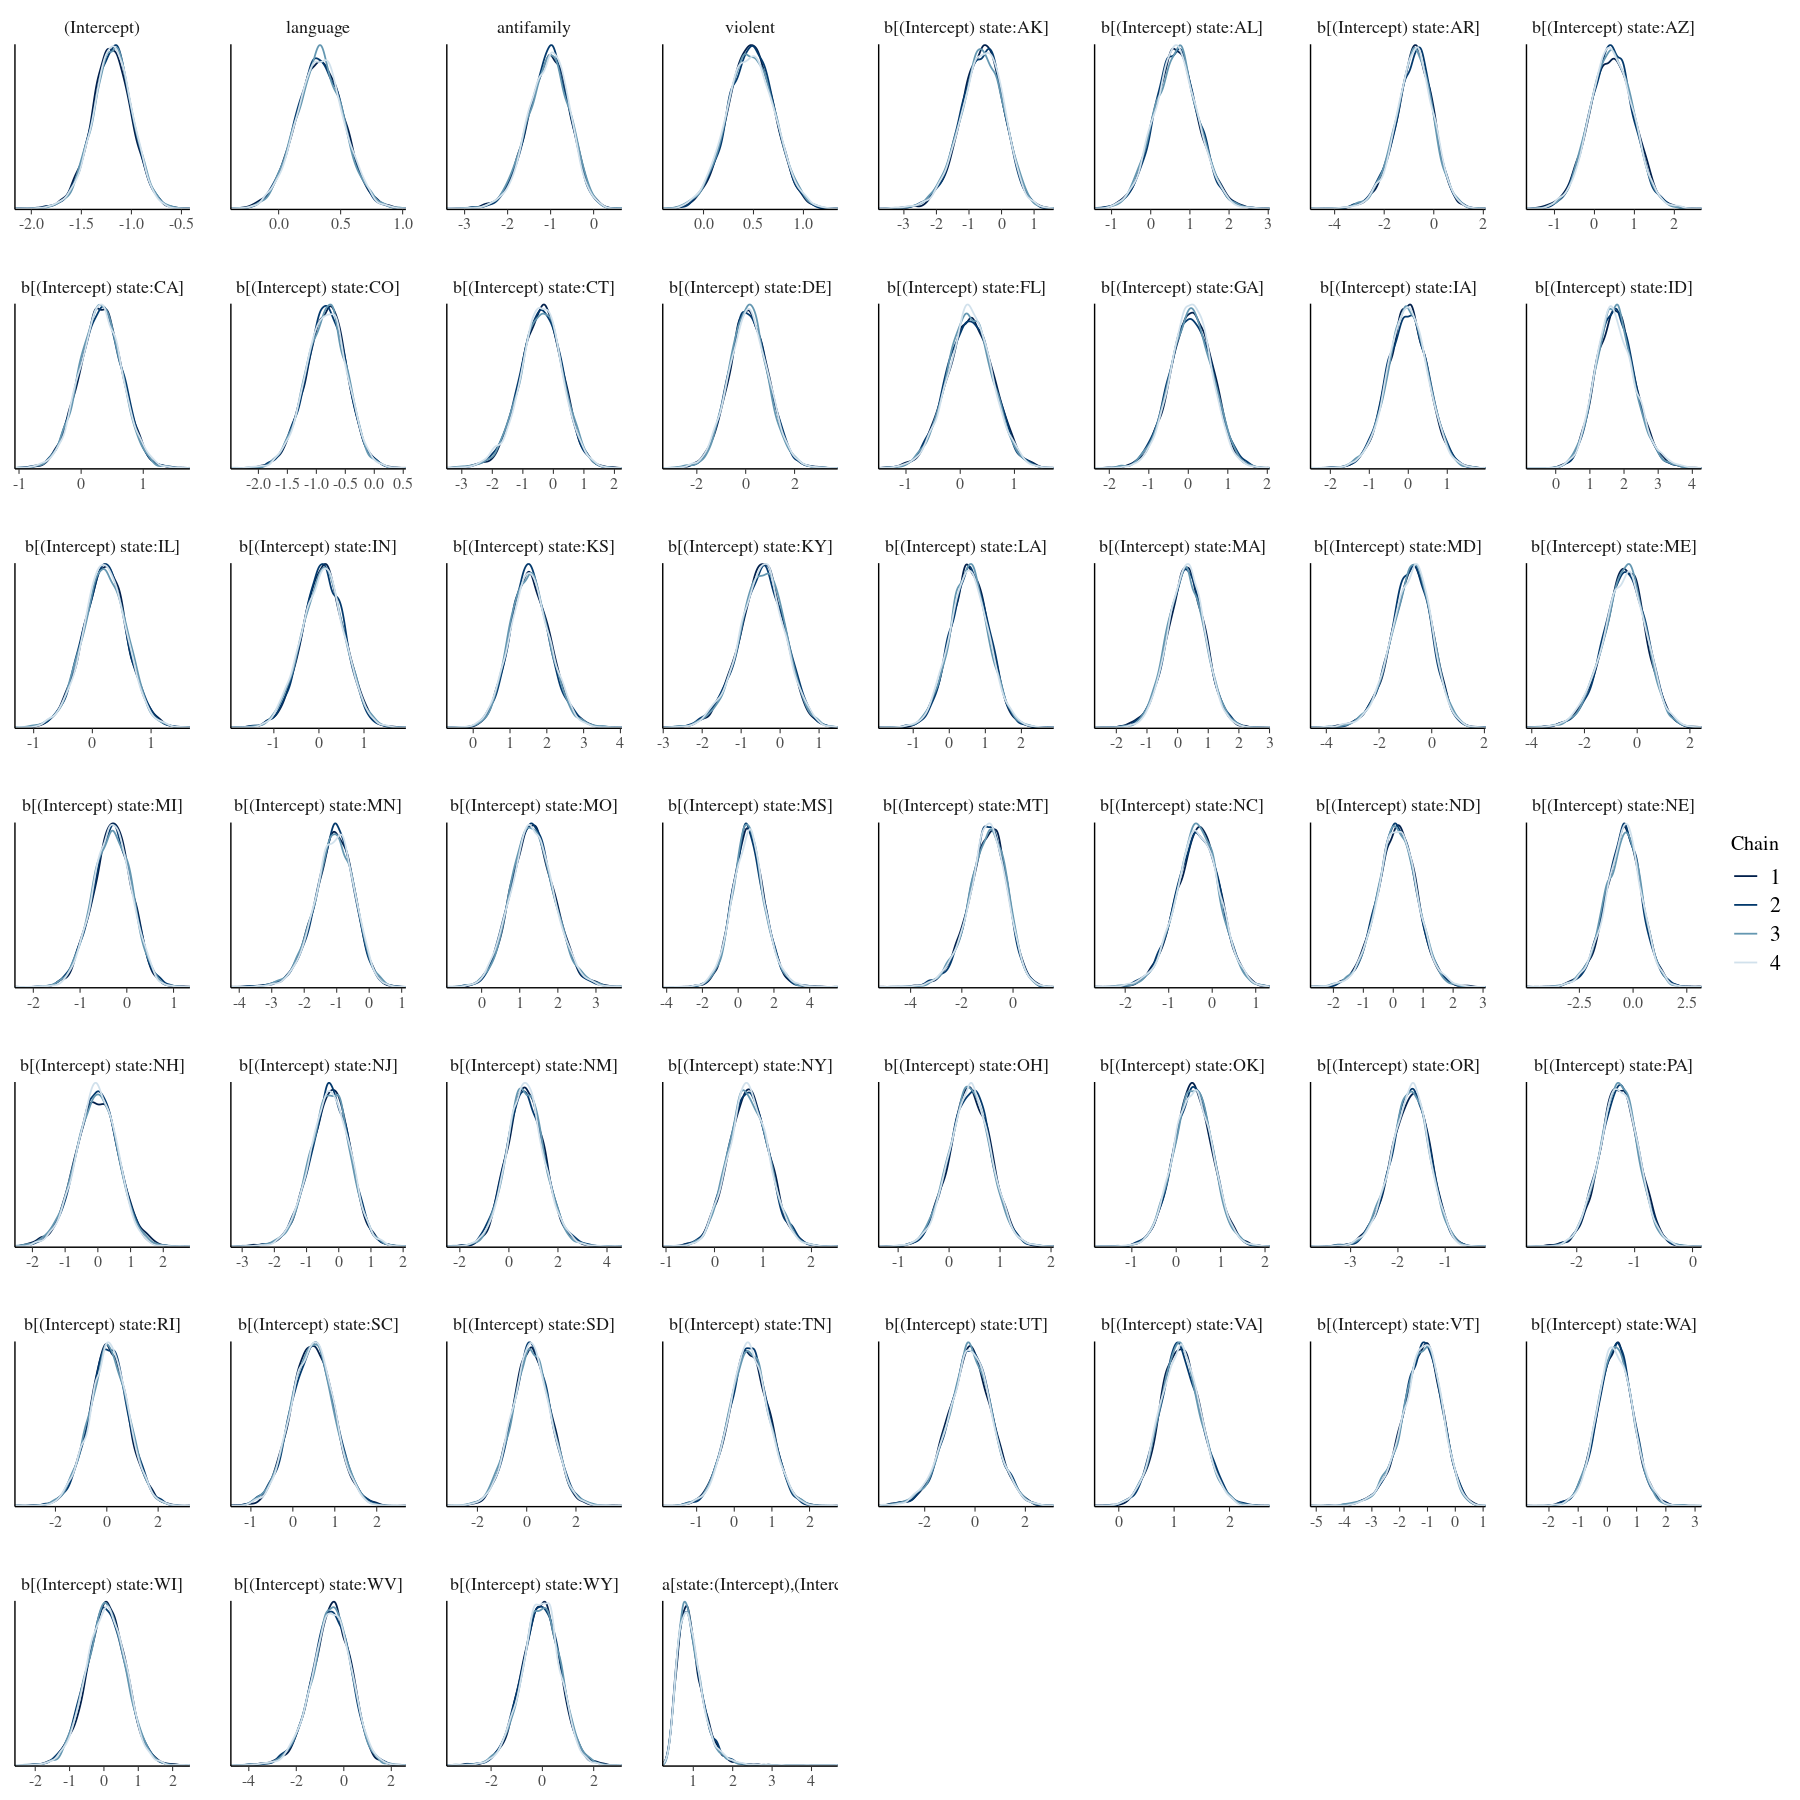

(Intercept)                             language 
                             0.33380                              1.38375 
                          antifamily                              violent 
                             1.42530                              1.33930 
             b[(Intercept) state:AK]              b[(Intercept) state:AL] 
                             1.23365                              1.21080 
             b[(Intercept) state:AR]              b[(Intercept) state:AZ] 
                             1.25280                              1.12865 
             b[(Intercept) state:CA]              b[(Intercept) state:CO] 
                             0.64350                              0.73565 
             b[(Intercept) state:CT]              b[(Intercept) state:DE] 
                             1.32030                              1.49820 
             b[(Intercept) state:FL]              b[(Intercept) state:GA] 
                             0.94995                              1.15085 
             b[(Intercept) state:IA]              b[(Intercept) state:ID] 
                             1.12585                              0.95910 
             b[(Intercept) state:IL]              b[(Intercept) state:IN] 
                             0.77745                              1.03950 
             b[(Intercept) state:KS]              b[(Intercept) state:KY] 
                             1.01090                              1.21110 
             b[(Intercept) state:LA]              b[(Intercept) state:MA] 
                             1.17775                              1.31270 
             b[(Intercept) state:MD]              b[(Intercept) state:ME] 
                             1.17435                              1.36175 
             b[(Intercept) state:MI]              b[(Intercept) state:MN] 
                             0.95900                              1.18275 
             b[(Intercept) state:MO]              b[(Intercept) state:MS] 
                             1.07440                              1.35615 
             b[(Intercept) state:MT]              b[(Intercept) state:NC] 
                             1.15050                              1.12545 
             b[(Intercept) state:ND]              b[(Intercept) state:NE] 
                             1.37965                              1.44295 
             b[(Intercept) state:NH]              b[(Intercept) state:NJ] 
                             1.38530                              1.30085 
             b[(Intercept) state:NM]              b[(Intercept) state:NY] 
                             1.28125                              0.87745 
             b[(Intercept) state:OH]              b[(Intercept) state:OK] 
                             0.89615                              0.91580 
             b[(Intercept) state:OR]              b[(Intercept) state:PA] 
                             0.94830                              0.70460 
             b[(Intercept) state:RI]              b[(Intercept) state:SC] 
                             1.45870                              1.05780 
             b[(Intercept) state:SD]              b[(Intercept) state:TN] 
                             1.45805                              1.13525 
             b[(Intercept) state:UT]              b[(Intercept) state:VA] 
                             1.44490                              0.73005 
             b[(Intercept) state:VT]              b[(Intercept) state:WA] 
                             1.14925                              1.23560 
             b[(Intercept) state:WI]              b[(Intercept) state:WV] 
                             1.23435                              1.27895 
             b[(Intercept) state:WY] Sigma[state:(Intercept),(Intercept)] 
                             1.42660                              0.34655

(Intercept)                             language 
                           1.0002645                            0.9998493 
                          antifamily                              violent 
                           1.0000129                            0.9998788 
             b[(Intercept) state:AK]              b[(Intercept) state:AL] 
                           0.9999464                            0.9999520 
             b[(Intercept) state:AR]              b[(Intercept) state:AZ] 
                           1.0000388                            0.9999462 
             b[(Intercept) state:CA]              b[(Intercept) state:CO] 
                           1.0000432                            1.0000642 
             b[(Intercept) state:CT]              b[(Intercept) state:DE] 
                           0.9999241                            0.9999797 
             b[(Intercept) state:FL]              b[(Intercept) state:GA] 
                           0.9999785                            0.9999118 
             b[(Intercept) state:IA]              b[(Intercept) state:ID] 
                           0.9999081                            0.9999743 
             b[(Intercept) state:IL]              b[(Intercept) state:IN] 
                           0.9999894                            1.0000337 
             b[(Intercept) state:KS]              b[(Intercept) state:KY] 
                           0.9999464                            0.9999233 
             b[(Intercept) state:LA]              b[(Intercept) state:MA] 
                           0.9999489                            0.9999656 
             b[(Intercept) state:MD]              b[(Intercept) state:ME] 
                           0.9999415                            0.9999872 
             b[(Intercept) state:MI]              b[(Intercept) state:MN] 
                           1.0000663                            0.9999386 
             b[(Intercept) state:MO]              b[(Intercept) state:MS] 
                           1.0001090                            0.9999169 
             b[(Intercept) state:MT]              b[(Intercept) state:NC] 
                           0.9998776                            1.0000131 
             b[(Intercept) state:ND]              b[(Intercept) state:NE] 
                           0.9999740                            1.0000513 
             b[(Intercept) state:NH]              b[(Intercept) state:NJ] 
                           0.9999007                            0.9998754 
             b[(Intercept) state:NM]              b[(Intercept) state:NY] 
                           0.9998669                            0.9999793 
             b[(Intercept) state:OH]              b[(Intercept) state:OK] 
                           0.9999966                            0.9998841 
             b[(Intercept) state:OR]              b[(Intercept) state:PA] 
                           1.0000827                            1.0000273 
             b[(Intercept) state:RI]              b[(Intercept) state:SC] 
                           1.0000250                            0.9999124 
             b[(Intercept) state:SD]              b[(Intercept) state:TN] 
                           0.9999382                            0.9998391 
             b[(Intercept) state:UT]              b[(Intercept) state:VA] 
                           0.9999170                            1.0000035 
             b[(Intercept) state:VT]              b[(Intercept) state:WA] 
                           1.0000235                            0.9999379 
             b[(Intercept) state:WI]              b[(Intercept) state:WV] 
                           1.0000399                            0.9998603 
             b[(Intercept) state:WY] Sigma[state:(Intercept),(Intercept)] 
                           0.9999148                            0.9999328

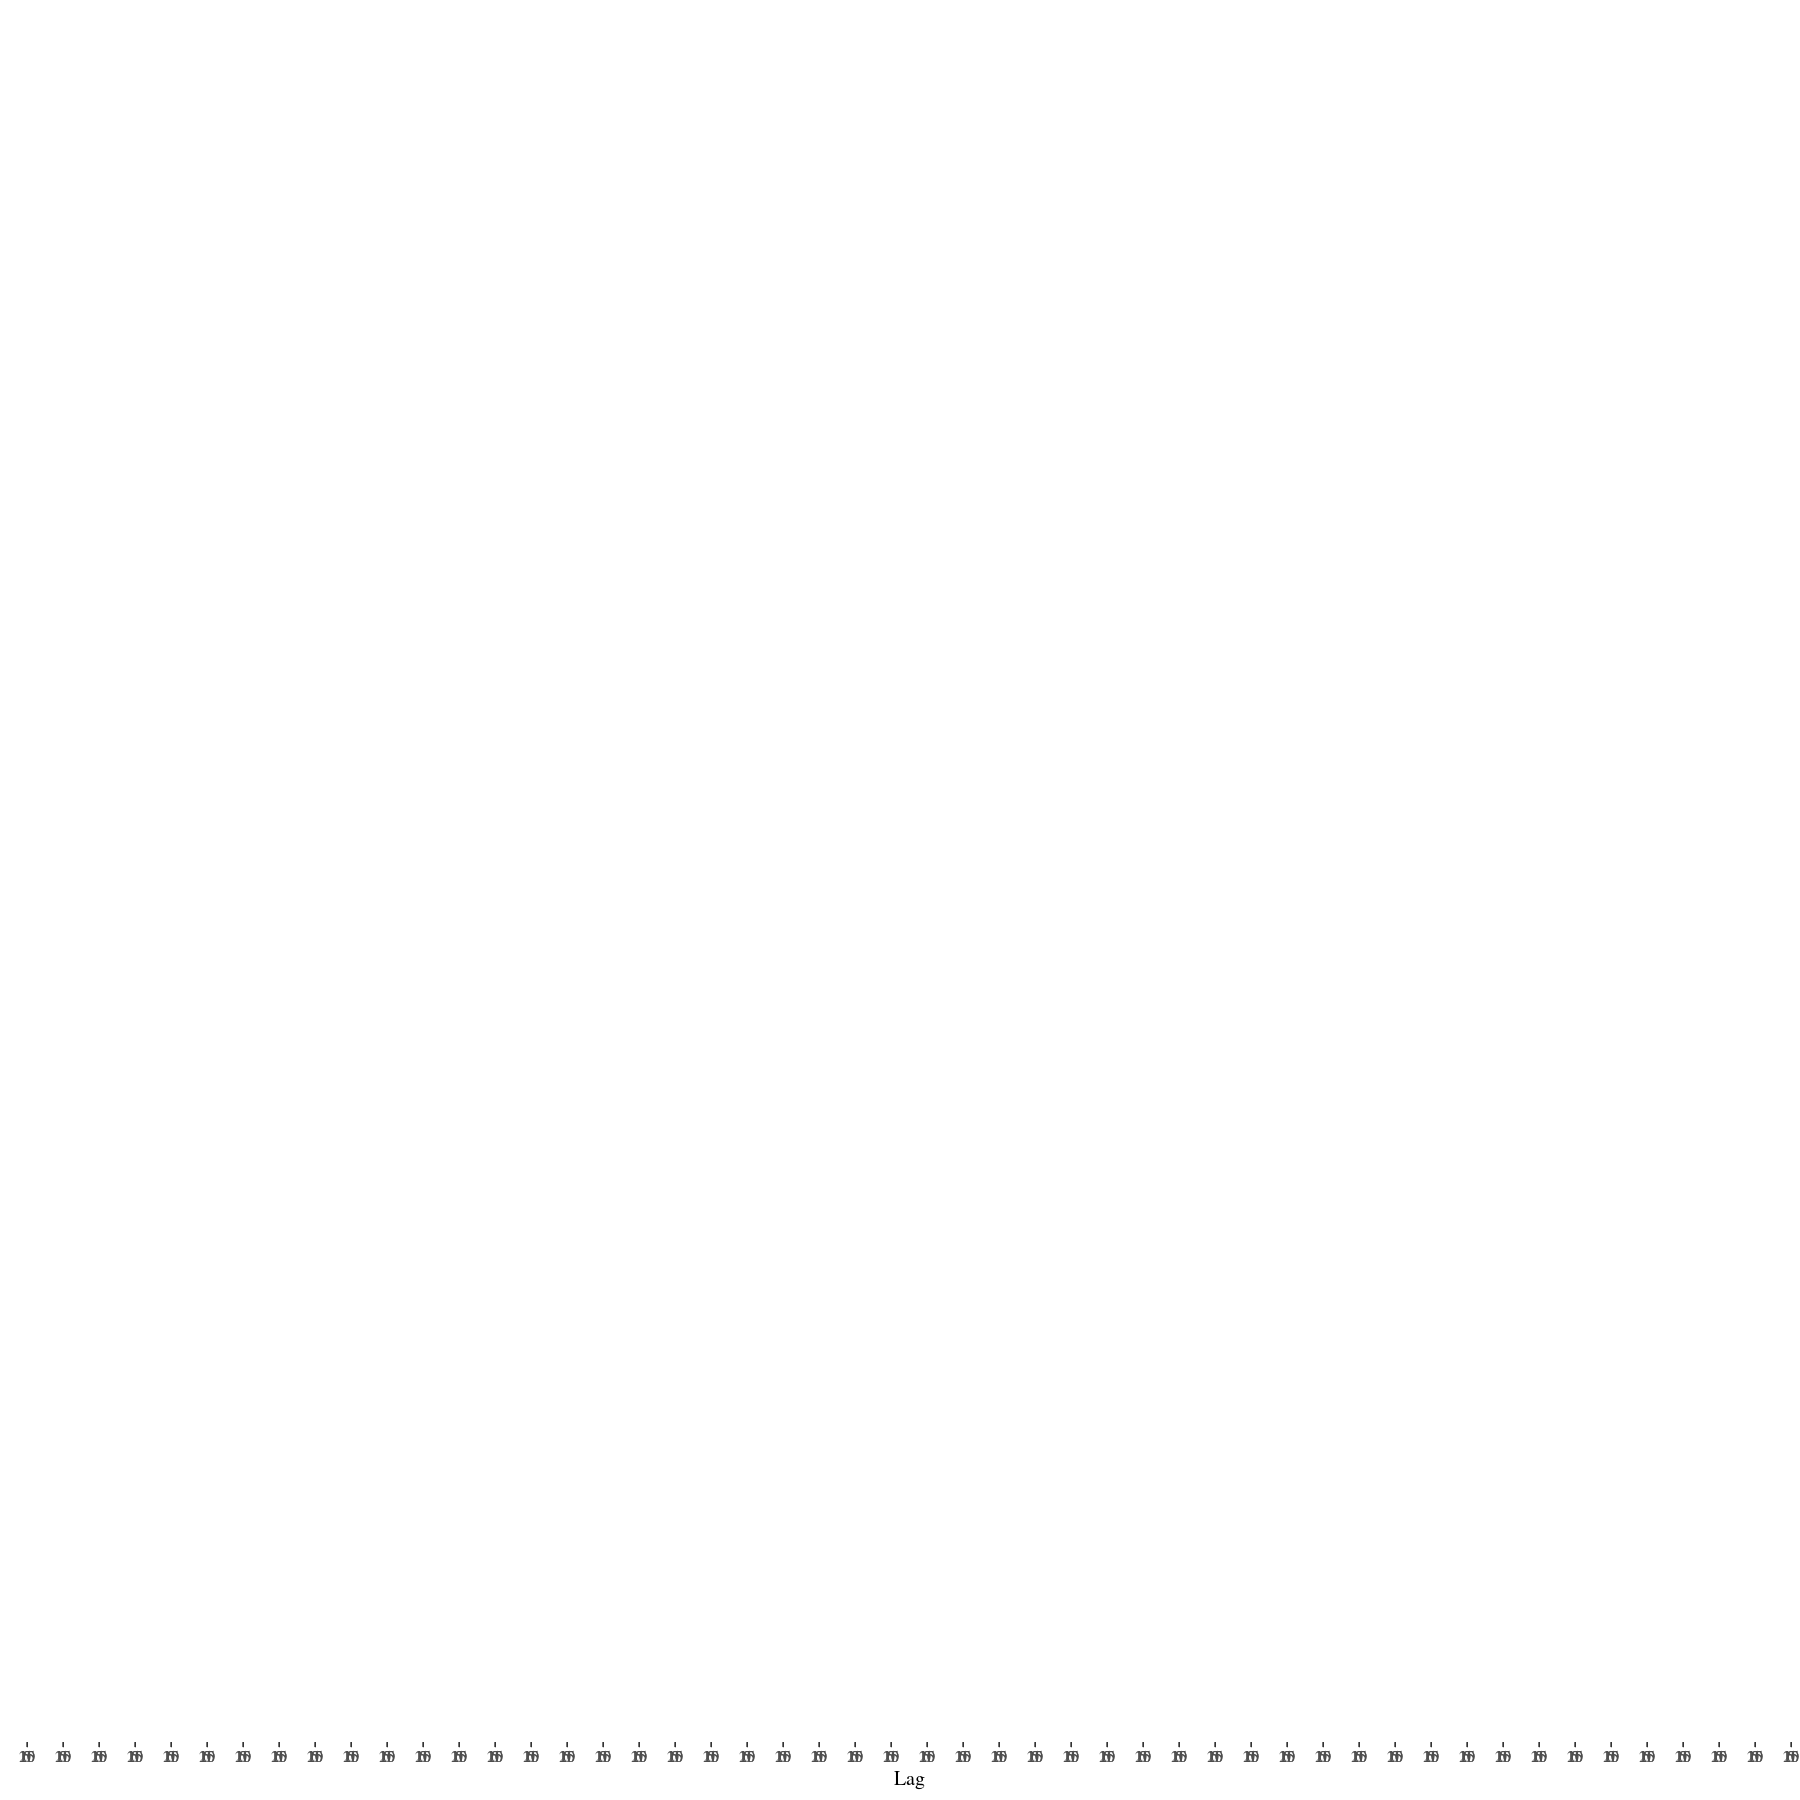

In [22]:
options(repr.plot.width=15, repr.plot.height=15)
mcmc_trace(book_model_1, size = 0.1)
mcmc_dens_overlay(book_model_1)
mcmc_acf(book_model_1)
neff_ratio(book_model_1)
rhat(book_model_1)

Looks good! I find it difficult to bring the autocorrelation plots to a good scale.

### b)

Posterior median model at 80% level:

In [23]:
tidy(book_model_1, effects = "fixed", conf.int = TRUE, conf.level = 0.80)

term        estimate   std.error conf.low    conf.high 
1 (Intercept) -1.1912906 0.1941925 -1.44911049 -0.9411182
2 language     0.3318395 0.1903472  0.08802237  0.5753550
3 antifamily  -1.0319176 0.4835658 -1.68526989 -0.4450214
4 violent      0.4734280 0.2367321  0.17149035  0.7712990

$$\log\left(\frac{p(X_1, X_2, X_3)}{1-p(X_1, X_2, X_3)}\right) = -1.20 + 0.33 X_1 - 1.04 X_2 + 0.48 X_3$$

or in other words

$$p(X_1, X_2, X_3) = \frac{1}{1+exp(-(-1.20 + 0.33 X_1 - 1.04 X_2 + 0.48 X_3))}$$

In [24]:
c( exp(0.33), exp(-1.04), exp(0.48) )

[1] 1.3909681 0.3534547 1.6160744

If the book was challenged for inappropriate language, the odds of it being removed increase by almost 40%. If the book contains anti-family material and was challenged, the odds of it being removed decrease by almost 65%. Finally, if the book was challenged for violent content, the odds of it being removed increase by 62%. In the global model it appears that anti-family content prevents a book from being removed.

### c)

All effects appear to be significant at the 80% level, since none of the 80% credible intervals contain zero.

### d)

In [25]:
exp(0.33) * exp(0.48)

[1] 2.247908

Inappropriate language and violent content and no anti-family content, then the odds for being removed increase by a factor of >2.

## Exercise 18.4 

### a)

I pick a threshold of 0.5, however one should all check all thresholds and rather argue in terms of AUC.

In [26]:
set.seed(84735)
csummary <- classification_summary(data = book_banning, model = book_model_1, cutoff = 0.5)
csummary

$confusion_matrix
 y   0  1
 0 700 14
 1 181 36

$accuracy_rates
                          
sensitivity      0.1658986
specificity      0.9803922
overall_accuracy 0.7905478

At a threshold of 0.5, the accuracy of the model is almost 80%, with extremely low sensitivity (again sensitivity could be tuned by tuning the threshold). The accuracy looks impressive, is however due to the class imbalance in the data:

In [27]:
table( book_banning$removed ) / nrow(book_banning)


        0         1 
0.7669173 0.2330827 

Almost 80% of the books are not banned anyway, so a model that predicts not removed all the time would perform very similar to our model.

In [28]:
predictions <- as.numeric( colMeans( posterior_predict( book_model_1, book_banning, type="response" ) ) )
roc_object <- roc( book_banning$removed, predictions )
auc(roc_object)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.79

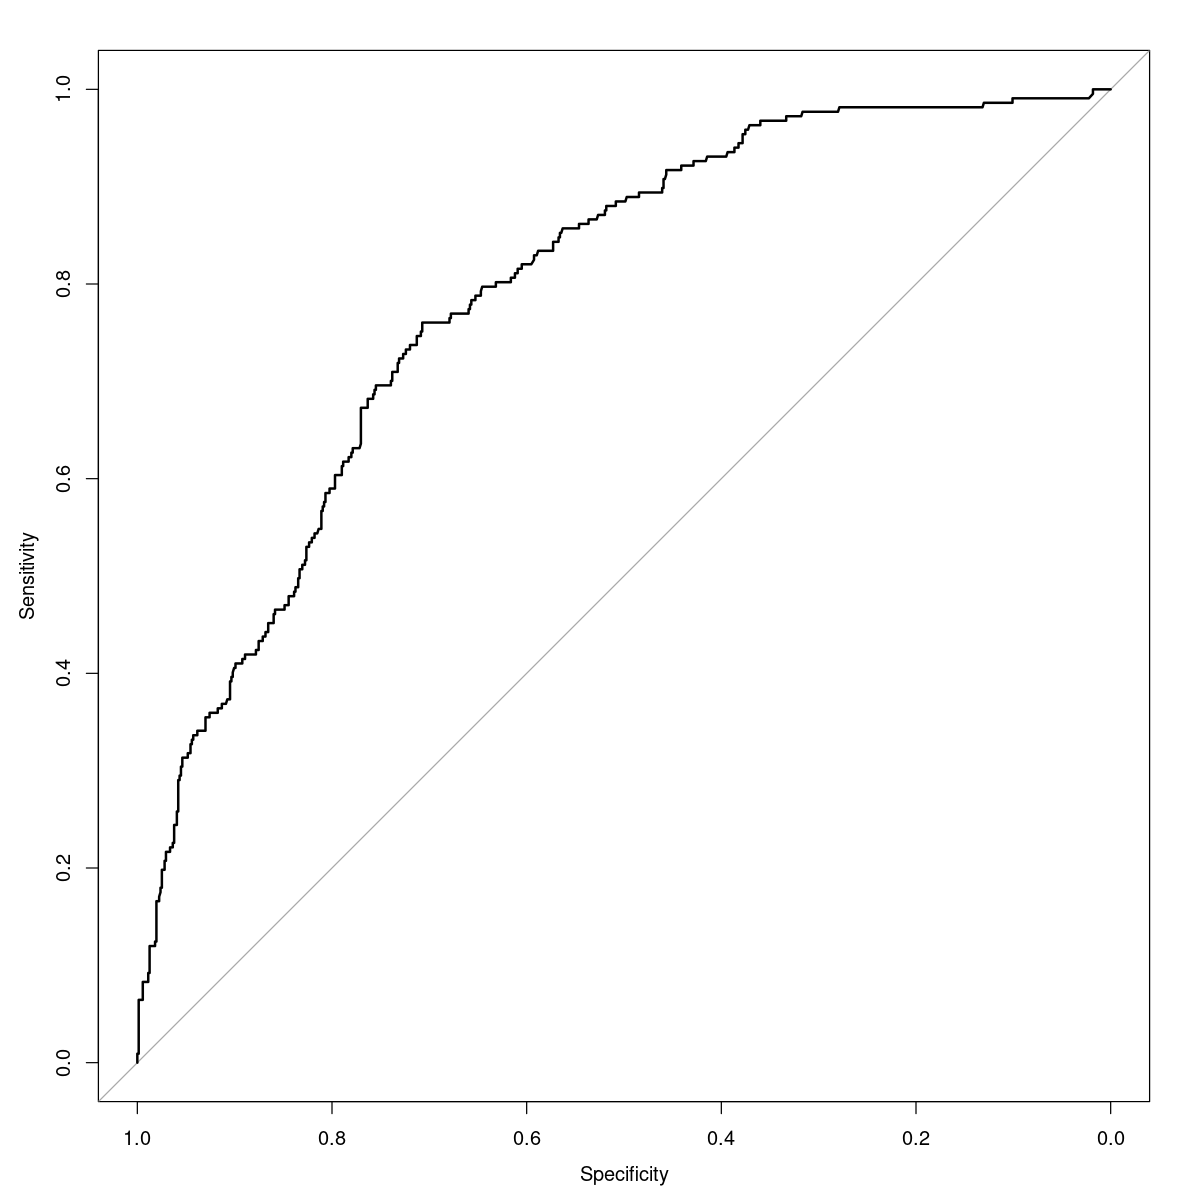

In [29]:
options(repr.plot.width=10, repr.plot.height=10)
plot(roc_object)

One could dive further into the class imbalance problem here..

### b)

In [30]:
tidy(book_model_1, effects = "ran_vals", conf.int = TRUE, conf.level = 0.80) %>% 
    filter( level %in% c("KS", "OR") )

level group term        estimate  std.error conf.low  conf.high
1 KS    state (Intercept)  1.530648 0.5388864  0.864348  2.253114
2 OR    state (Intercept) -1.735703 0.4055810 -2.290942 -1.242795

In [31]:
c( exp(1.53), exp(-1.73) )

[1] 4.6181768 0.1772844

The baseline odds for a book to be removed once challenged in Kansas are 4:1, while they are only 0.18:1 $\approx$ 1:5.5 in Oregon. This makes sense when looking at the data:

In [32]:
book_banning %>% 
    filter( state  %in%  c("KS", "OR") ) %>%
    group_by( state ) %>% 
    summarize( removal_rate = mean( removed ) )

state removal_rate
1 KS    0.76923077  
2 OR    0.04237288

### c)

In [33]:
predictions <- posterior_predict( book_model_1, newdata=data.frame( 
    state=c("KS", "OR"), 
    language=c(1,1), 
    antifamily=c(0,0), 
    violent=c(0,0)) 
)

colMeans( predictions )

1       2 
0.65585 0.07085

66% of the posterior models predict that the book will be banned in Kansas and 7.1% that it will be banned in Oregon.

## Exercise 18.5

In [34]:
colnames( basketball )

[1] "player_name"                "height"                    
 [3] "weight"                     "year"                      
 [5] "team"                       "age"                       
 [7] "games_played"               "games_started"             
 [9] "avg_minutes_played"         "avg_field_goals"           
[11] "avg_field_goal_attempts"    "field_goal_pct"            
[13] "avg_three_pointers"         "avg_three_pointer_attempts"
[15] "three_pointer_pct"          "avg_two_pointers"          
[17] "avg_two_pointer_attempts"   "two_pointer_pct"           
[19] "avg_free_throws"            "avg_free_throw_attempts"   
[21] "free_throw_pct"             "avg_offensive_rb"          
[23] "avg_defensive_rb"           "avg_rb"                    
[25] "avg_assists"                "avg_steals"                
[27] "avg_blocks"                 "avg_turnovers"             
[29] "avg_personal_fouls"         "avg_points"                
[31] "total_minutes"              "starter"

In [35]:
dim( basketball )

[1] 146  32

In [36]:
basketball %>% count( year )

year n  
1 2019 146

Each row represents the statistics of a player in 2019.

### a)

Some player names appear in multiple teams:

In [37]:
basketball %>% count( player_name, team ) %>% count( player_name ) %>% filter( n>1 )

player_name       n
1 Alaina Coates     3
2 Asia Taylor       3
3 Bridget Carleton  3
4 Karlie Samuelson  3
5 Kristine Anigwe   3
6 Theresa Plaisance 3

It appears that these are team changes within the year. It is not quite clear how to treat these exceptions, but they are few in number, so we neglect them.

In [38]:
basketball %>% summarize( 
    n_player_statistics=n(), 
    n_unique_players=n_distinct(player_name), 
    n_teams=n_distinct(team) 
)

n_player_statistics n_unique_players n_teams
1 146                 134              13

### b)

13, see a)

### c)

`geom_smooth()` using formula = 'y ~ x'


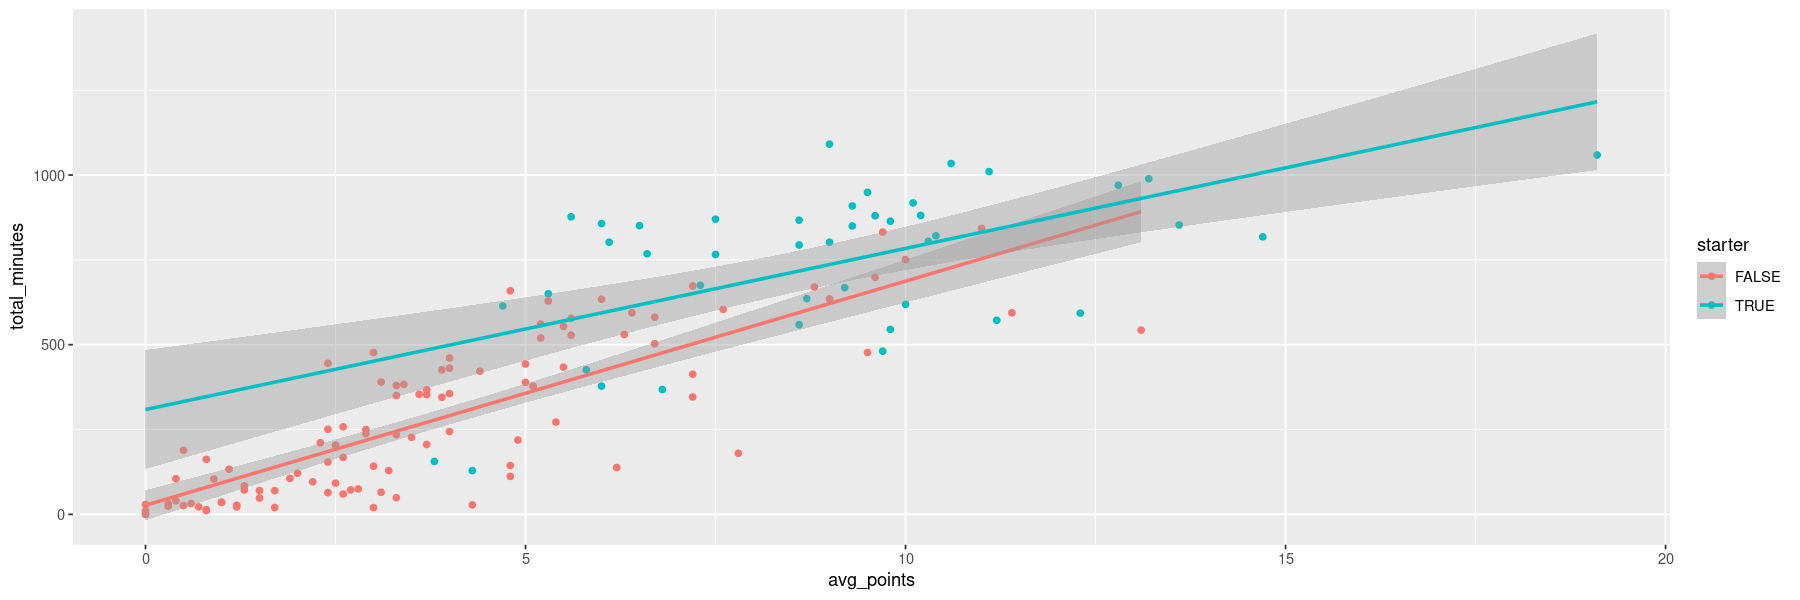

In [39]:
options(repr.plot.width=15, repr.plot.height=5)
ggplot( basketball, aes(x=avg_points, y=total_minutes, color=starter)) + geom_point() + geom_smooth( method="lm" )

People who score more average points are also more often starters. People with more average points play longer throughout the season. This appears to make sense, better people are probably kept longer in the game. The relationship between total minutes and average points scored is more or less linear with very similar slopes.

### d)

`geom_smooth()` using formula = 'y ~ x'


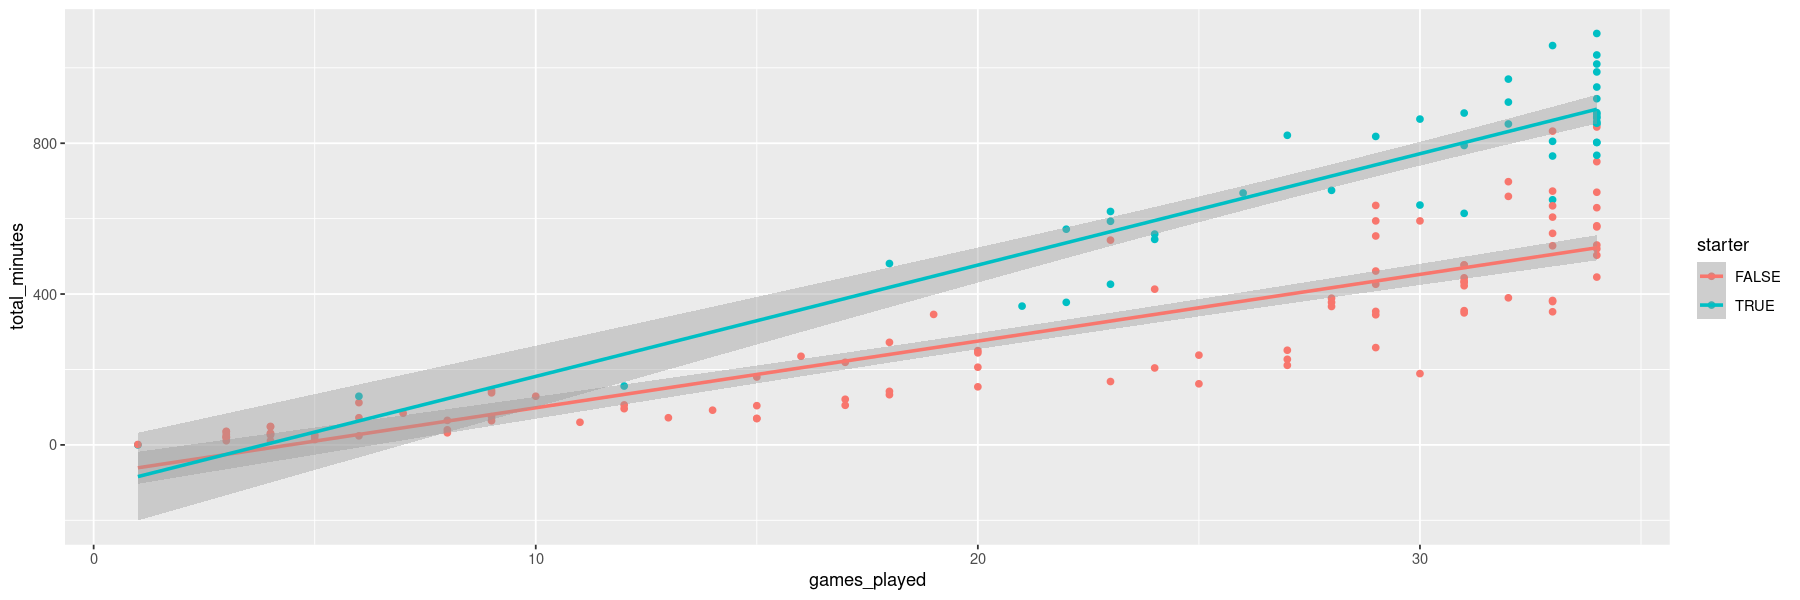

In [40]:
ggplot( basketball, aes(x=games_played, y=total_minutes, color=starter)) + geom_point() + geom_smooth( method="lm" )

The more games people played the more total minutes they had. Starters have more total minutes at the same number of games. The relationship between total minutes and games played is roughly linear. The fitted blue model in the plot for starters appears not too trustable at the lower end, probably assuming the same slope for starters and non-starters is reasonable.

## Exercise 18.6

### a)

$$Y_{ij} | \beta_{0j}, \beta_1, \beta_2, \beta_3 \sim \text{Pois}(\lambda_{ij}), \quad \text{with } \log\left(\lambda_{ij}\right) = \beta_{0j} + \beta_1 X_{ij1} + \beta_2 X_{ij2} + \beta_3 X_{ij3}$$ 

$$\beta_{0j}|\beta_0, \sigma_0 \sim N(\beta_0, \sigma_0^2)$$

$$\beta_{0c}\sim N(m_0, s_0^2)$$

$$\beta_{1}\sim N(m_1, s_1^2)$$

$$\beta_{2}\sim N(m_2, s_2^2)$$

$$\beta_{3}\sim N(m_3, s_3^2)$$

$$\sigma_0 \sim \text{Exp}(l_0)$$

Here $Y_{ij}$ indicates the total minutes player $i$ of team $j$ played, $X_{ij1}$ stands for `avg_points`, $X_{ij2}$ is an indicator variable for `starter` and $X_{ij3}$ stands for `games_played`.

### b)

`total_minutes` is a positive number, of all the distributions we have seen in this book, only the Poisson and the negative binomial distributions are ready to model outcomes with only positive values.

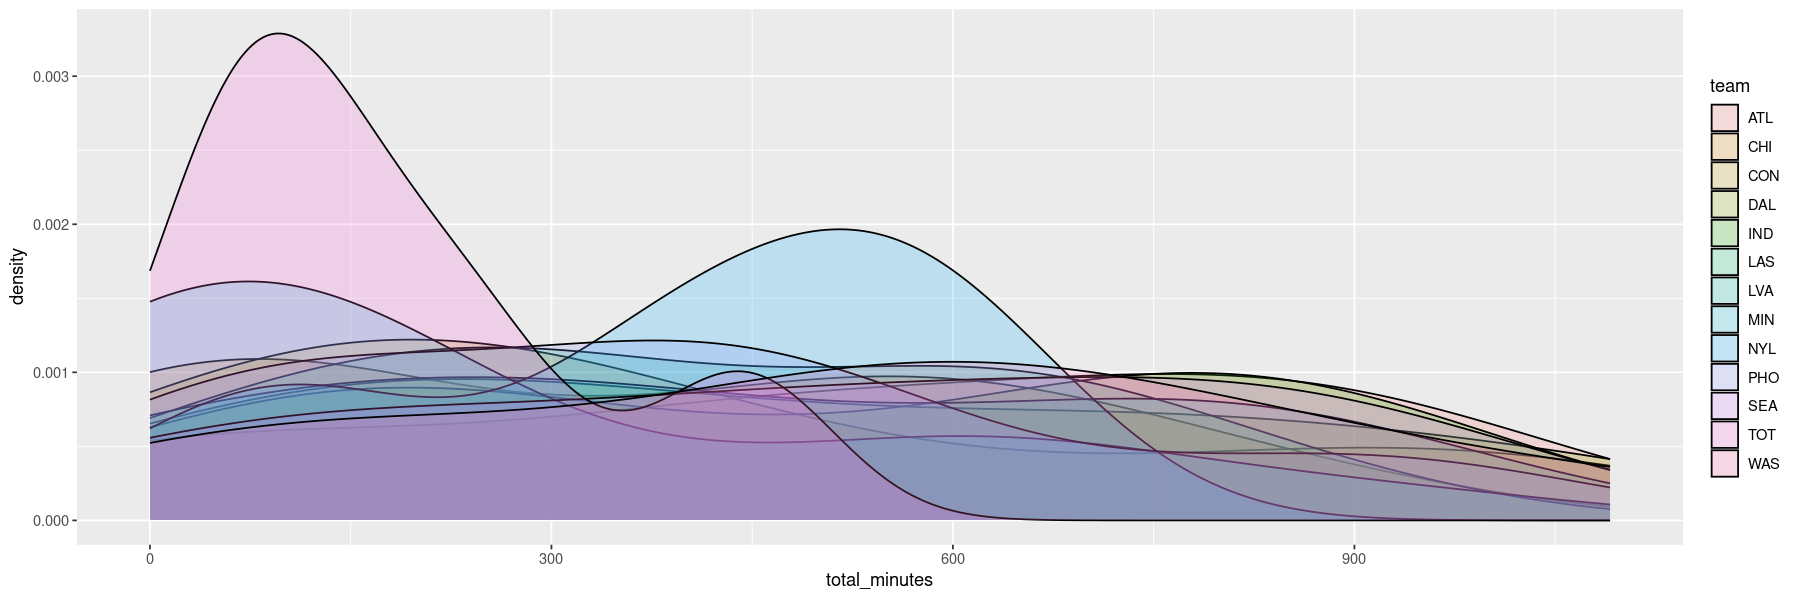

In [41]:
ggplot( basketball, aes(x=total_minutes, fill=team) ) + geom_density( alpha=0.2 )

It is hard to find a Poisson distribution in here, we can only find out with a posterior predictive check whether a Poisson regression fits or we should use a negative binomial regression (if expection and variance are not the same) - the only models we know in this book to deal with only positive values.

### c)

The distribution of `total_minutes` varies quite a bit per team:

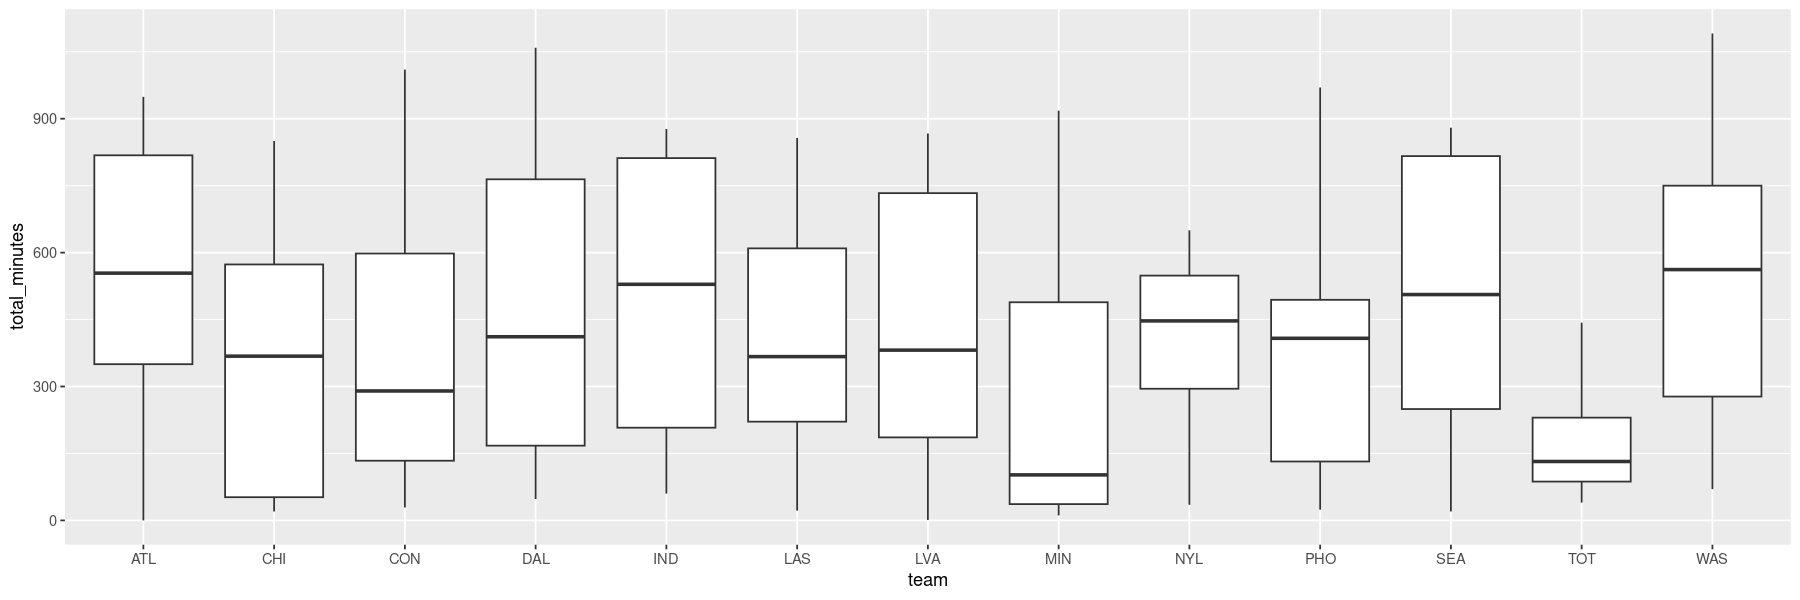

In [42]:
ggplot( basketball, aes(x=team, y=total_minutes) ) + geom_boxplot()

The number of team members is not very large for a hierarchical regression models with group-specific intercepts and three different slopes:

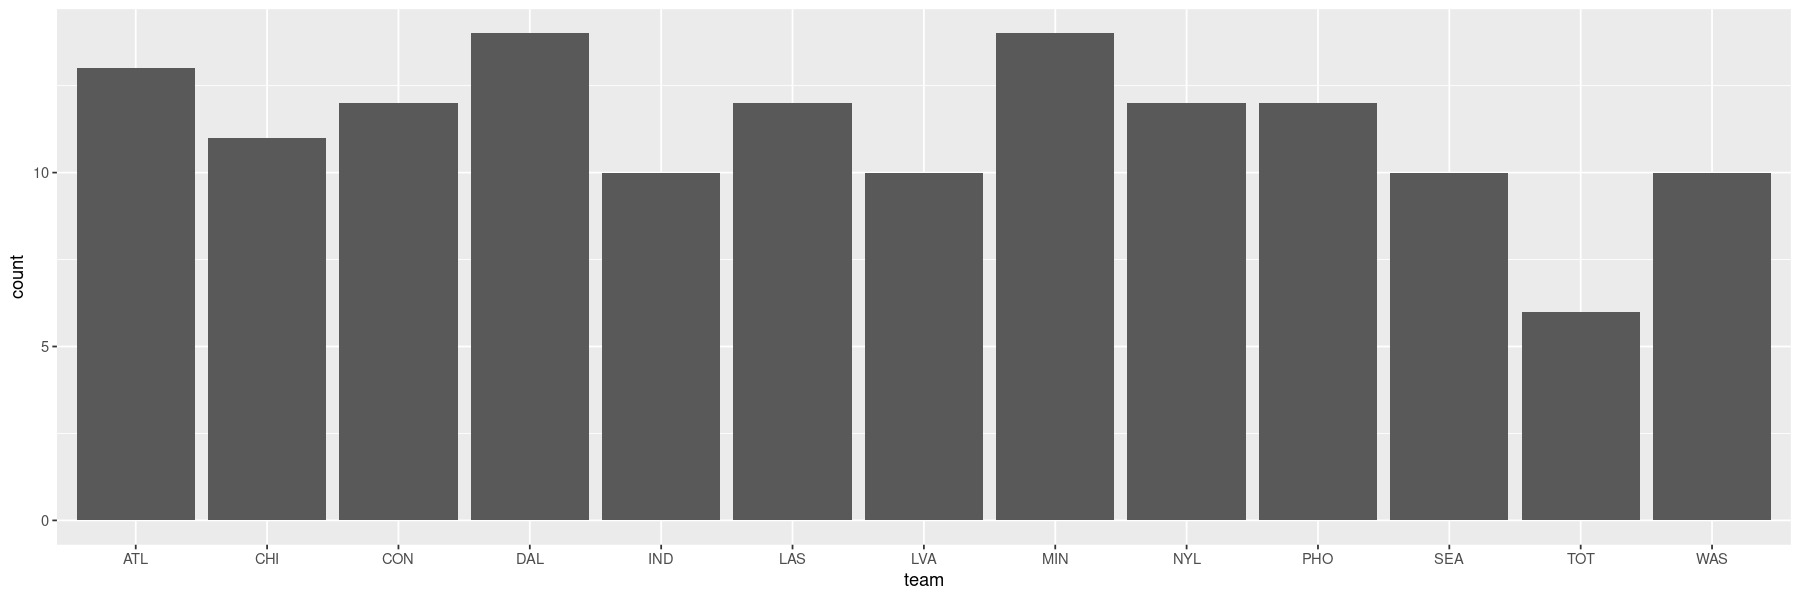

In [43]:
ggplot( basketball, aes(x=team) ) + geom_bar()

### d)

In [44]:
set.seed(84735)
basketball_model_poisson <- stan_glmer(
  total_minutes ~ games_played + starter + avg_points + (1 | team), 
  data = basketball, family = poisson,
  prior_intercept = normal(0, 2.5, autoscale = TRUE),
  prior = normal(0, 2.5, autoscale = TRUE), 
  prior_covariance = decov(reg = 1, conc = 1, shape = 1, scale = 1),
  chains = 4, iter = 5000*2, seed = 84735
)

Diagnostics:

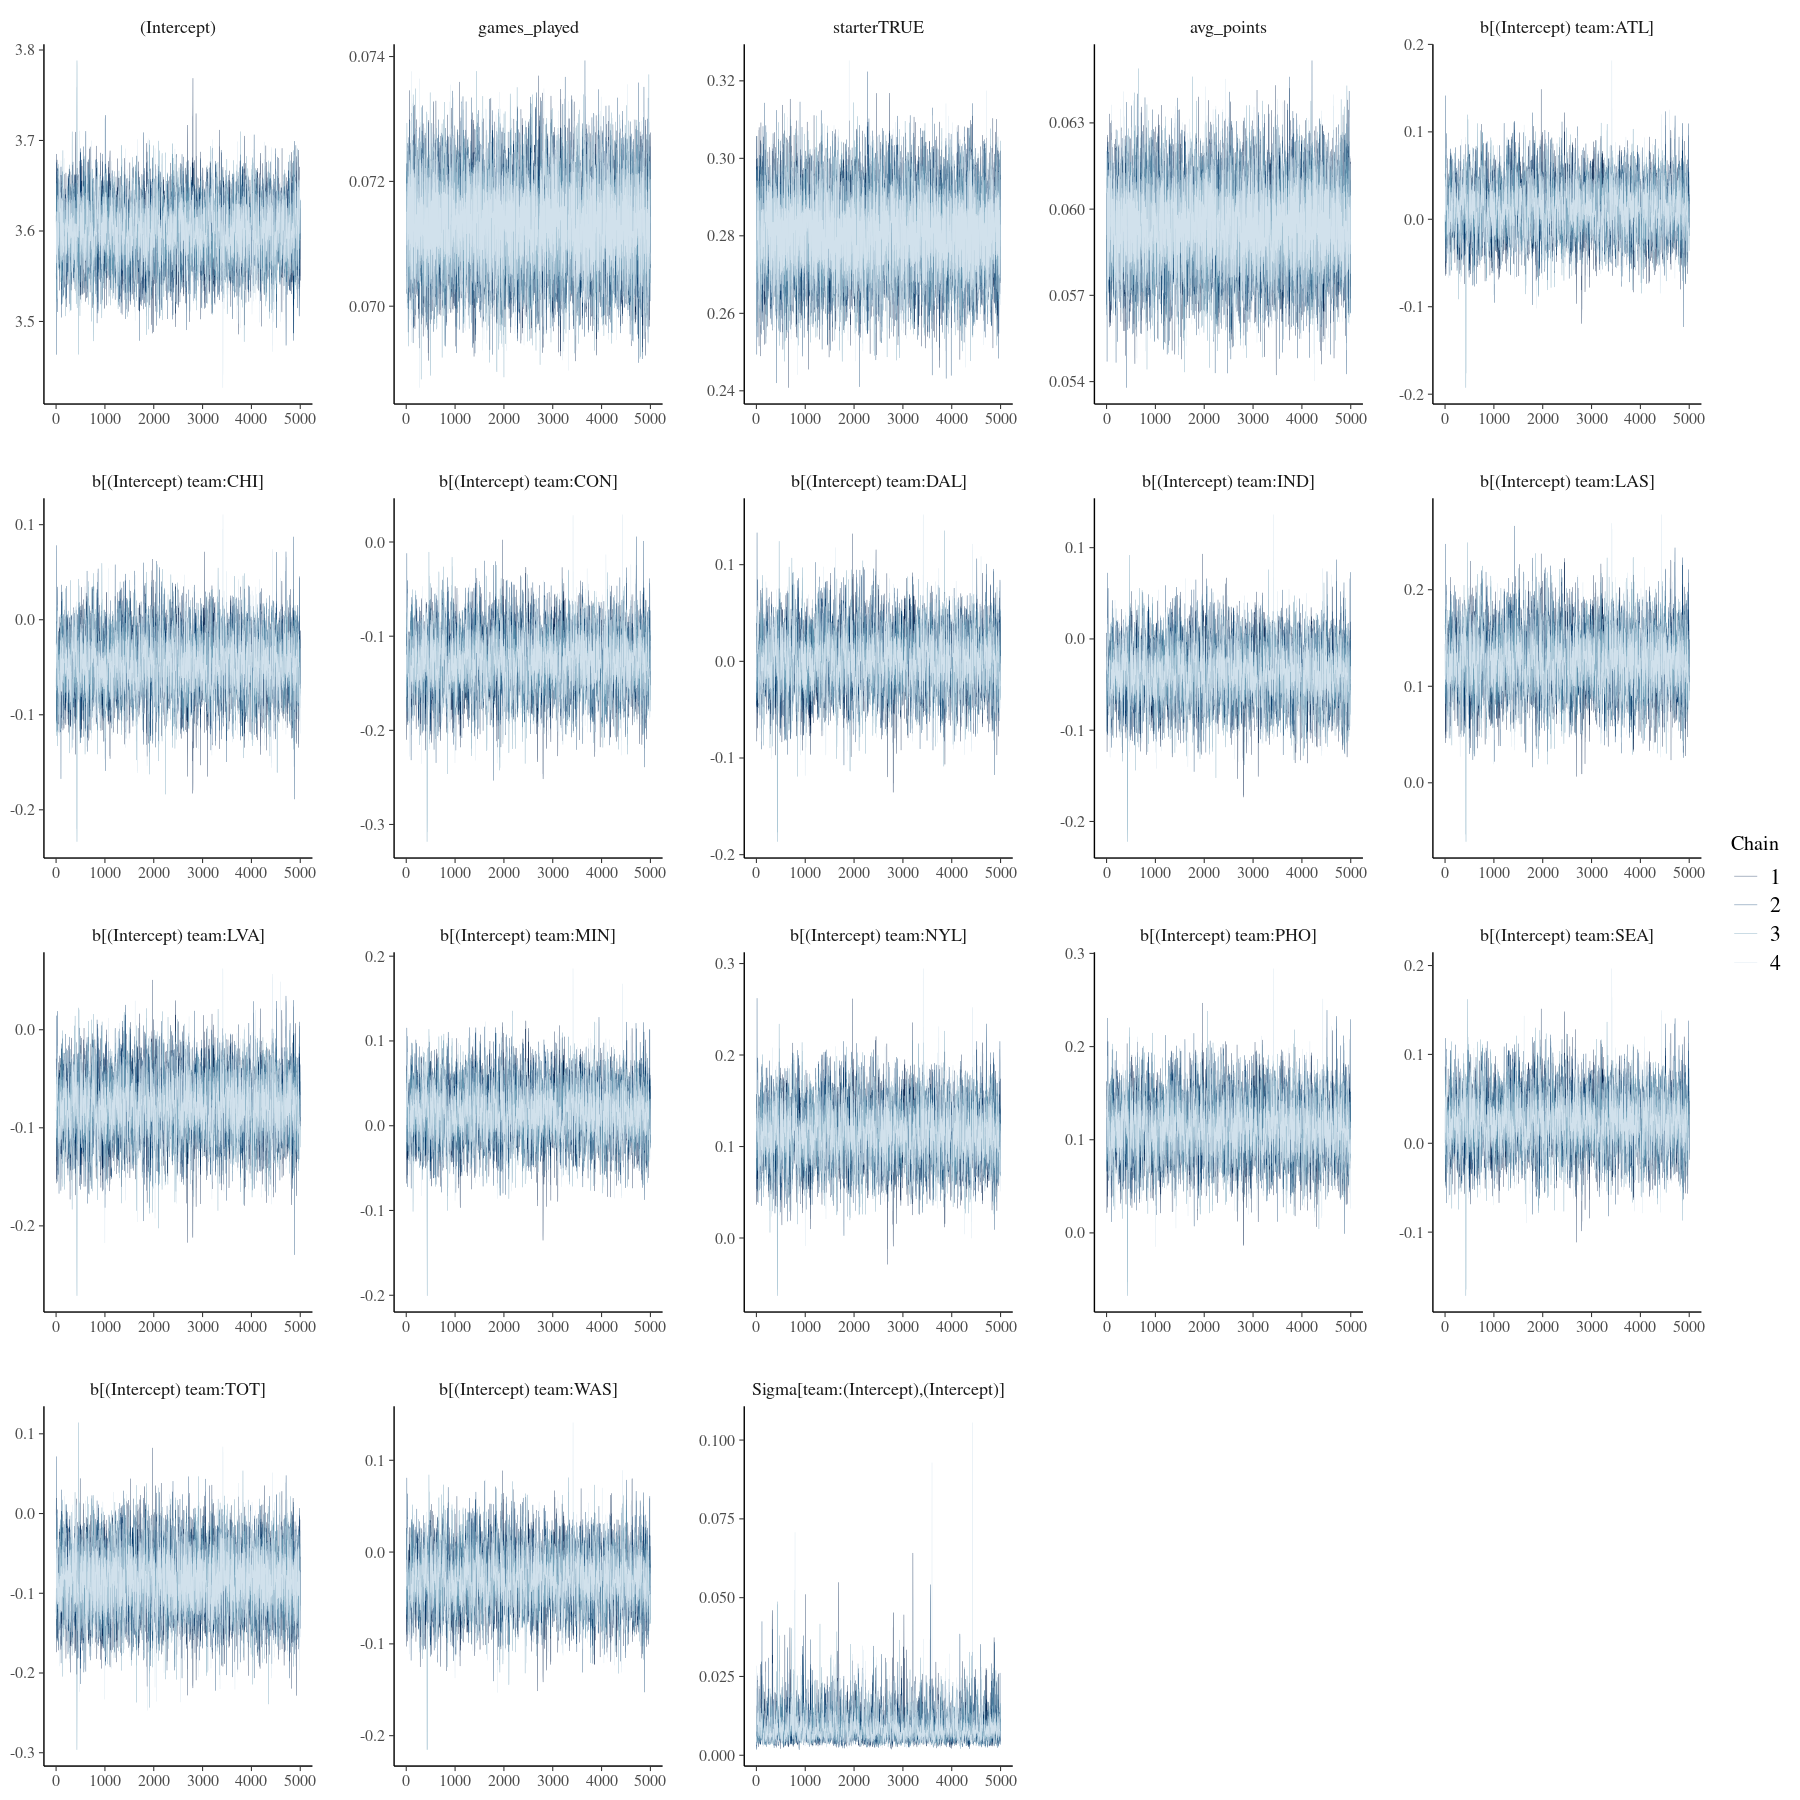

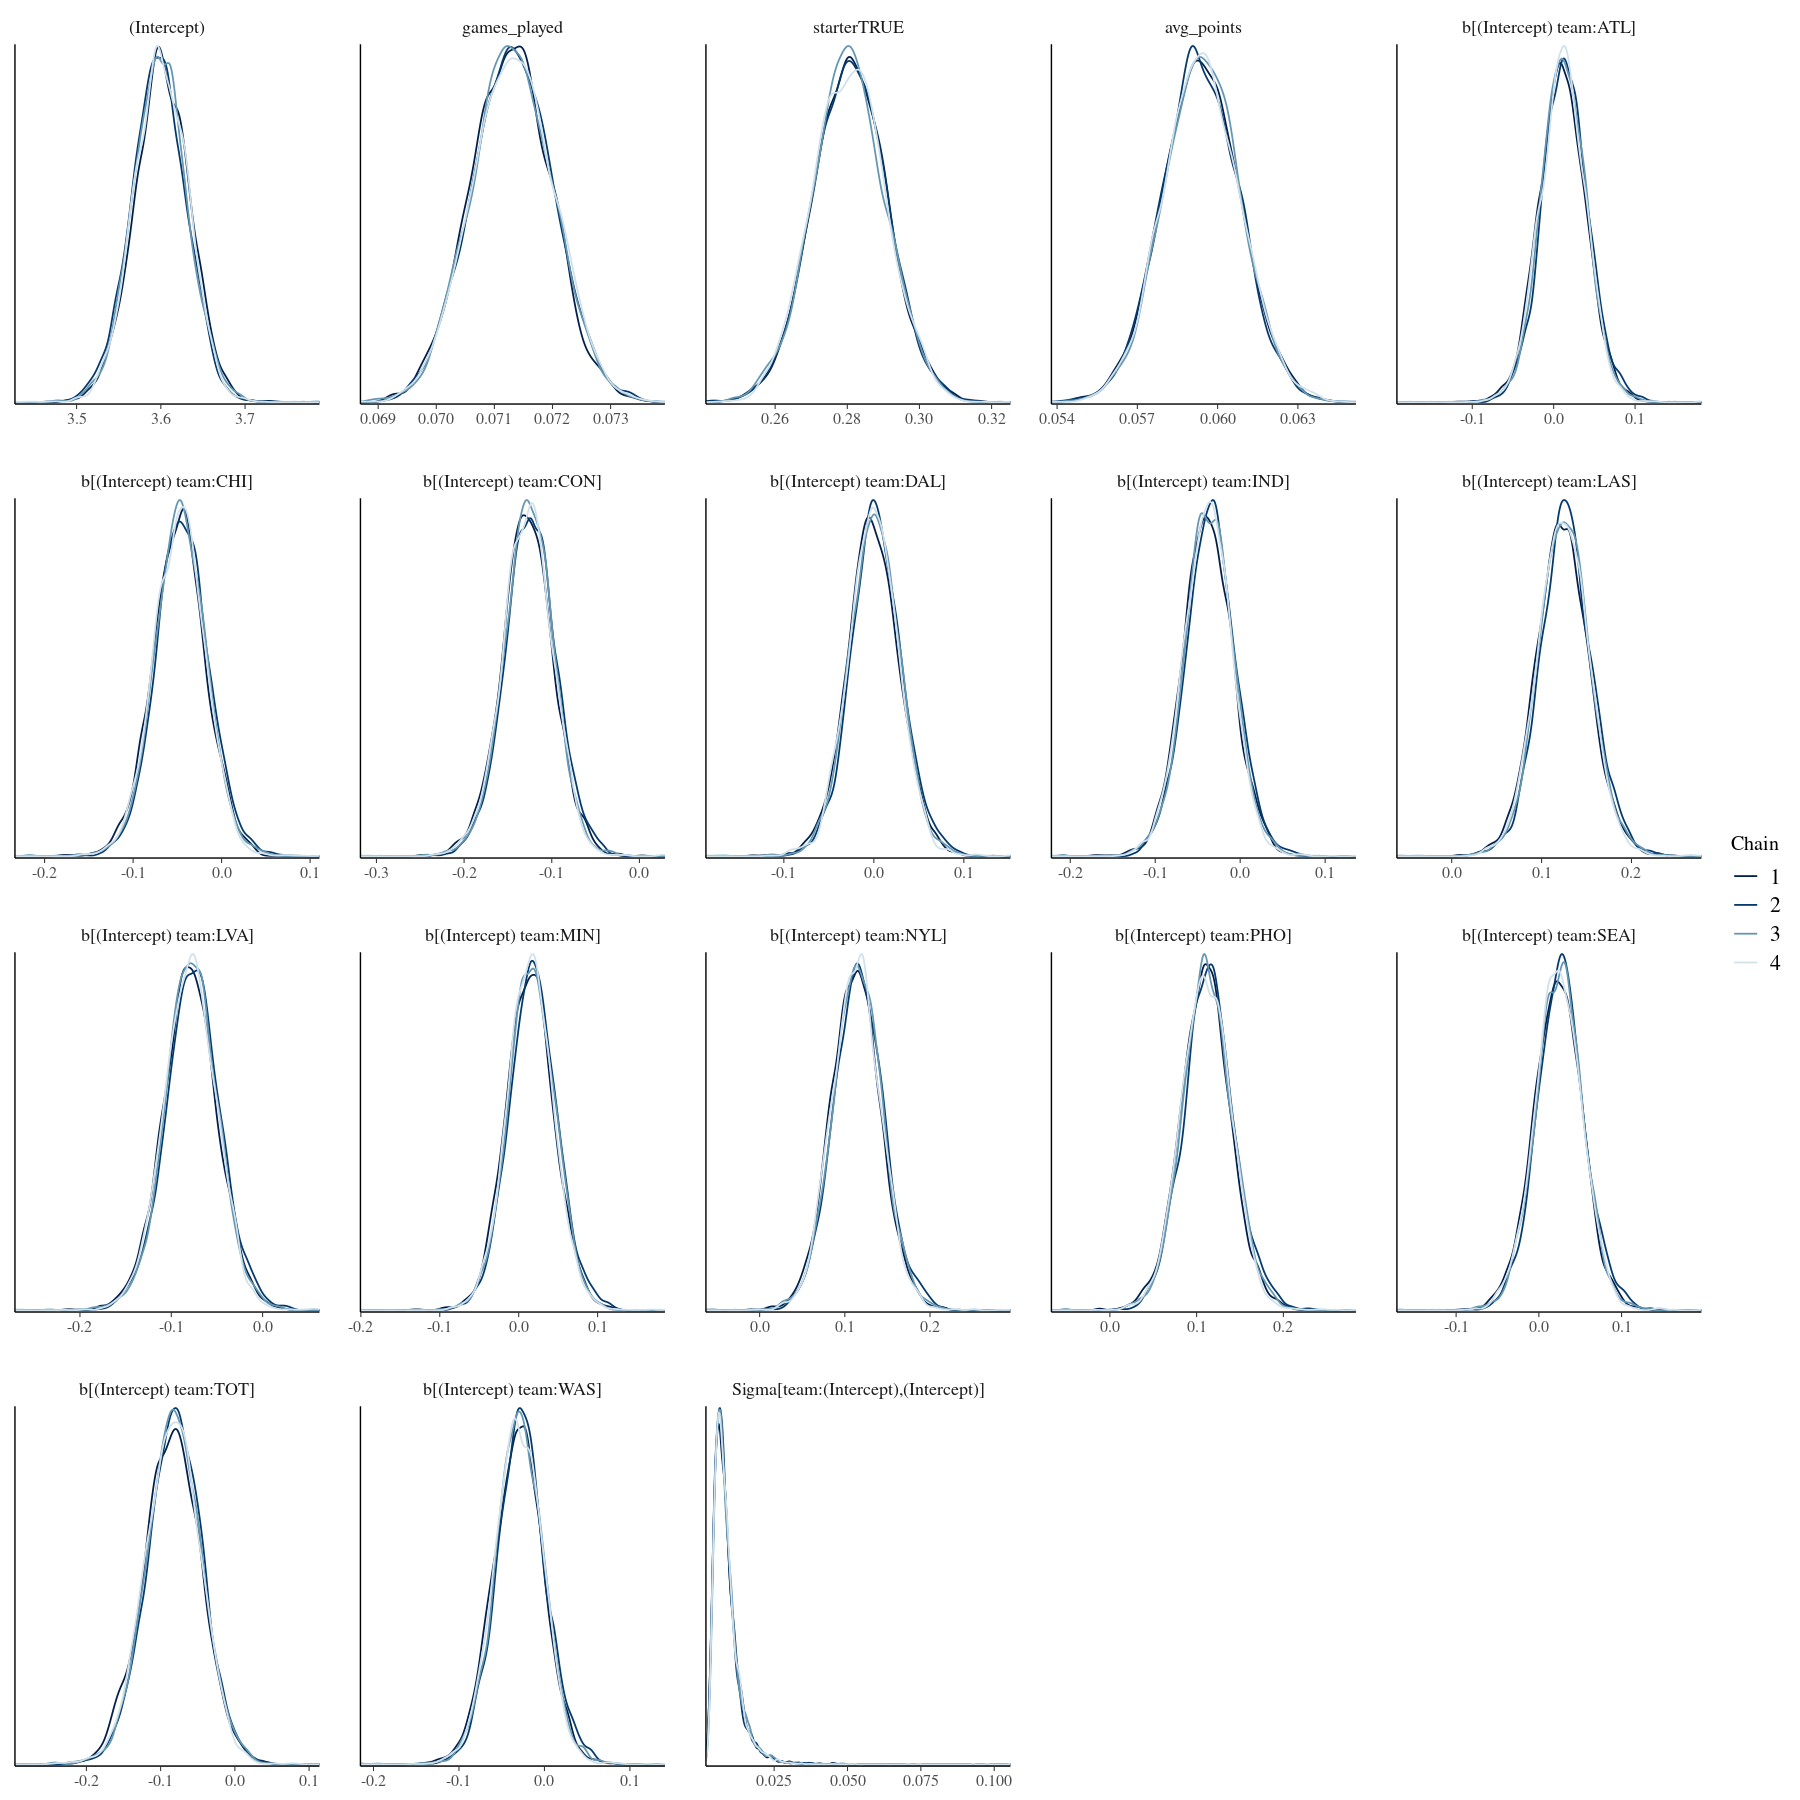

(Intercept)                        games_played 
                            0.23390                             0.73640 
                        starterTRUE                          avg_points 
                            0.79900                             0.69445 
            b[(Intercept) team:ATL]             b[(Intercept) team:CHI] 
                            0.19750                             0.21300 
            b[(Intercept) team:CON]             b[(Intercept) team:DAL] 
                            0.20935                             0.19610 
            b[(Intercept) team:IND]             b[(Intercept) team:LAS] 
                            0.20700                             0.20860 
            b[(Intercept) team:LVA]             b[(Intercept) team:MIN] 
                            0.21205                             0.21895 
            b[(Intercept) team:NYL]             b[(Intercept) team:PHO] 
                            0.20855                             0.21020 
            b[(Intercept) team:SEA]             b[(Intercept) team:TOT] 
                            0.20755                             0.32725 
            b[(Intercept) team:WAS] Sigma[team:(Intercept),(Intercept)] 
                            0.20235                             0.18185

(Intercept)                        games_played 
                           1.001525                            1.000306 
                        starterTRUE                          avg_points 
                           1.000101                            1.000177 
            b[(Intercept) team:ATL]             b[(Intercept) team:CHI] 
                           1.001478                            1.001589 
            b[(Intercept) team:CON]             b[(Intercept) team:DAL] 
                           1.001830                            1.001601 
            b[(Intercept) team:IND]             b[(Intercept) team:LAS] 
                           1.001688                            1.001600 
            b[(Intercept) team:LVA]             b[(Intercept) team:MIN] 
                           1.001379                            1.001666 
            b[(Intercept) team:NYL]             b[(Intercept) team:PHO] 
                           1.001650                            1.001599 
            b[(Intercept) team:SEA]             b[(Intercept) team:TOT] 
                           1.001494                            1.000952 
            b[(Intercept) team:WAS] Sigma[team:(Intercept),(Intercept)] 
                           1.001629                            1.000580

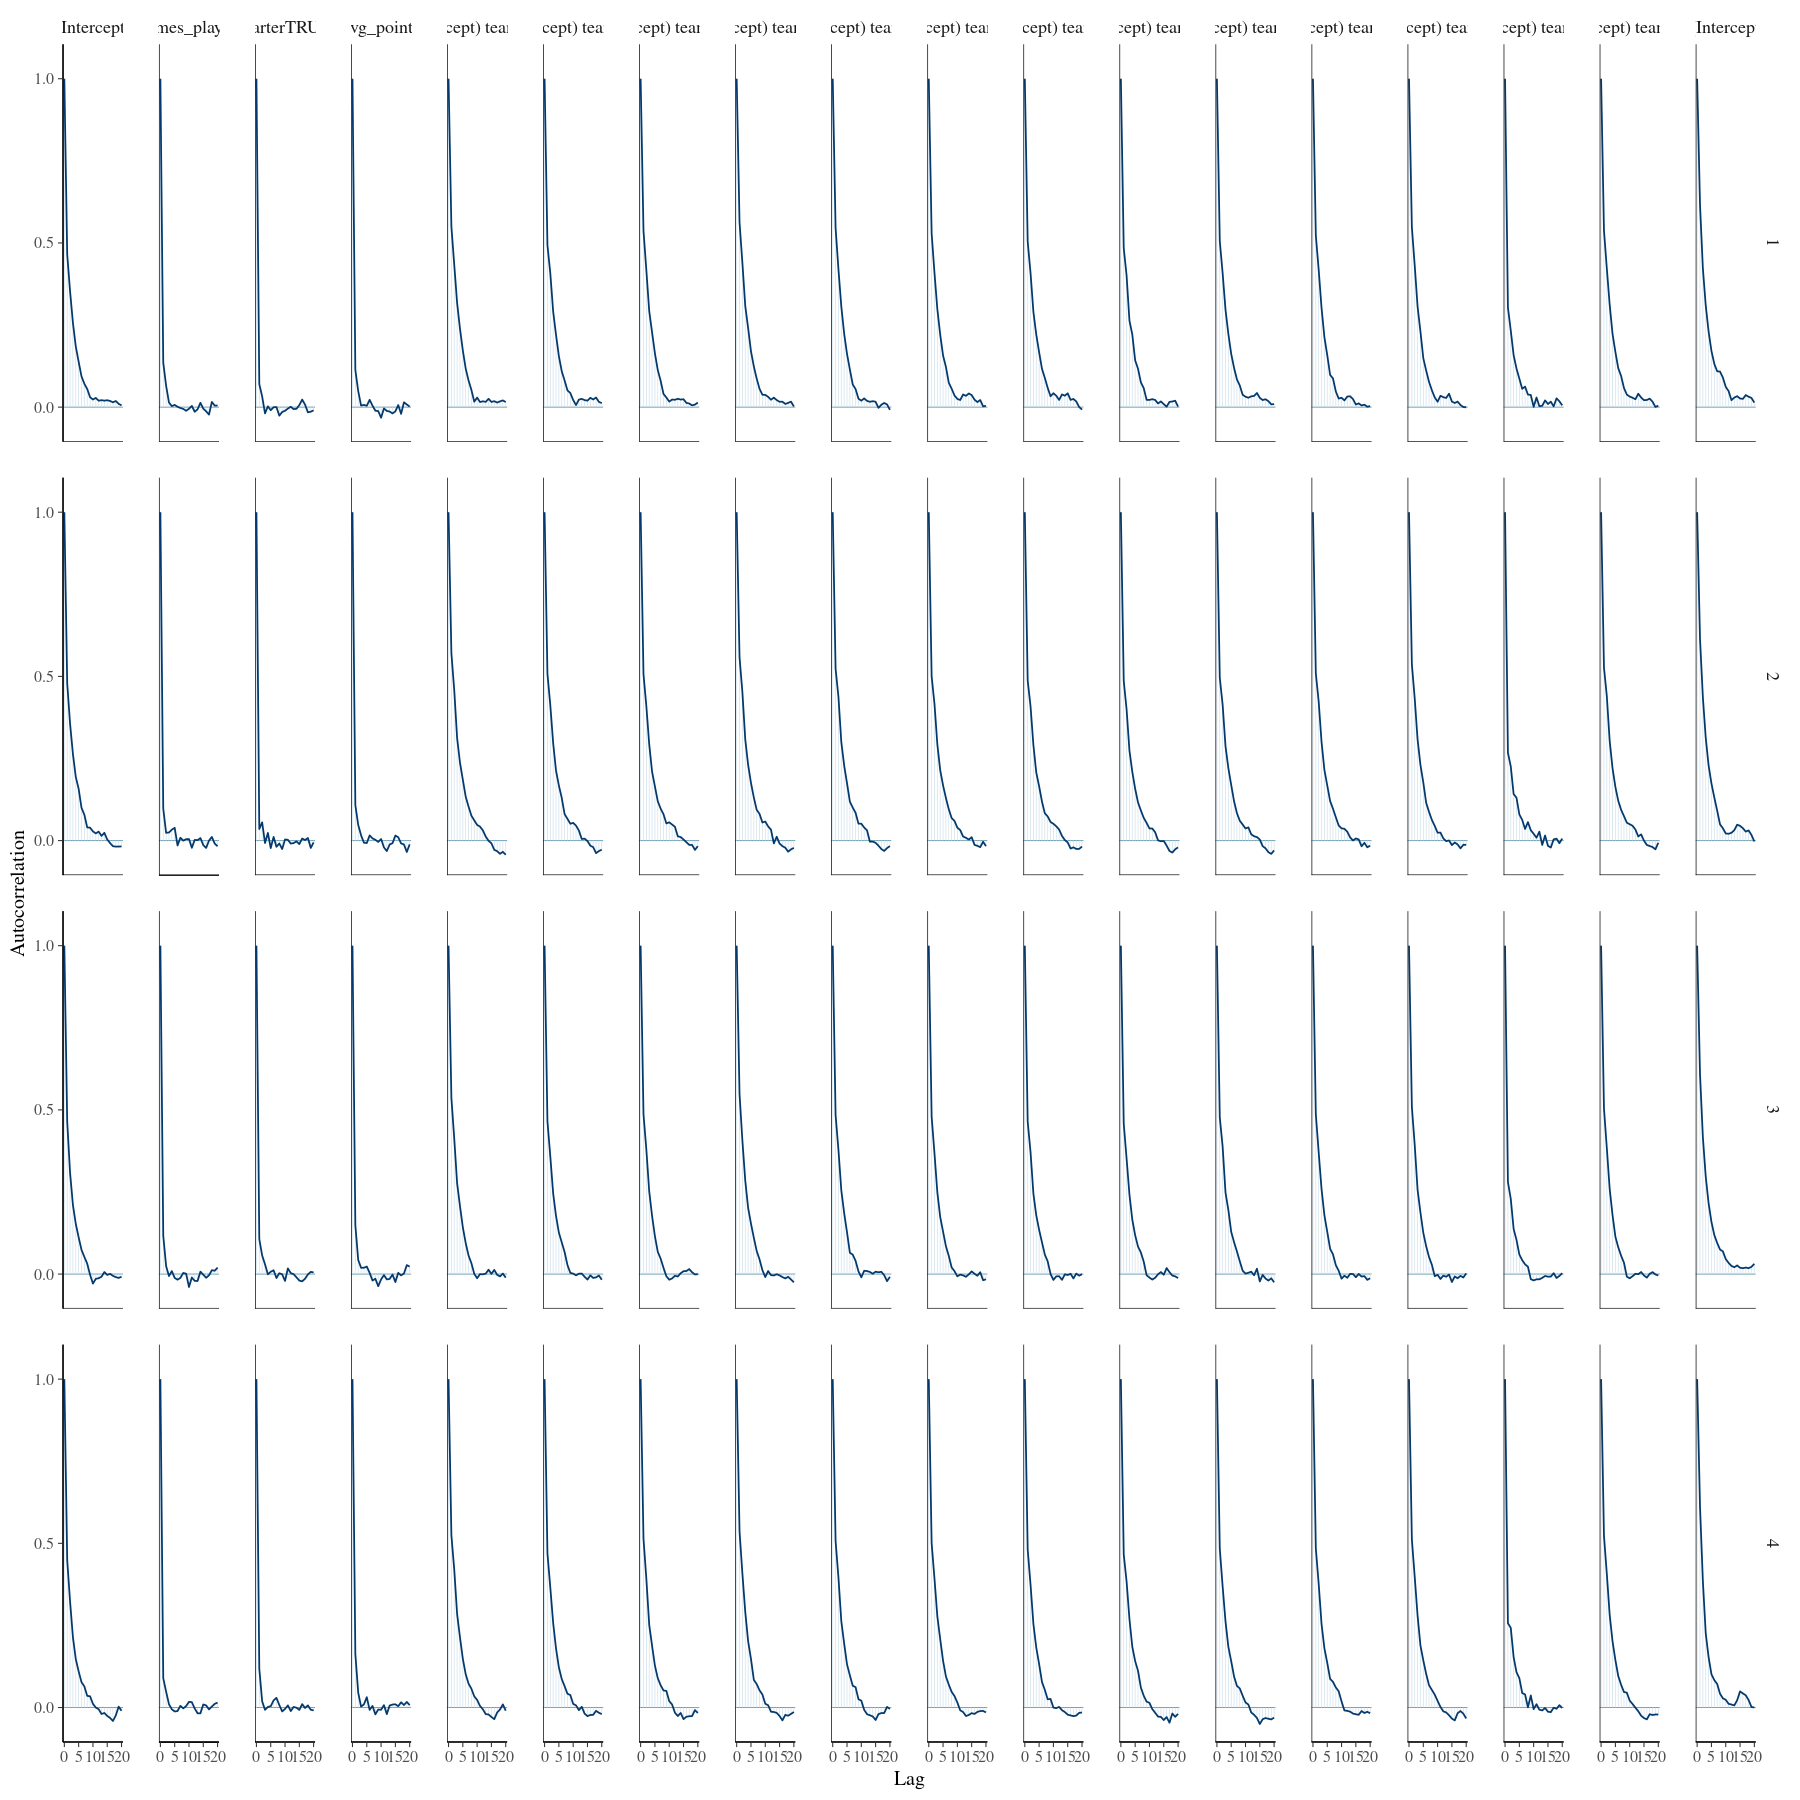

In [45]:
options(repr.plot.width=15, repr.plot.height=15)
mcmc_trace(basketball_model_poisson, size = 0.1)
mcmc_dens_overlay(basketball_model_poisson)
mcmc_acf(basketball_model_poisson)
neff_ratio(basketball_model_poisson)
rhat(basketball_model_poisson)

Looks quite ok at first sight!

Posterior predictive check:

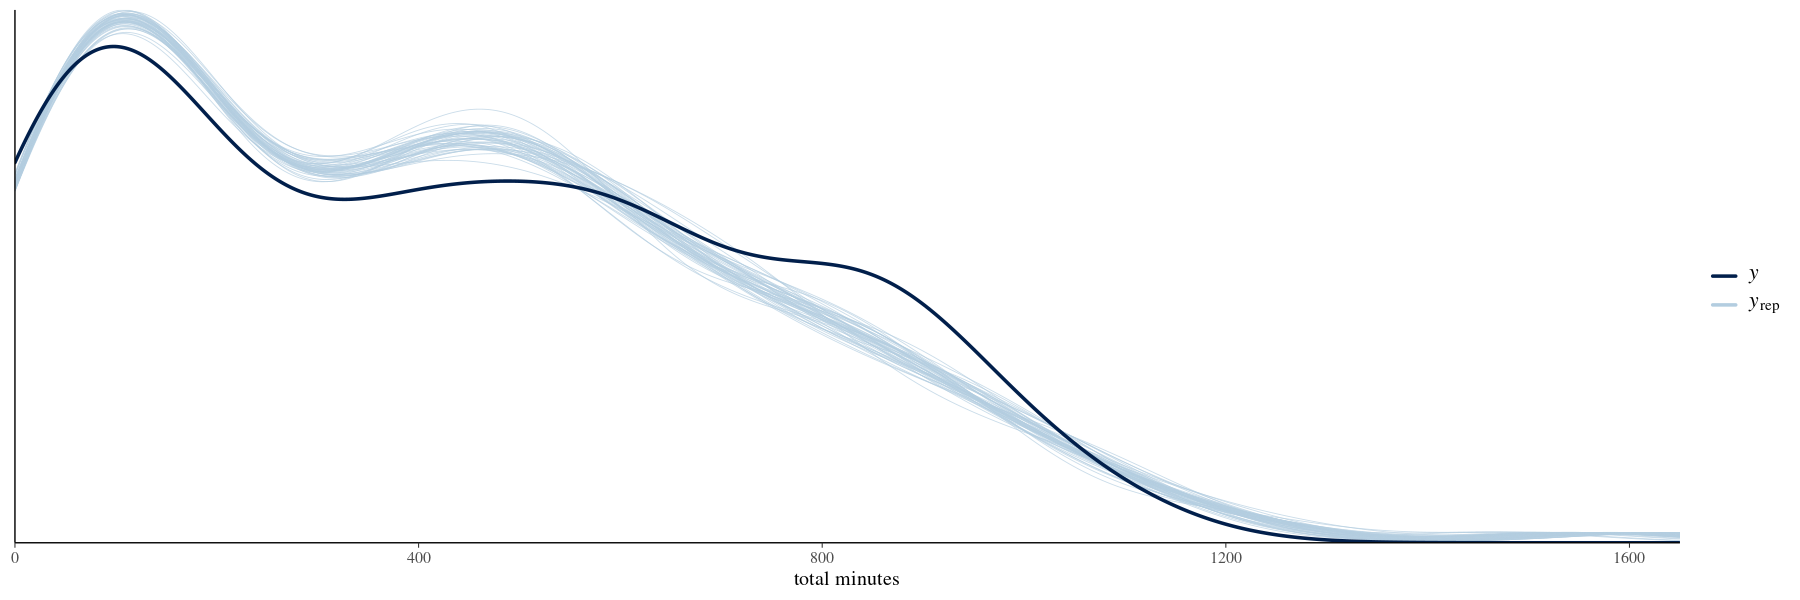

In [46]:
options(repr.plot.width=15, repr.plot.height=5)
pp_check(basketball_model_poisson) + xlab("total minutes")

The hierarchical Poisson model is quite close to reality, but interestingly it is much too confident! Might this be because of the assumption that variance equals expectation?

## Exercise 18.7

### Simulate models

Negative binomial model:

In [47]:
set.seed(84735)
basketball_model_negbinom <- stan_glmer(
  total_minutes ~ games_played + starter + avg_points + (1 | team), 
  data = basketball, family = neg_binomial_2,
  prior_intercept = normal(0, 2.5, autoscale = TRUE),
  prior = normal(0, 2.5, autoscale = TRUE), 
  prior_covariance = decov(reg = 1, conc = 1, shape = 1, scale = 1),
  chains = 4, iter = 5000*2, seed = 84735
)

Diagnostics:

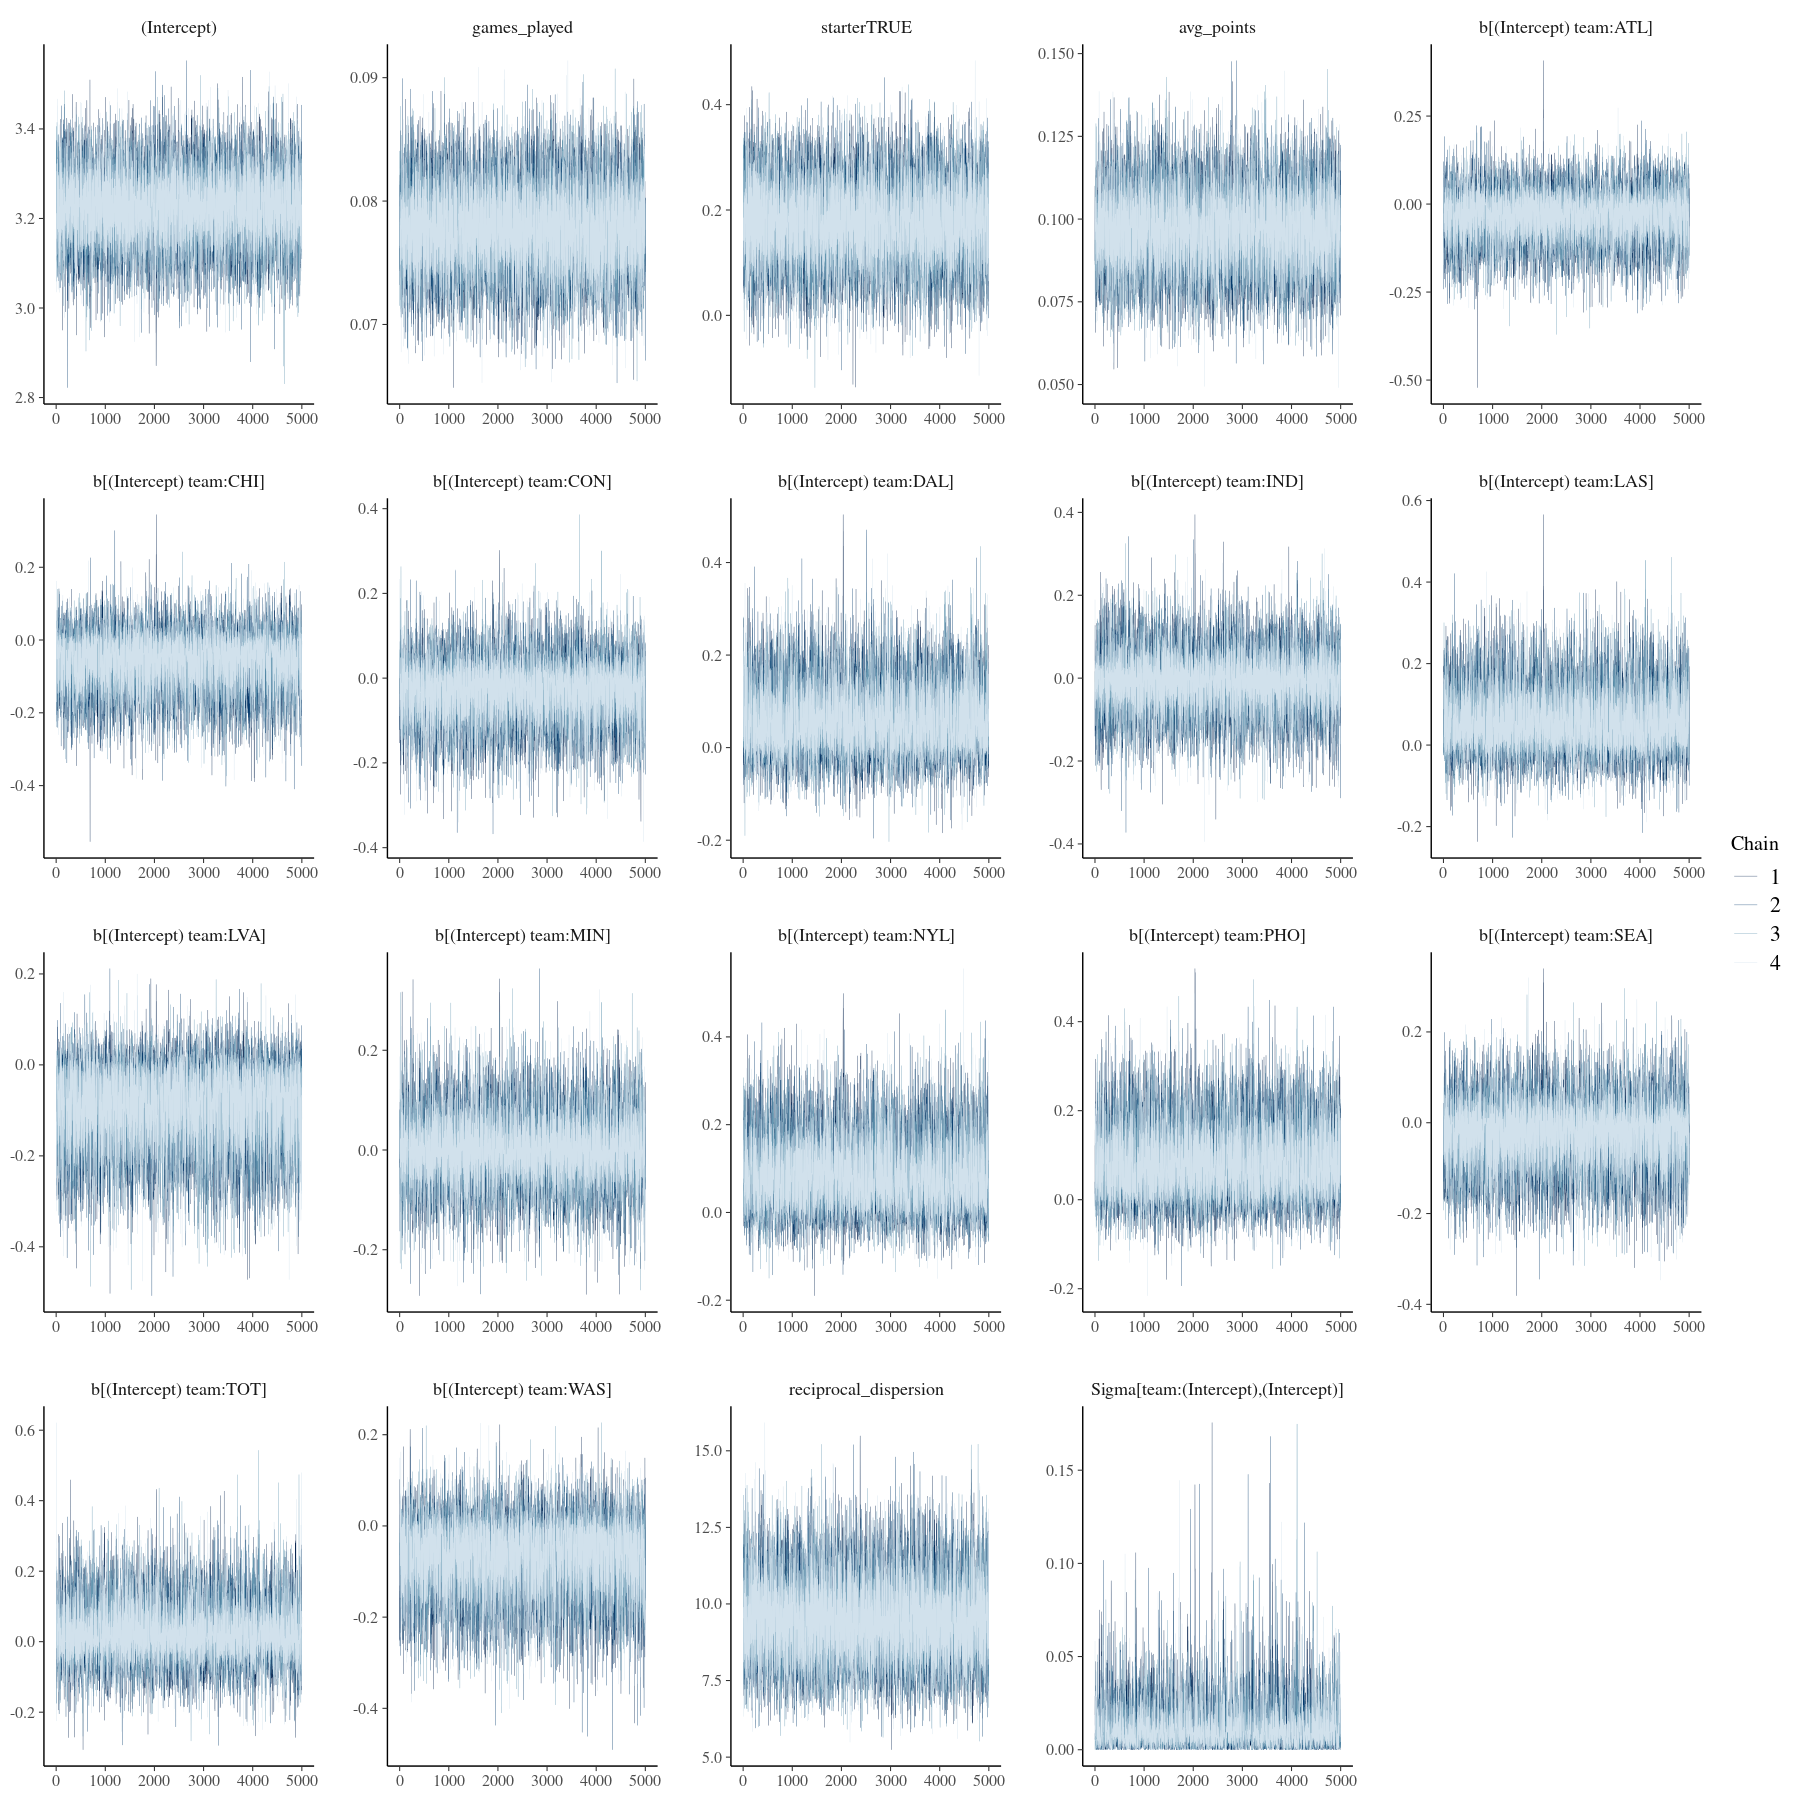

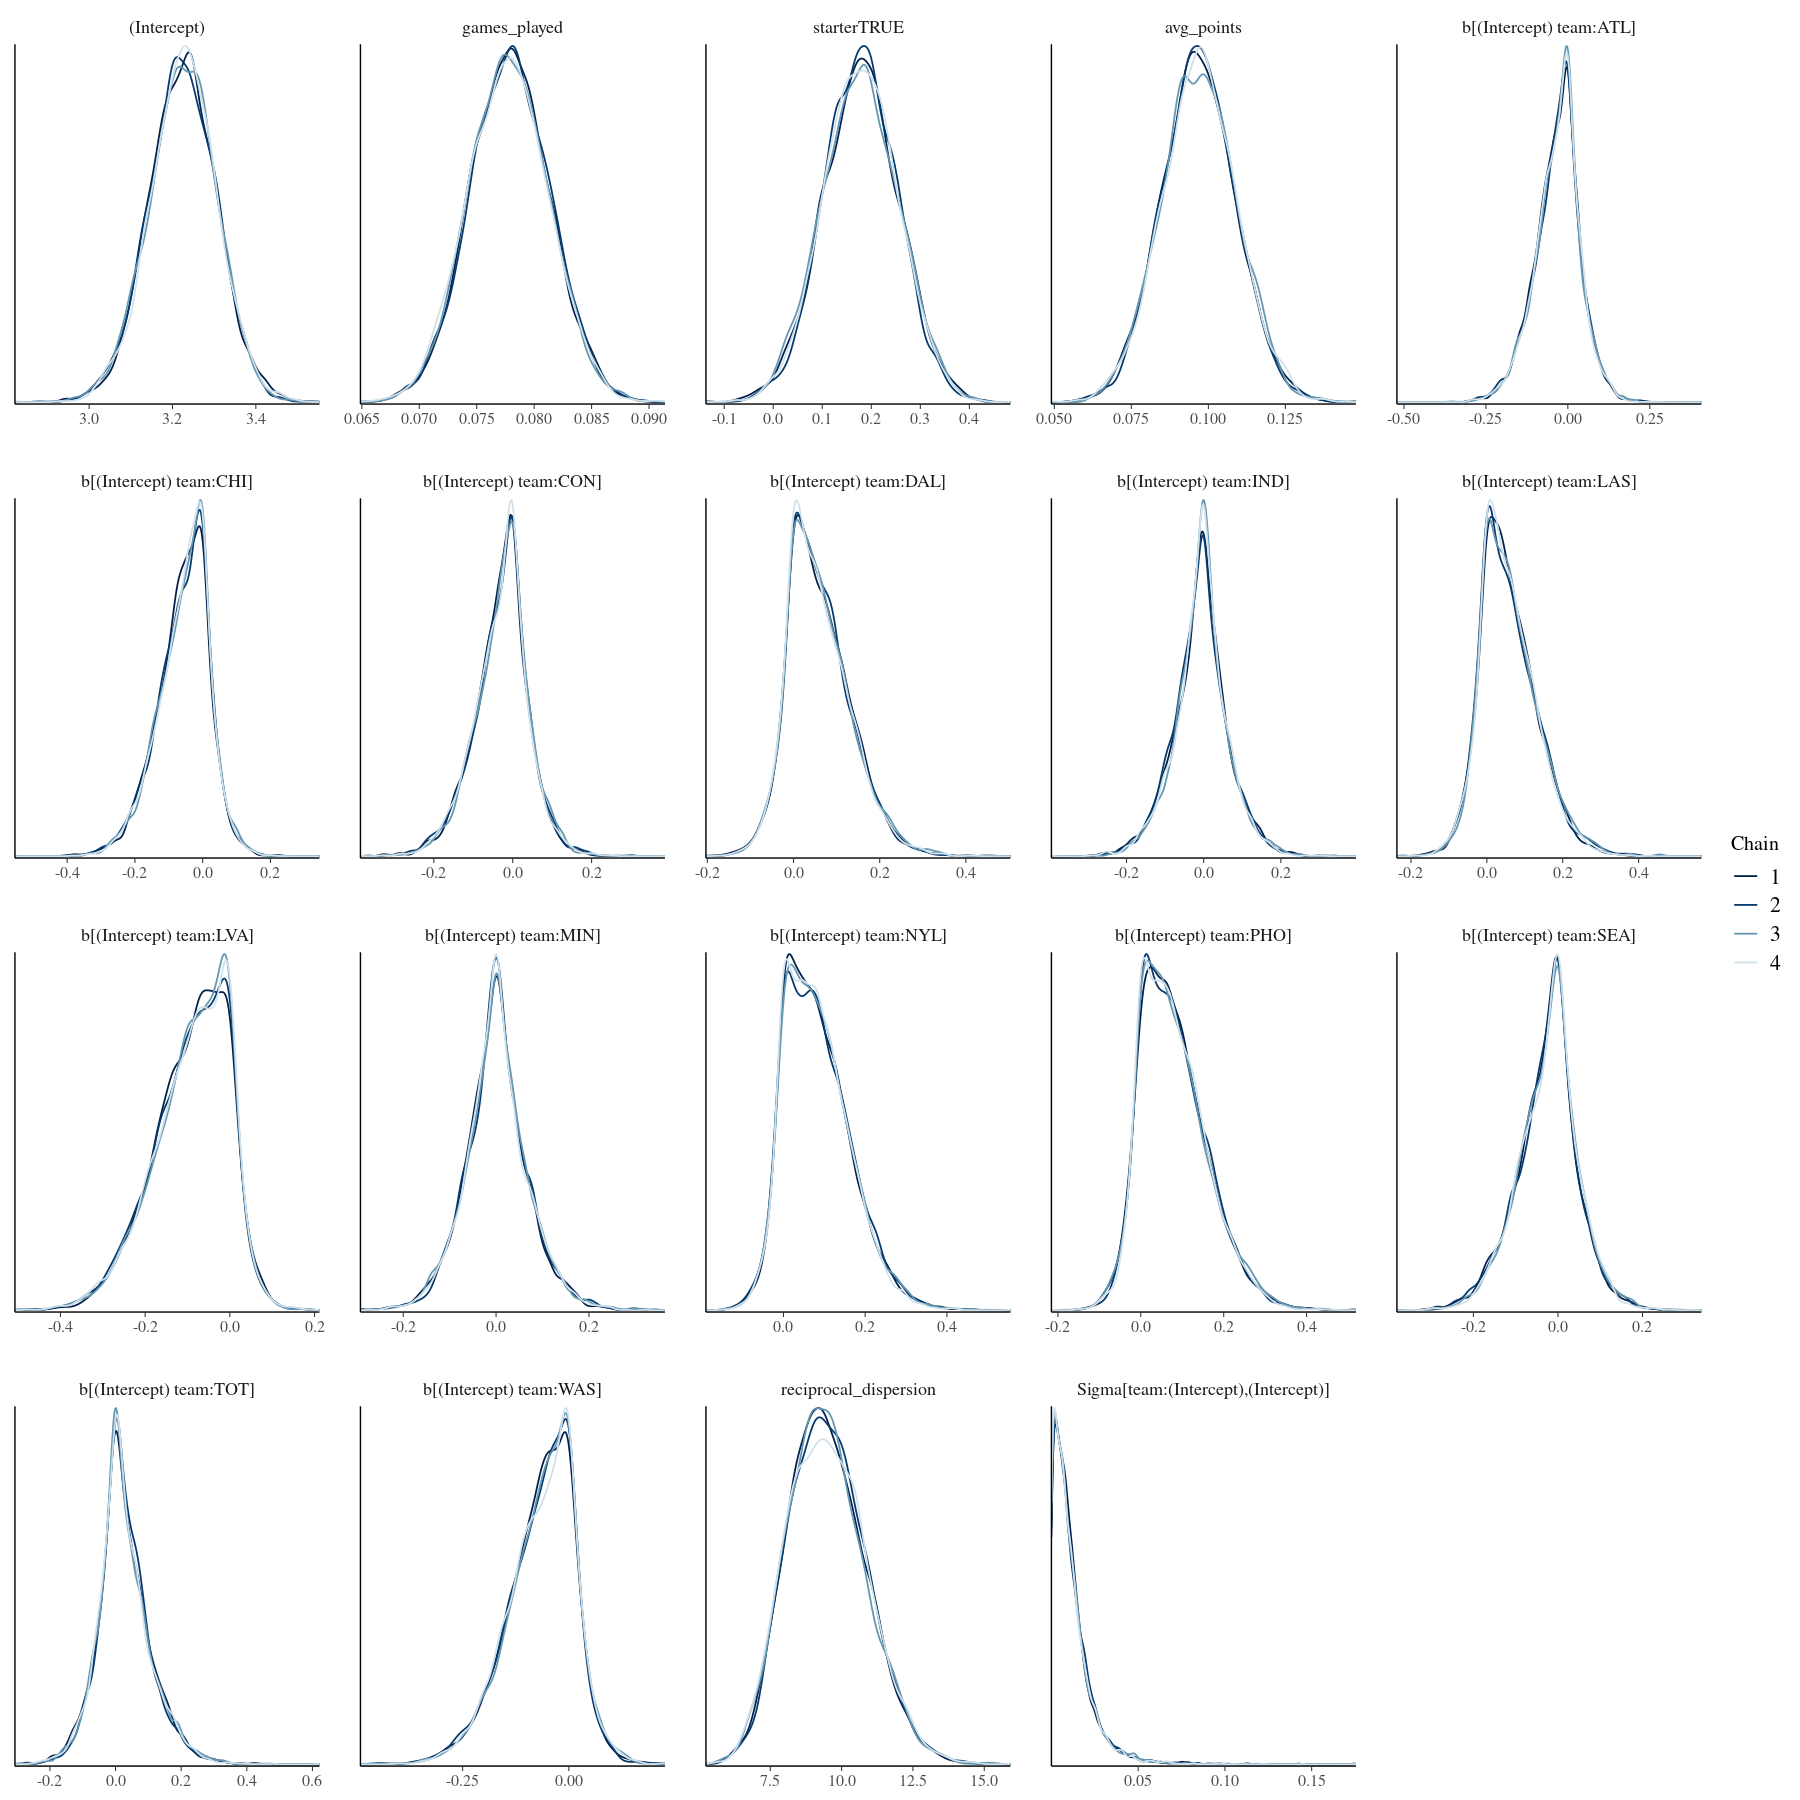

(Intercept)                        games_played 
                            0.85365                             0.93100 
                        starterTRUE                          avg_points 
                            0.89790                             0.80970 
            b[(Intercept) team:ATL]             b[(Intercept) team:CHI] 
                            0.92330                             0.74935 
            b[(Intercept) team:CON]             b[(Intercept) team:DAL] 
                            0.98265                             0.62400 
            b[(Intercept) team:IND]             b[(Intercept) team:LAS] 
                            1.07940                             0.68360 
            b[(Intercept) team:LVA]             b[(Intercept) team:MIN] 
                            0.56360                             0.90710 
            b[(Intercept) team:NYL]             b[(Intercept) team:PHO] 
                            0.54725                             0.54245 
            b[(Intercept) team:SEA]             b[(Intercept) team:TOT] 
                            0.98395                             0.99110 
            b[(Intercept) team:WAS]               reciprocal_dispersion 
                            0.69485                             0.88265 
Sigma[team:(Intercept),(Intercept)] 
                            0.31080

(Intercept)                        games_played 
                          1.0000510                           1.0002378 
                        starterTRUE                          avg_points 
                          0.9999010                           1.0000039 
            b[(Intercept) team:ATL]             b[(Intercept) team:CHI] 
                          0.9999793                           1.0001167 
            b[(Intercept) team:CON]             b[(Intercept) team:DAL] 
                          1.0003142                           1.0000103 
            b[(Intercept) team:IND]             b[(Intercept) team:LAS] 
                          1.0000892                           1.0003078 
            b[(Intercept) team:LVA]             b[(Intercept) team:MIN] 
                          1.0000475                           0.9999795 
            b[(Intercept) team:NYL]             b[(Intercept) team:PHO] 
                          1.0000755                           1.0000262 
            b[(Intercept) team:SEA]             b[(Intercept) team:TOT] 
                          1.0001684                           0.9999491 
            b[(Intercept) team:WAS]               reciprocal_dispersion 
                          1.0000223                           1.0000441 
Sigma[team:(Intercept),(Intercept)] 
                          1.0005661

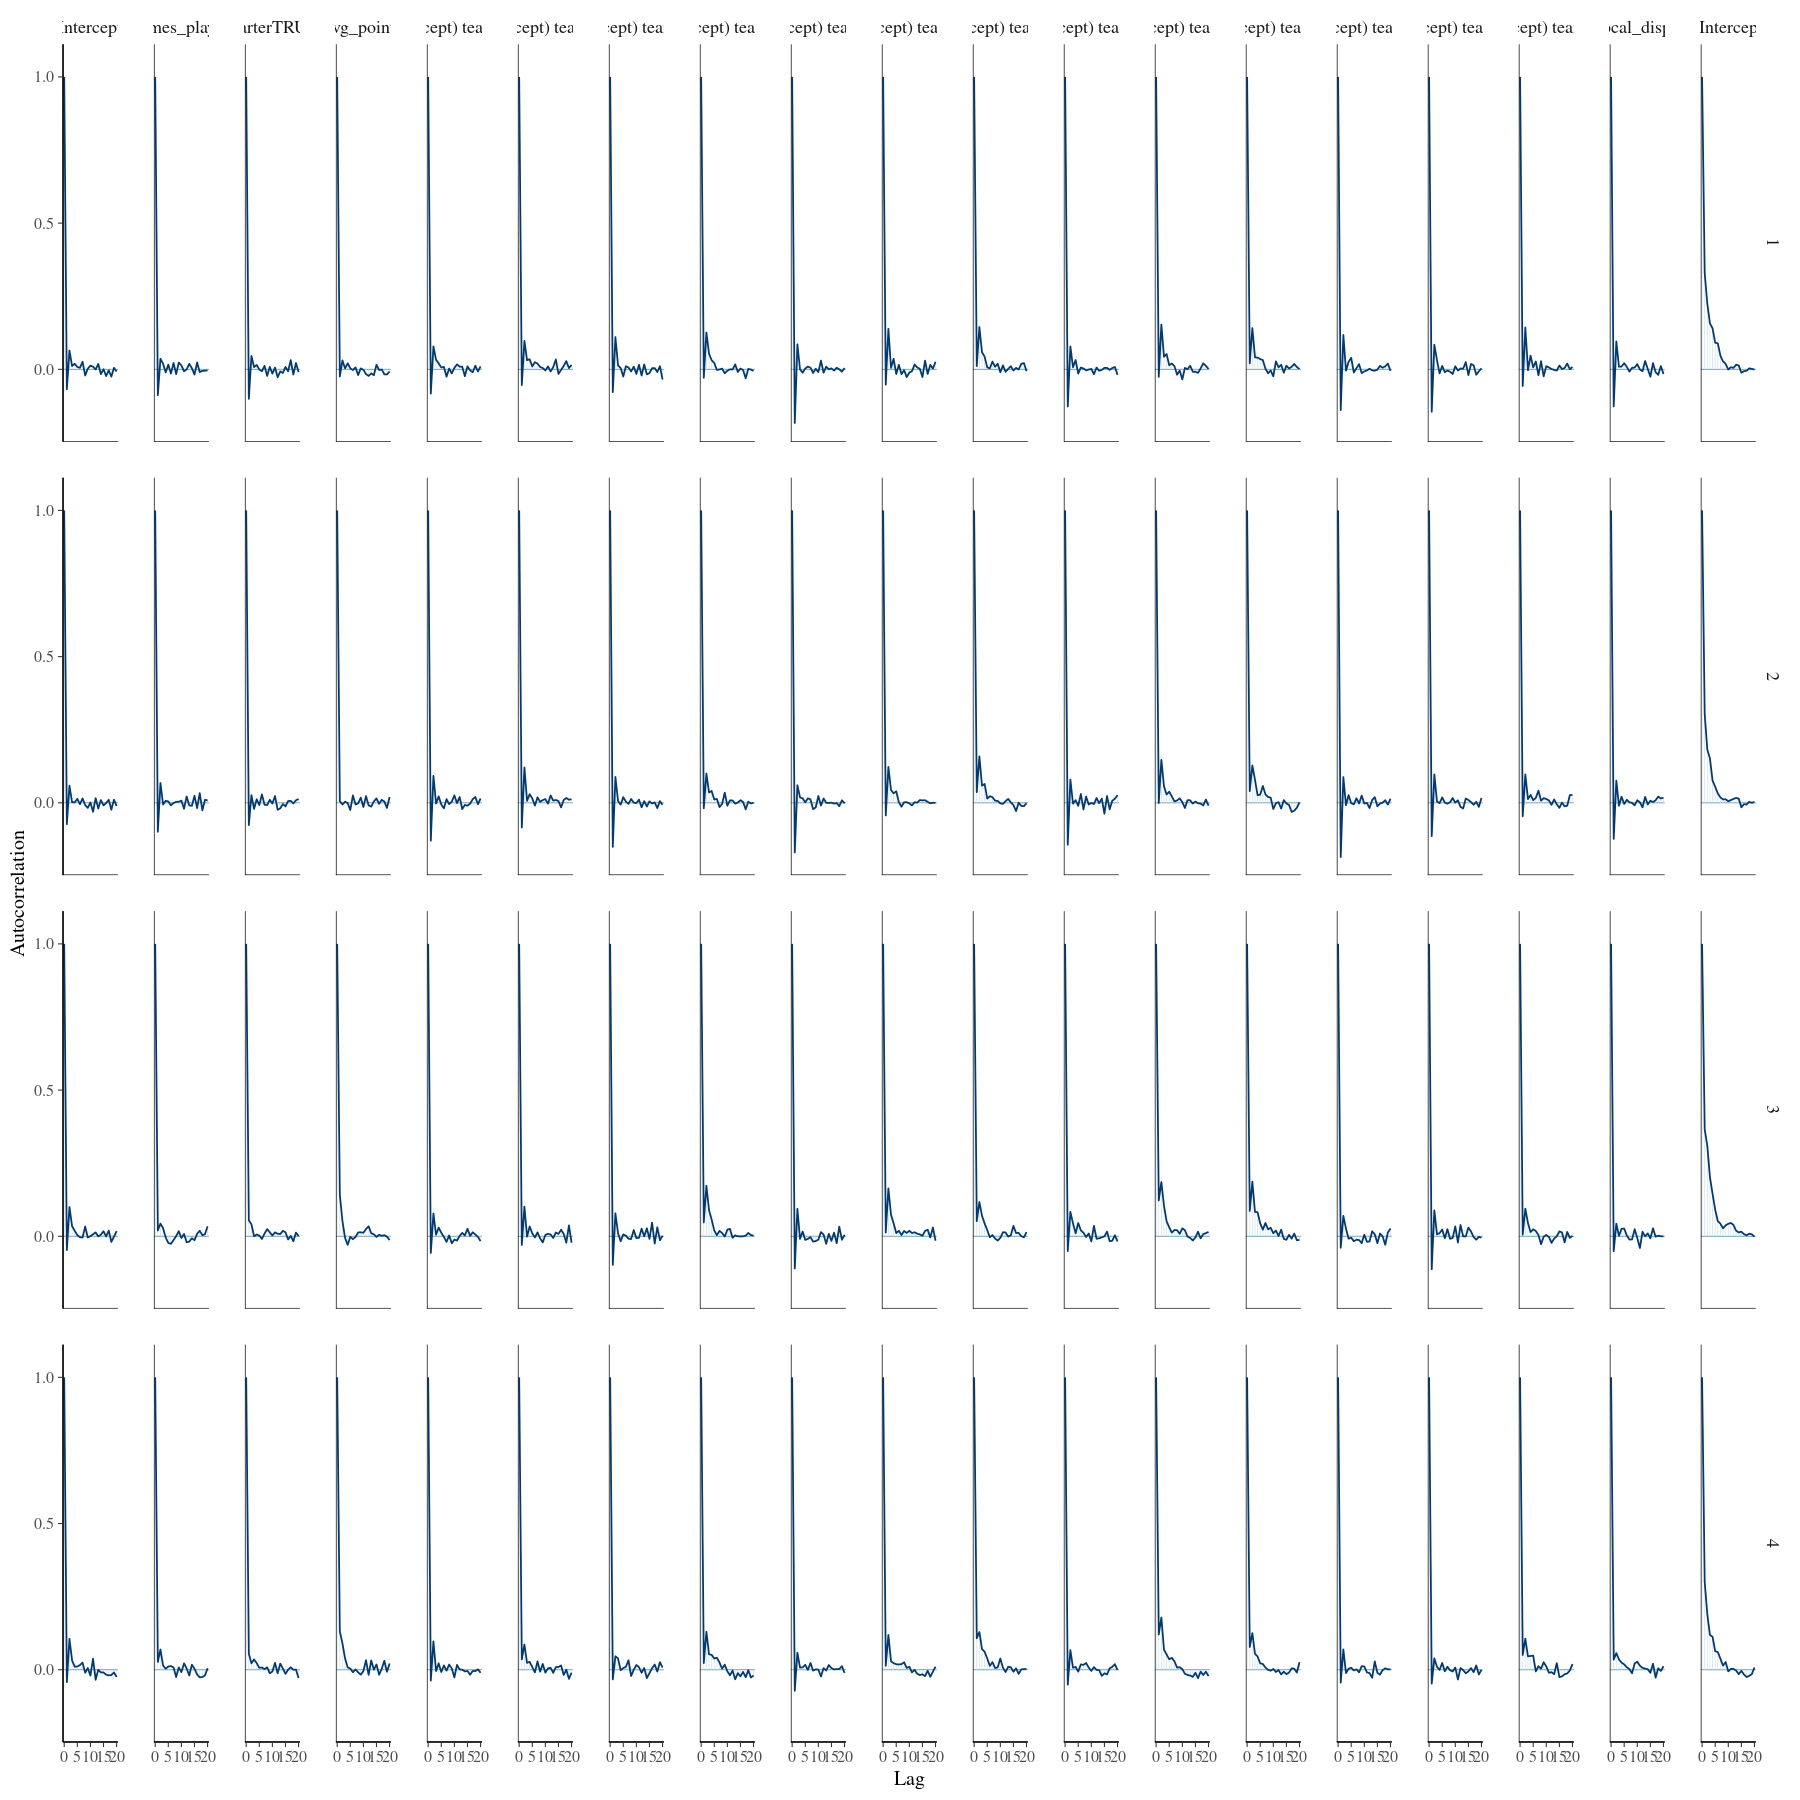

In [48]:
options(repr.plot.width=15, repr.plot.height=15)
mcmc_trace(basketball_model_negbinom, size = 0.1)
mcmc_dens_overlay(basketball_model_negbinom)
mcmc_acf(basketball_model_negbinom)
neff_ratio(basketball_model_negbinom)
rhat(basketball_model_negbinom)

Looks reasonably converged.

Normal model:

In [49]:
set.seed(84735)
basketball_model_normal <- stan_glmer(
  total_minutes ~ games_played + starter + avg_points + (1 | team), 
  data = basketball, family = gaussian,
  prior_intercept = normal(0, 2.5, autoscale = TRUE),
  prior = normal(0, 2.5, autoscale = TRUE), 
  prior_covariance = decov(reg = 1, conc = 1, shape = 1, scale = 1),
  chains = 4, iter = 5000*2, seed = 84735
)

Diagnostics:

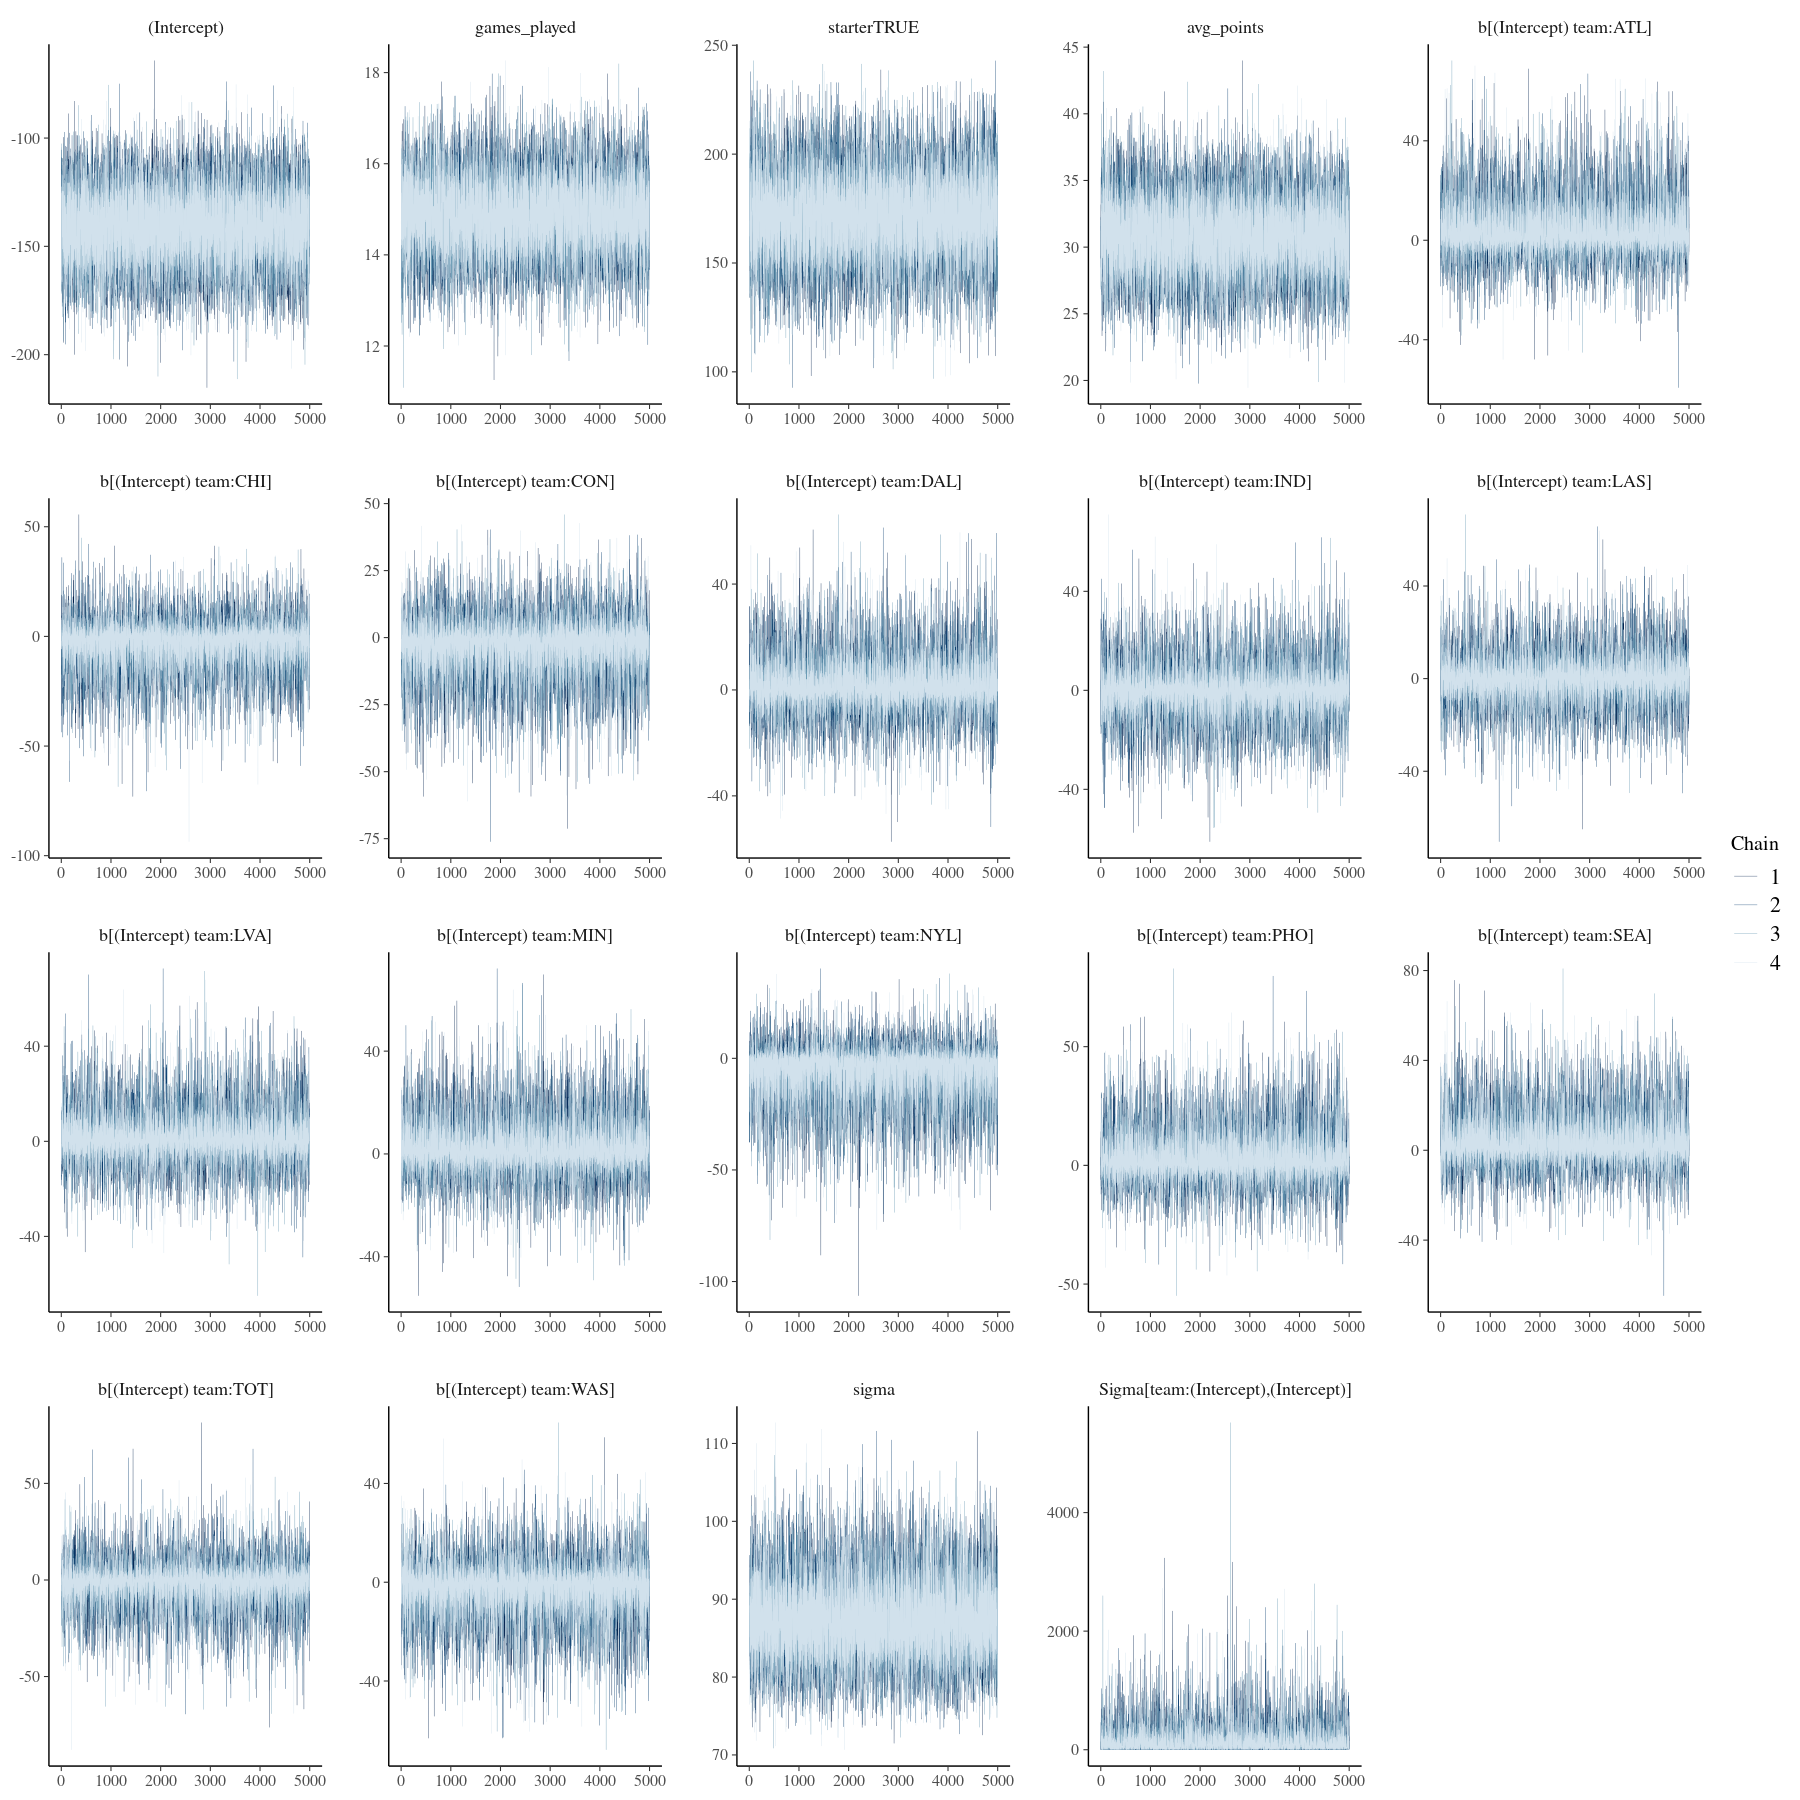

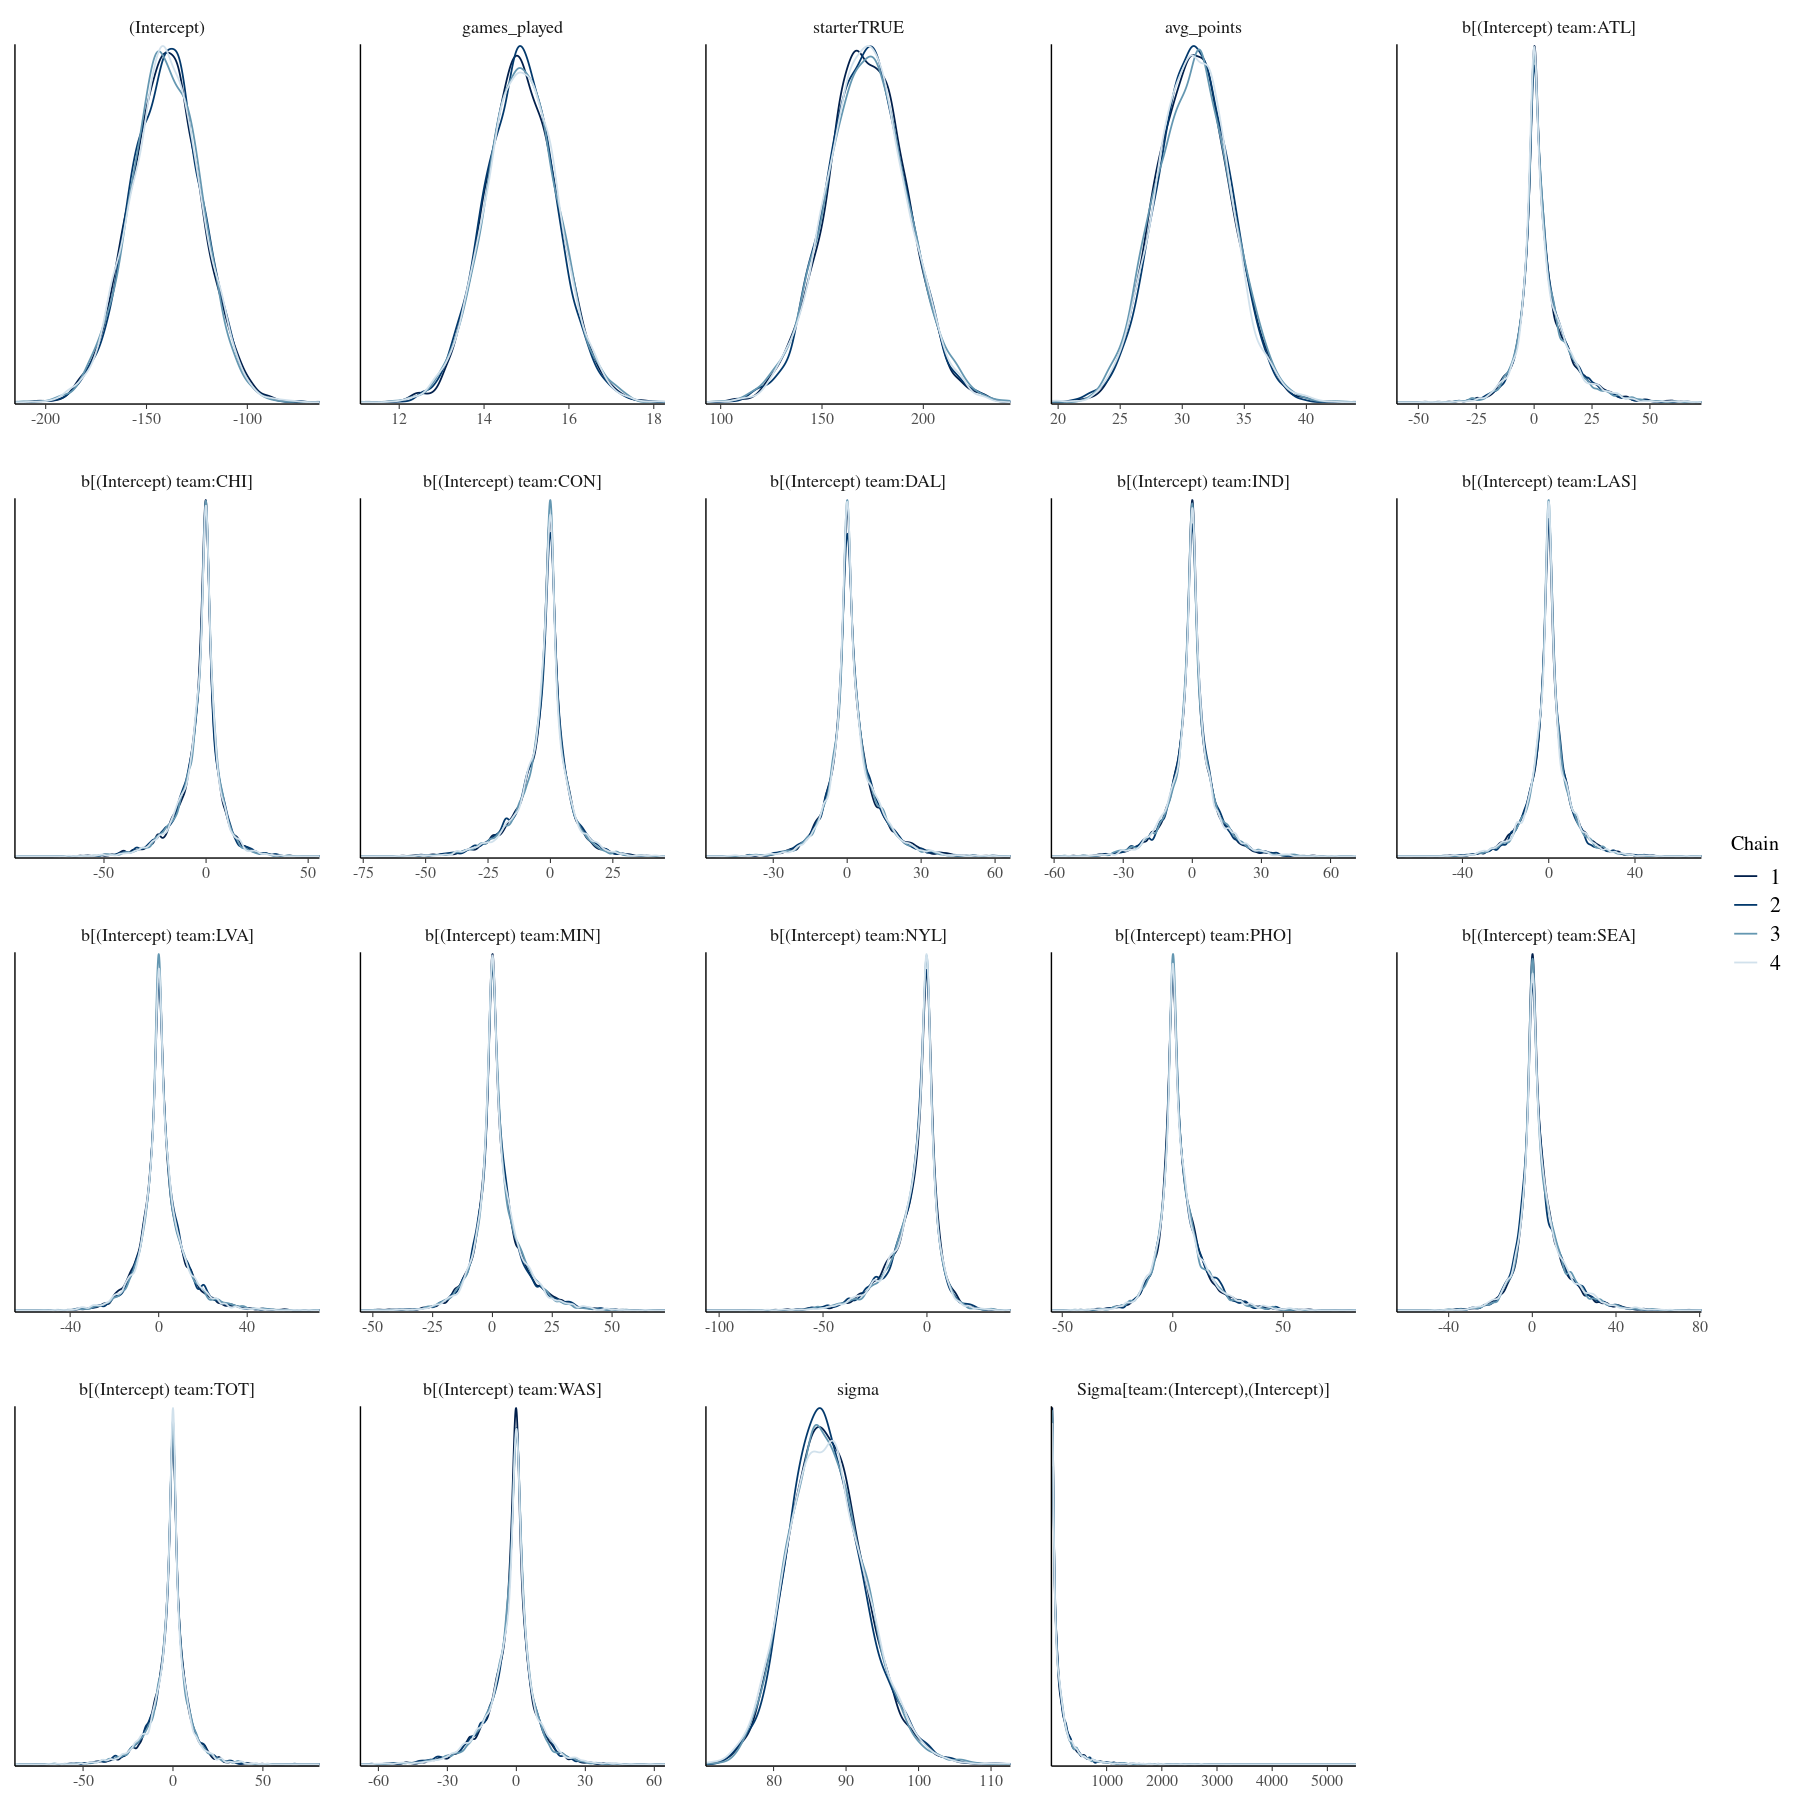

(Intercept)                        games_played 
                            1.23240                             0.99920 
                        starterTRUE                          avg_points 
                            1.04790                             0.78180 
            b[(Intercept) team:ATL]             b[(Intercept) team:CHI] 
                            1.04040                             1.07525 
            b[(Intercept) team:CON]             b[(Intercept) team:DAL] 
                            1.18210                             1.13380 
            b[(Intercept) team:IND]             b[(Intercept) team:LAS] 
                            1.16675                             1.27080 
            b[(Intercept) team:LVA]             b[(Intercept) team:MIN] 
                            1.13580                             1.17770 
            b[(Intercept) team:NYL]             b[(Intercept) team:PHO] 
                            0.93700                             1.07530 
            b[(Intercept) team:SEA]             b[(Intercept) team:TOT] 
                            1.00990                             1.16990 
            b[(Intercept) team:WAS]                               sigma 
                            1.07060                             1.43010 
Sigma[team:(Intercept),(Intercept)] 
                            0.67865

(Intercept)                        games_played 
                          1.0000037                           1.0002172 
                        starterTRUE                          avg_points 
                          0.9998979                           1.0000629 
            b[(Intercept) team:ATL]             b[(Intercept) team:CHI] 
                          0.9998499                           0.9998890 
            b[(Intercept) team:CON]             b[(Intercept) team:DAL] 
                          0.9998652                           0.9998584 
            b[(Intercept) team:IND]             b[(Intercept) team:LAS] 
                          0.9999053                           0.9998496 
            b[(Intercept) team:LVA]             b[(Intercept) team:MIN] 
                          1.0001216                           0.9999481 
            b[(Intercept) team:NYL]             b[(Intercept) team:PHO] 
                          0.9998701                           0.9999839 
            b[(Intercept) team:SEA]             b[(Intercept) team:TOT] 
                          1.0001029                           0.9999777 
            b[(Intercept) team:WAS]                               sigma 
                          0.9999577                           0.9998625 
Sigma[team:(Intercept),(Intercept)] 
                          0.9999194

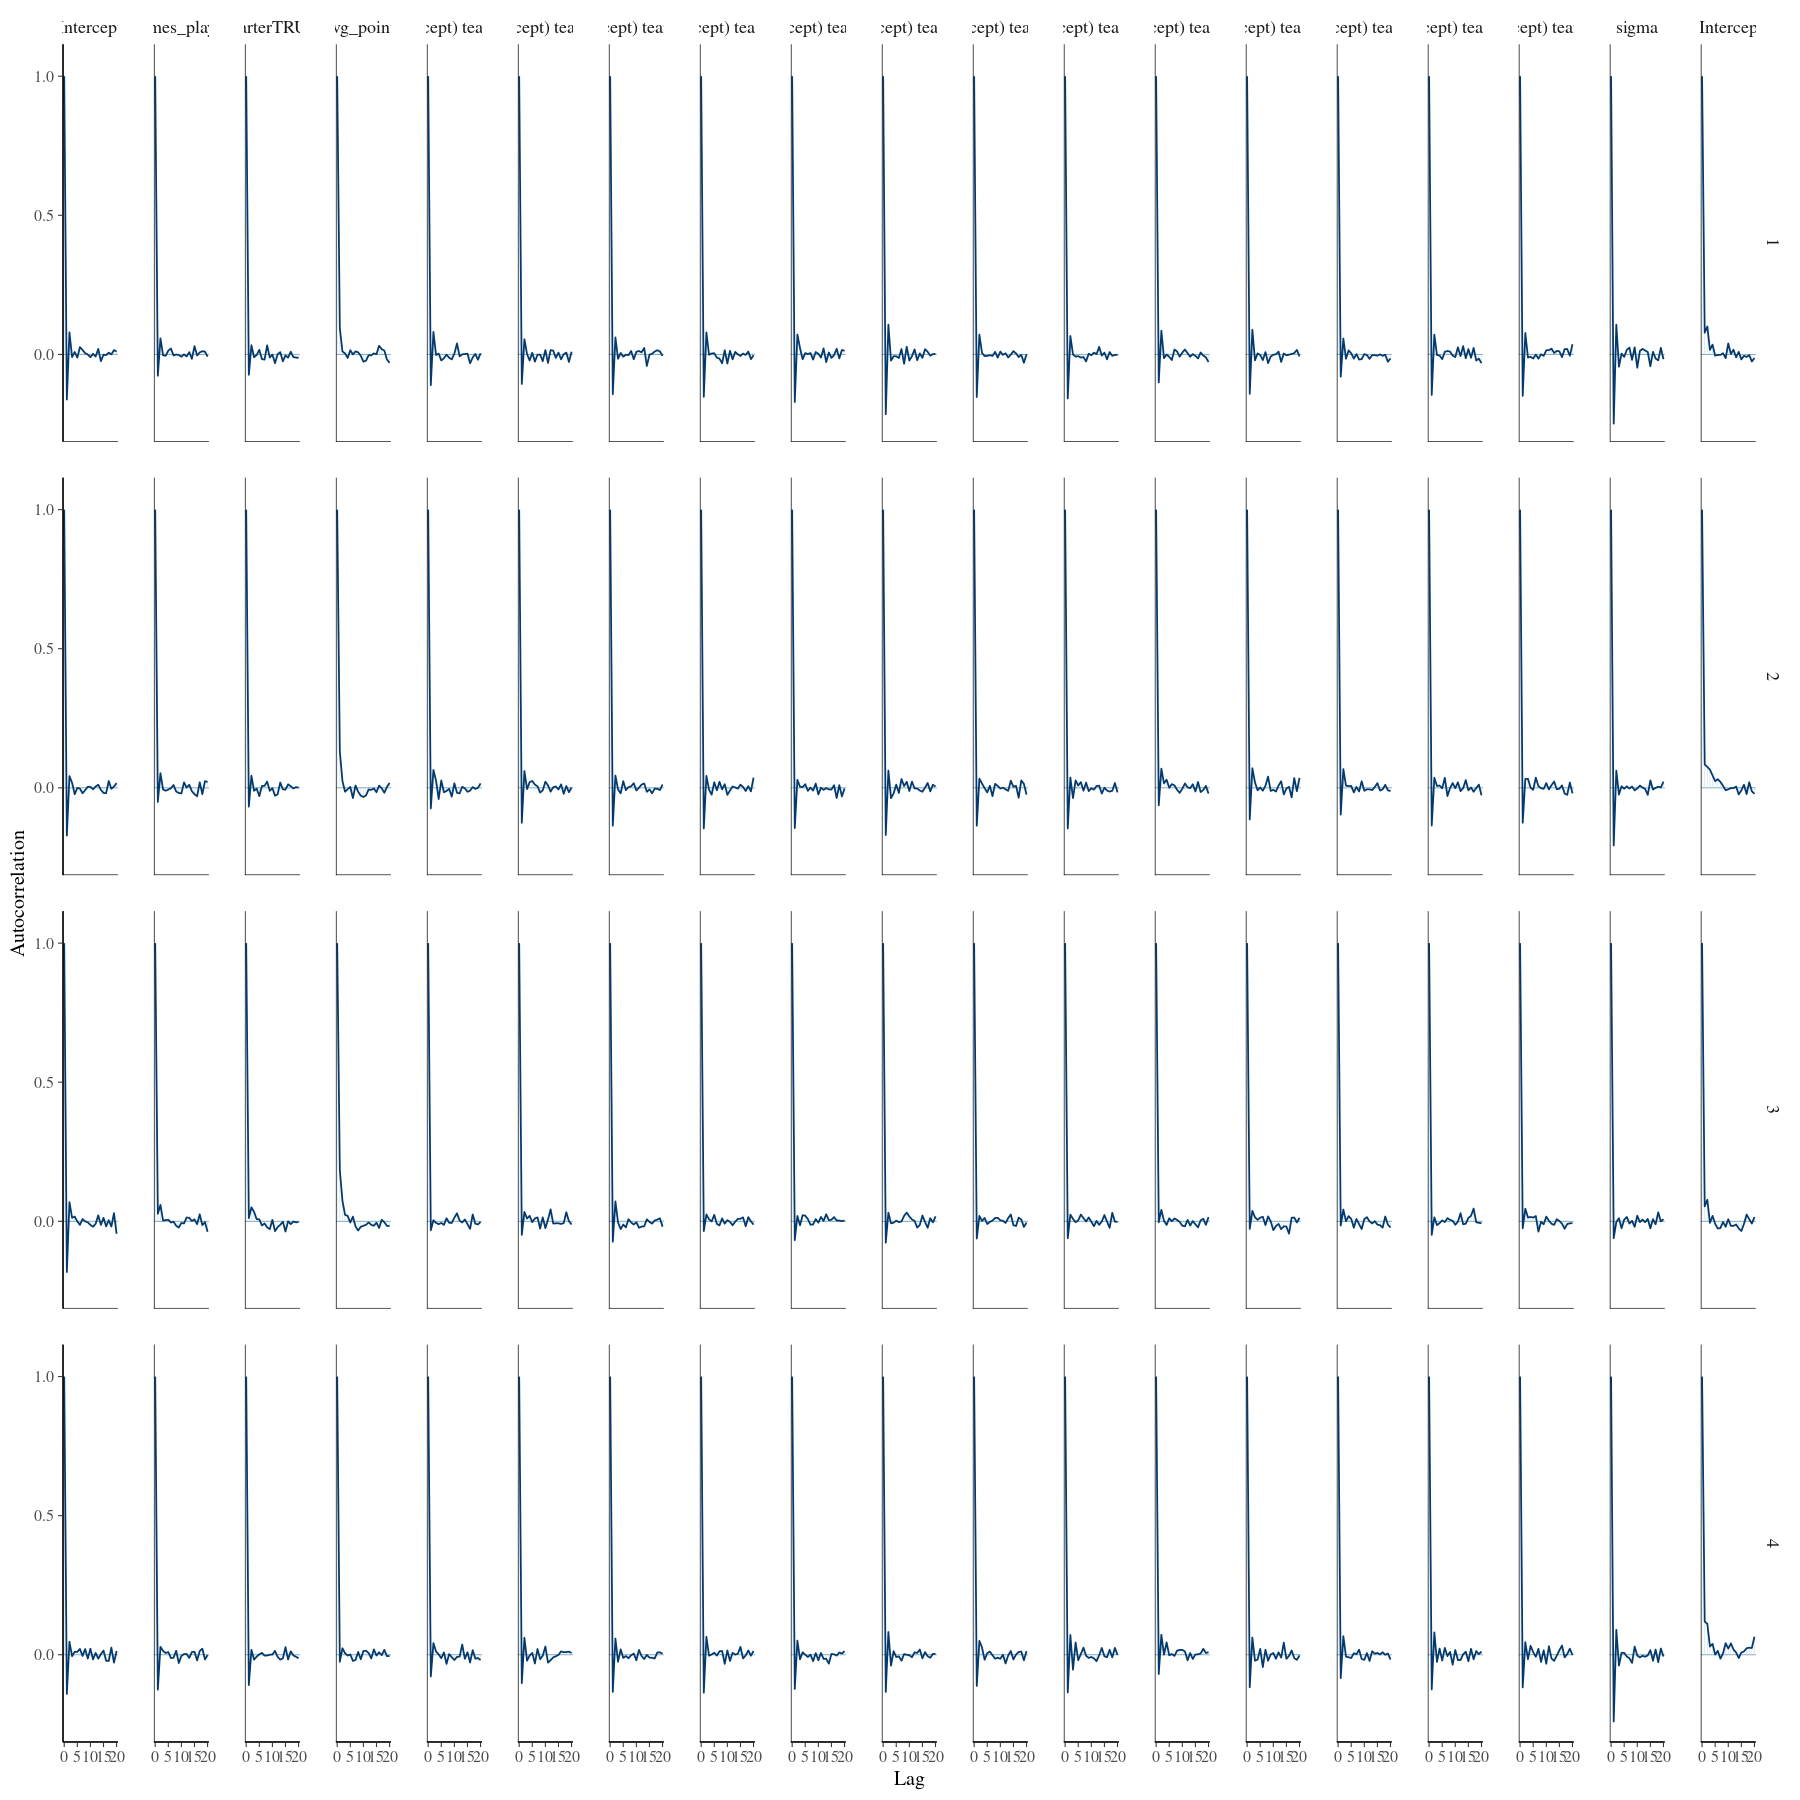

In [50]:
options(repr.plot.width=15, repr.plot.height=15)
mcmc_trace(basketball_model_normal, size = 0.1)
mcmc_dens_overlay(basketball_model_normal)
mcmc_acf(basketball_model_normal)
neff_ratio(basketball_model_normal)
rhat(basketball_model_normal)

Looks reasonably converged.

### Posterior predictive checks

Warning message:
“Removed 138 rows containing non-finite values (`stat_density()`).”


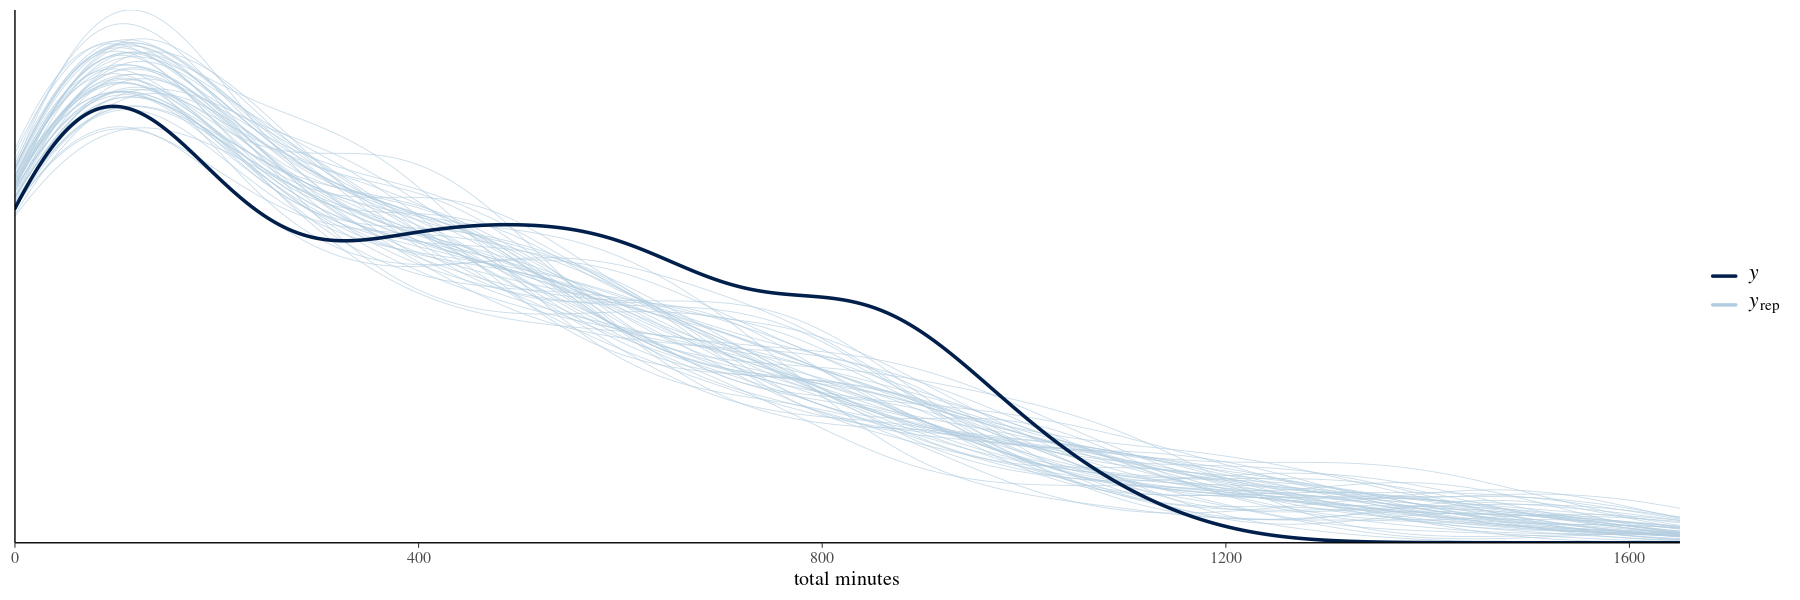

In [51]:
options(repr.plot.width=15, repr.plot.height=5)
pp_check(basketball_model_negbinom) + xlab("total minutes") + xlim(0, 1650)

The negative binomial model is more uncertain than the Poisson model and better captures the data.

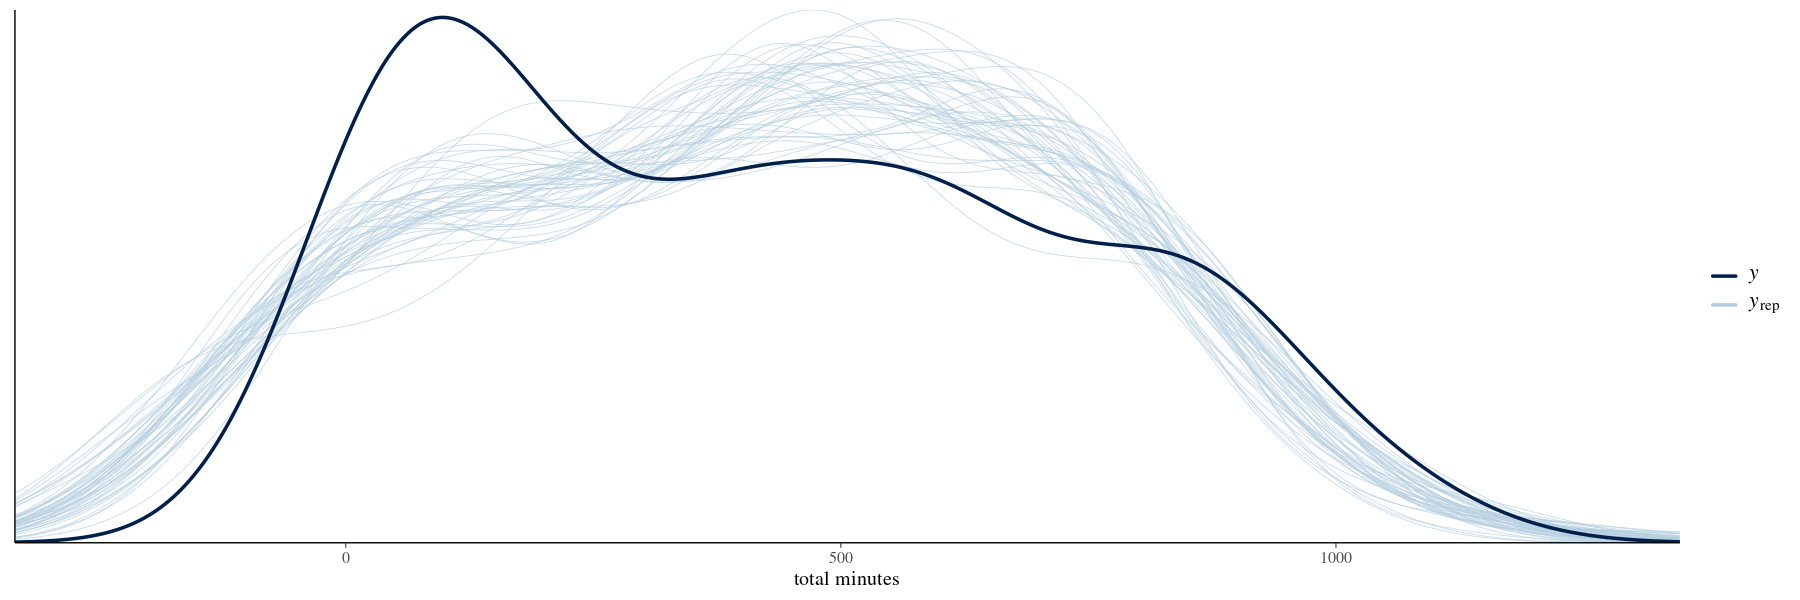

In [52]:
pp_check(basketball_model_normal) + xlab("total minutes")

The normal model predicts a substantial amount of negative total minutes. For this reason I would not choose it to model this data, even if it performed the best.

### Model evaluation

In [53]:
set.seed(84735)
prediction_summary(model = basketball_model_poisson, data = basketball)

mae      mae_scaled within_50 within_95
1 38.57865 2.548435   0.1575342 0.3767123

In [54]:
set.seed(84735)
prediction_summary(model = basketball_model_negbinom, data = basketball)

mae      mae_scaled within_50 within_95
1 37.07328 0.4544823  0.6917808 0.9520548

In [55]:
set.seed(84735)
prediction_summary(model = basketball_model_normal, data = basketball)

mae     mae_scaled within_50 within_95
1 62.4532 0.7035239  0.4726027 0.9726027

The Poisson model has a similar median absolute error as the negative binomial model, shows however a significantly larger scaled median absolute error and captures only 16% of all datapoints within its 50% credible intervals and only 38% within its 95% credible interval. This model should rather not be used, as it substantially underestimates uncertainty. The negative binomial model performs much better here with more reasonable results for `mae_scaled`, `within_50` and `within_95`. Interestingly, the normal performs significantly worse in terms of median absolute error, however it performs better than the Poisson model in the other measures.

Differences in terms of ELPD:

In [56]:
set.seed(84735)
elpd1 <- loo(basketball_model_poisson, k_threshold=0.7)
elpd2 <- loo(basketball_model_negbinom, k_threshold=0.7)
elpd3 <- loo(basketball_model_normal, k_threshold=0.7)
loo_compare(elpd1, elpd2, elpd3)

18 problematic observation(s) found.
Model will be refit 18 times.


Fitting model 1 out of 18 (leaving out observation 13)


Fitting model 2 out of 18 (leaving out observation 16)


Fitting model 3 out of 18 (leaving out observation 31)


Fitting model 4 out of 18 (leaving out observation 39)


Fitting model 5 out of 18 (leaving out observation 43)


Fitting model 6 out of 18 (leaving out observation 63)


Fitting model 7 out of 18 (leaving out observation 68)


Fitting model 8 out of 18 (leaving out observation 70)


Fitting model 9 out of 18 (leaving out observation 73)


Fitting model 10 out of 18 (leaving out observation 81)


Fitting model 11 out of 18 (leaving out observation 83)


Fitting model 12 out of 18 (leaving out observation 84)


Fitting model 13 out of 18 (leaving out observation 85)


Fitting model 14 out of 18 (leaving out observation 90)


Fitting model 15 out of 18 (leaving out observation 92)


Fitting model 16 out of 18 (leaving out observation 105)


Fitting mod

elpd_diff     se_diff   elpd_loo   se_elpd_loo
basketball_model_normal       0.0000000   0.00000  -863.3841   8.310301 
basketball_model_negbinom    -0.5856422  17.37618  -863.9698  16.436069 
basketball_model_poisson  -1051.8485090 245.43060 -1915.2326 245.739646 
                          p_loo      se_p_loo    looic    se_looic 
basketball_model_normal     7.005304   0.9653374 1726.768  16.62060
basketball_model_negbinom  10.603503   2.2909870 1727.940  32.87214
basketball_model_poisson  351.972863 144.0119836 3830.465 491.47929

Interestingly, the normal model performs a tiny, non-significant margin better than the negative binomial model in terms of ELPD. The Poisson model is much worse, probably because it is too certain. It would be interesting to run some deeper investigations here. Let us choose the negative binomial model for further examinations.

## Exercise 18.8

### a)

As discussed above, choose the negative binomial model.

Global model:

In [57]:
tidy(basketball_model_negbinom, effects = "fixed", conf.int = TRUE, conf.level = 0.80)

term         estimate   std.error   conf.low   conf.high
1 (Intercept)  3.22590511 0.080575735 3.12014170 3.3272140
2 games_played 0.07784400 0.003517451 0.07338436 0.0822994
3 starterTRUE  0.17852032 0.077207482 0.08037786 0.2773162
4 avg_points   0.09689437 0.011999255 0.08144796 0.1126978

All fixed effects appear to be significant at the 80% level.

$$Y_i \sim Pois(\lambda_i), \quad\text{with } \lambda_i = \exp\left(3.22 + 0.078 X_1 + 0.18 X_2 + 0.097 X_3\right),$$

where $X_1$ denotes the number of games played, $X_2$ is an indicator for whether the team member was used as a starter and $X_3$ denotes the average number of points the player scored.

In [58]:
c(exp(3.12), exp(3.32), exp(0.073), exp(0.082), exp(0.080), exp(0.277), exp(0.081), exp(0.113))

[1] 22.646380 27.660351  1.075731  1.085456  1.083287  1.319166  1.084371
[8]  1.119632

The baseline is 23-28 minutes played in the season. This baseline is increased by 8% per game the player has played in the season, by 8-32% if the player was used as a starter and by 8-12% with each point the player has scored.

Intercepts:

In [59]:
tidy(basketball_model_negbinom, effects = "ran_vals", conf.int = TRUE, conf.level = 0.80) %>% 
    arrange( desc(estimate) ) %>% 
    mutate( baseline_difference=exp(estimate) )

level group term        estimate      std.error  conf.low     conf.high  
1  NYL   team  (Intercept)  0.0726261578 0.08199996 -0.007239109 0.190994750
2  PHO   team  (Intercept)  0.0685500499 0.07984687 -0.008274054 0.187975585
3  DAL   team  (Intercept)  0.0497479001 0.07031646 -0.019710644 0.157827379
4  LAS   team  (Intercept)  0.0478304912 0.07044620 -0.023998892 0.158986958
5  TOT   team  (Intercept)  0.0169588446 0.06664789 -0.064692201 0.131703285
6  MIN   team  (Intercept)  0.0003715544 0.05849000 -0.081561008 0.086171826
7  IND   team  (Intercept) -0.0049049449 0.05842614 -0.096176292 0.077544670
8  SEA   team  (Intercept) -0.0171817606 0.06232905 -0.118300787 0.060309130
9  CON   team  (Intercept) -0.0213308828 0.05982796 -0.118854380 0.051066556
10 ATL   team  (Intercept) -0.0243505583 0.06104048 -0.121613248 0.049141909
11 CHI   team  (Intercept) -0.0459061390 0.07046683 -0.158924103 0.028434013
12 WAS   team  (Intercept) -0.0534048697 0.07664904 -0.171591811 0.022742621
13 LVA   team  (Intercept) -0.0766880362 0.09071436 -0.211633056 0.008359801
   baseline_difference
1  1.0753285          
2  1.0709542          
3  1.0510061          
4  1.0489928          
5  1.0171035          
6  1.0003716          
7  0.9951071          
8  0.9829650          
9  0.9788950          
10 0.9759435          
11 0.9551316          
12 0.9479961          
13 0.9261787

The NYL players have the largest total playing time on average, 7.5% better than global average, and the LVA players have the shortest totatal playing time on average, 7% worse than global average.

## Open-ended Exercises 18.9 / 18.10

.. are left up to you, the concepts should be clear now.